# House Price Prediction using Linear, Ridge and Lasso Regression
The solution is divided in to the following sections:
- Data understanding and exploration
- Data cleaning
- Data preperation
- Model building and evaluation

## 1.Data Understanding and Exploration
This is about understanding the size, attribute names etc.

In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score

import os

import warnings
warnings.filterwarnings('ignore')

In [189]:
# resdding the dataset
df = pd.read_csv("train.csv")

In [190]:
# Summary : 1460 rows, 81 columns, null values also exist
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [191]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


### Identifying Continuous and Categorical Columns

In [192]:
# Threshold to determine if a numeric column is categorical based on unique values
unique_threshold = 0.05 * len(df)  # 5% of the number of rows

# Initialize lists for continuous and categorical columns
continuous_columns = []
categorical_columns = []

for column in df.columns:
    if df[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        # Check the number of unique values
        num_unique_values = df[column].nunique()
        if num_unique_values <= unique_threshold:
            categorical_columns.append(column)
        else:
            continuous_columns.append(column)

print("Continuous columns:", continuous_columns)
print("Categorical columns:", categorical_columns)

Continuous columns: ['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Categorical columns: ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'Garag

In [193]:
# Divide the categorical_columns into numerical categorical and non-numerical categorical
numerical_categorical = [col for col in categorical_columns if pd.api.types.is_numeric_dtype(df[col])]
non_numerical_categorical = [col for col in categorical_columns if pd.api.types.is_object_dtype(df[col])]

print("Numerical Categorical Variables:", numerical_categorical)
print("Non-Numerical Categorical Variables:", non_numerical_categorical)

Numerical Categorical Variables: ['MSSubClass', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']
Non-Numerical Categorical Variables: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


#### Barplot/count plot for all Categorical Variables visualization
- Its observed that many categorical columns having high dominant values. Means, one specific category value is having more than 80% in that column. These categorical column cant be significant in the model.They can be dropped as part of data clening process.
- Following are the categorical columns having dominant value more than 80% .Total around 27 categorical variables.
'Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch', 'PoolArea', 'MiscFeature', 'MiscVal', 'SaleType', 'SaleCondition

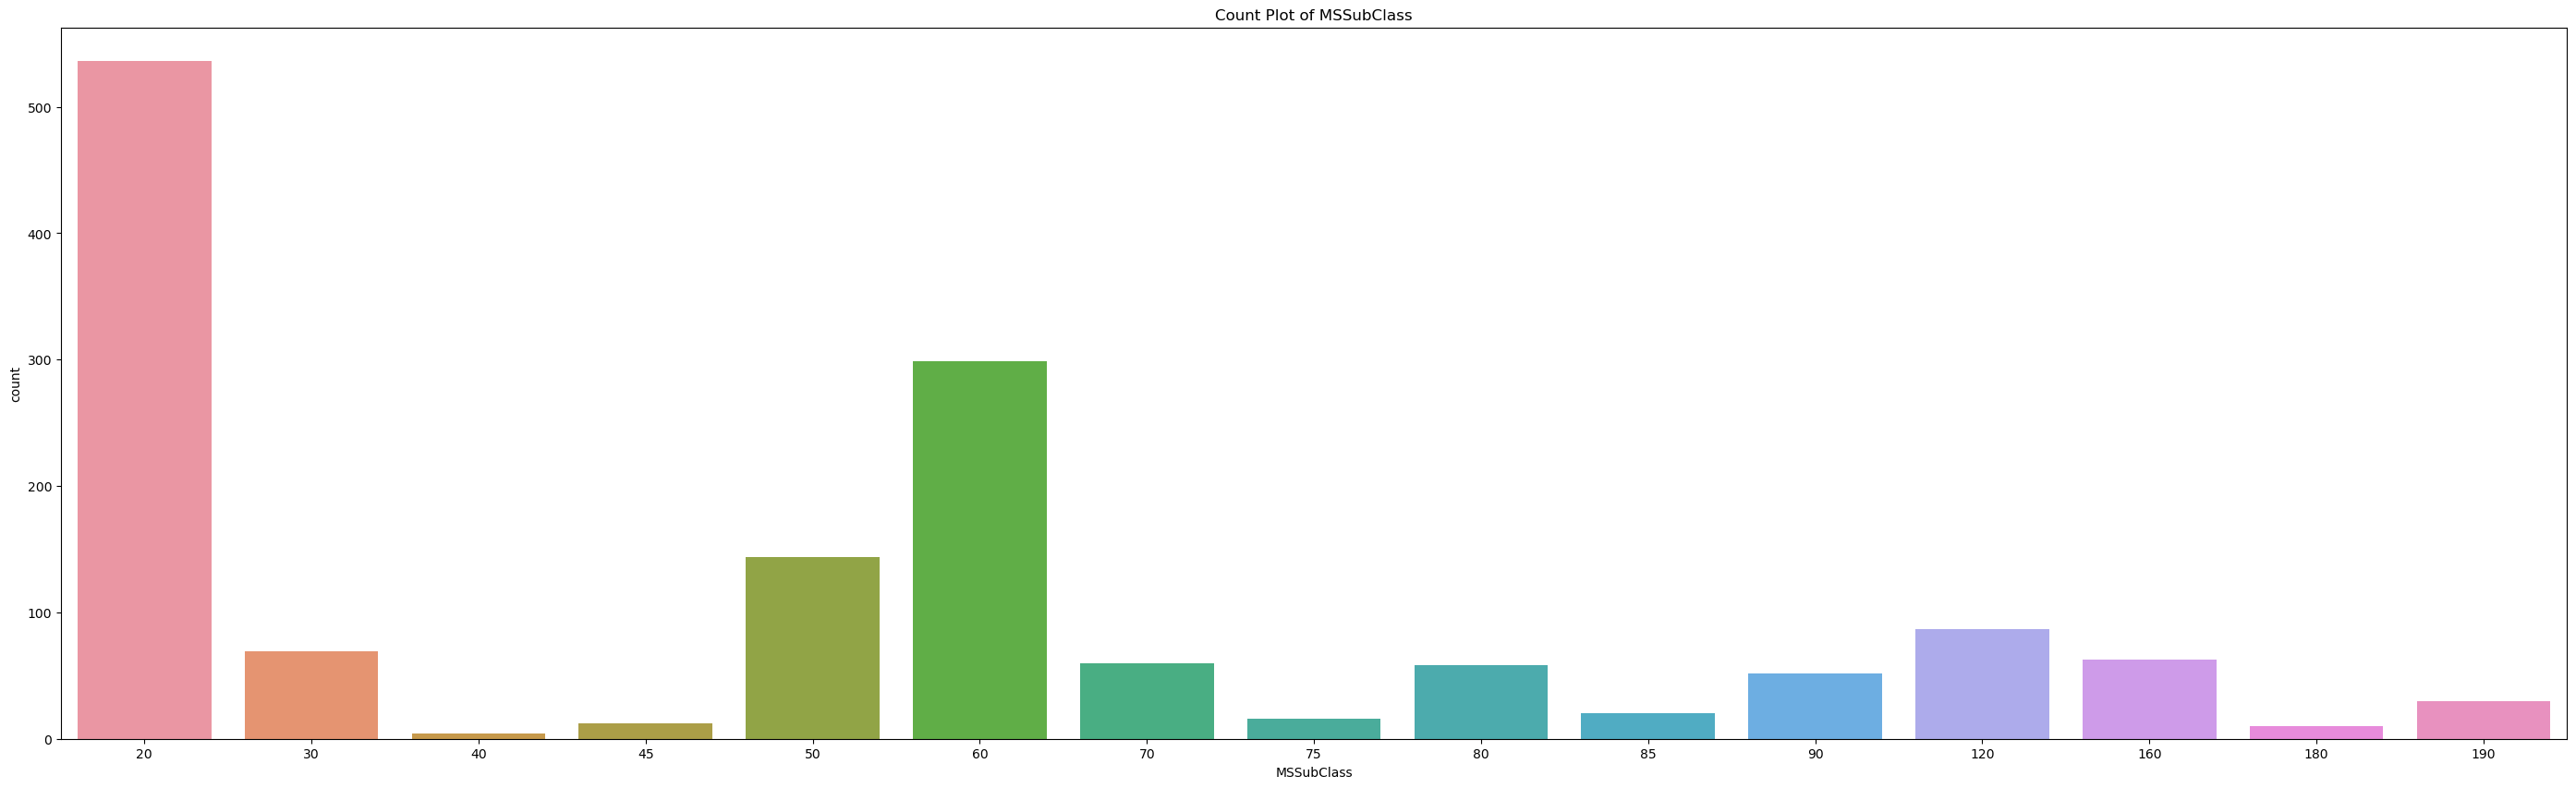

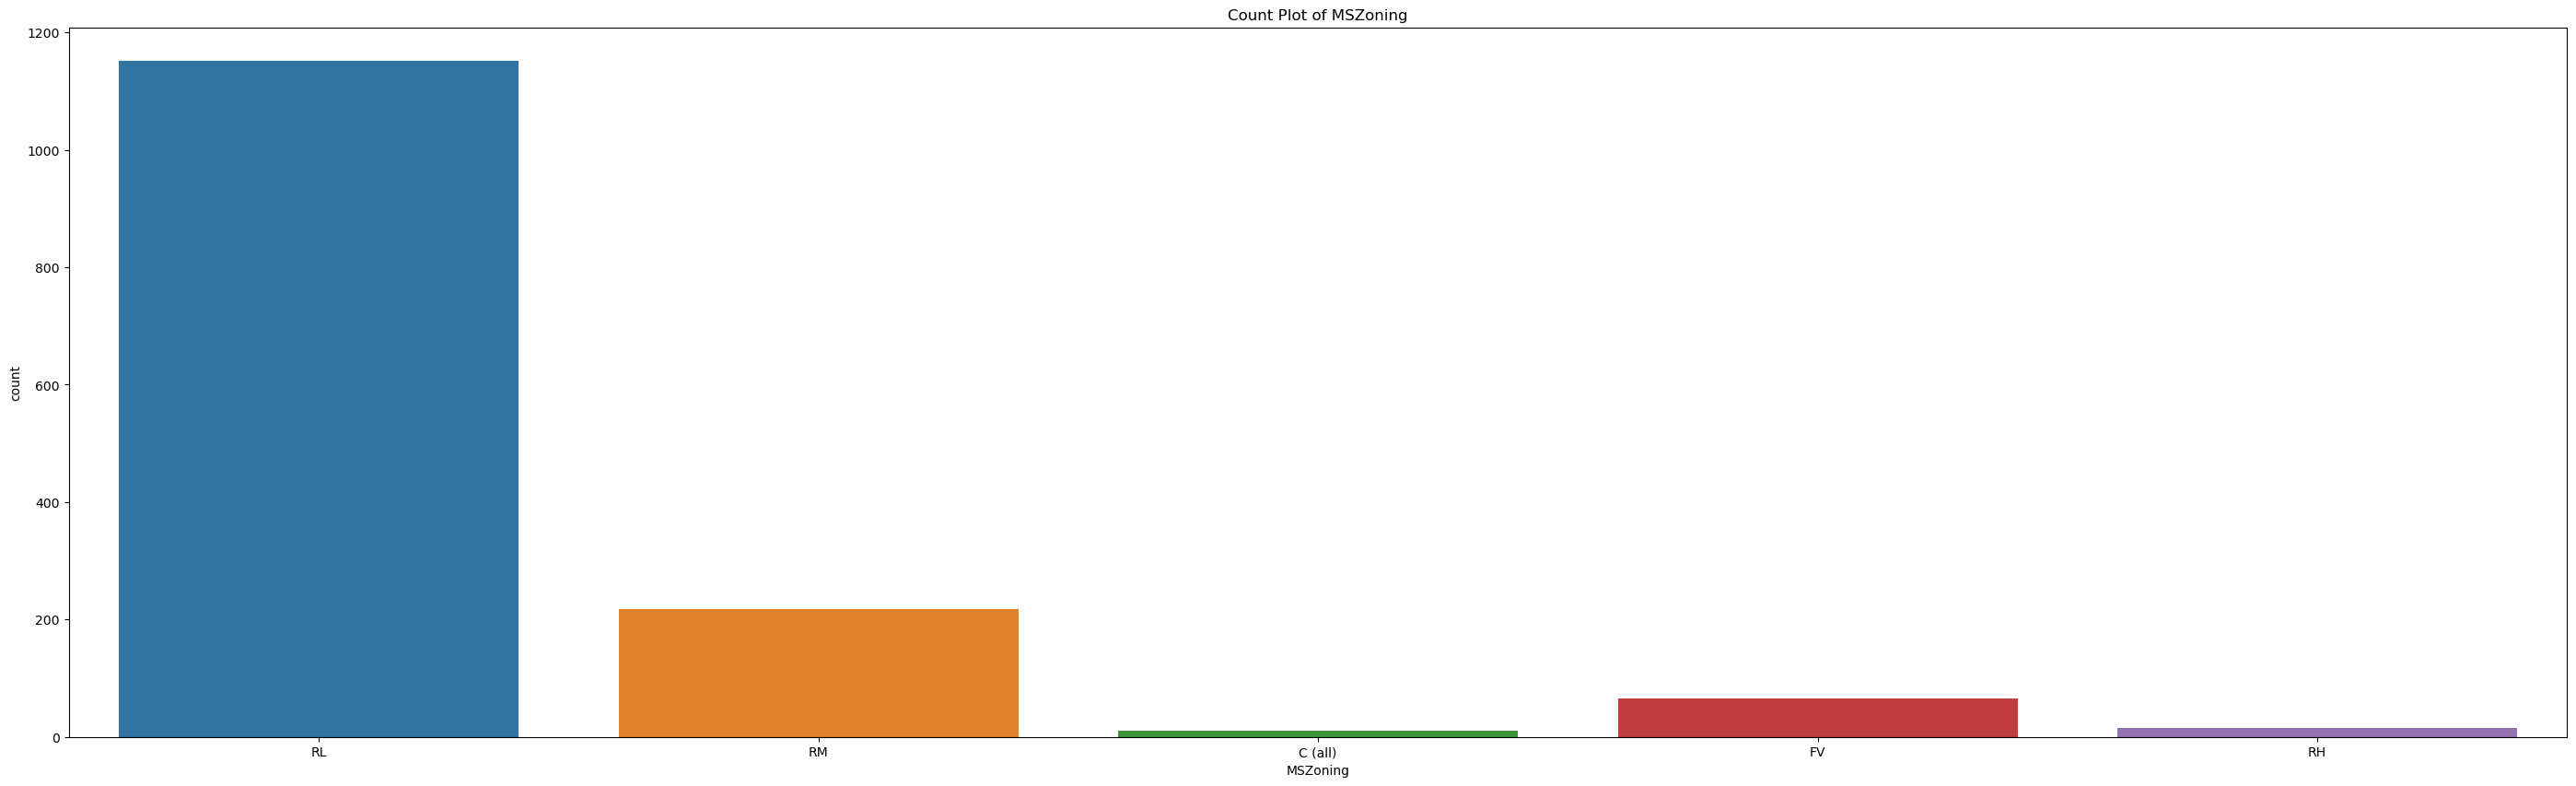

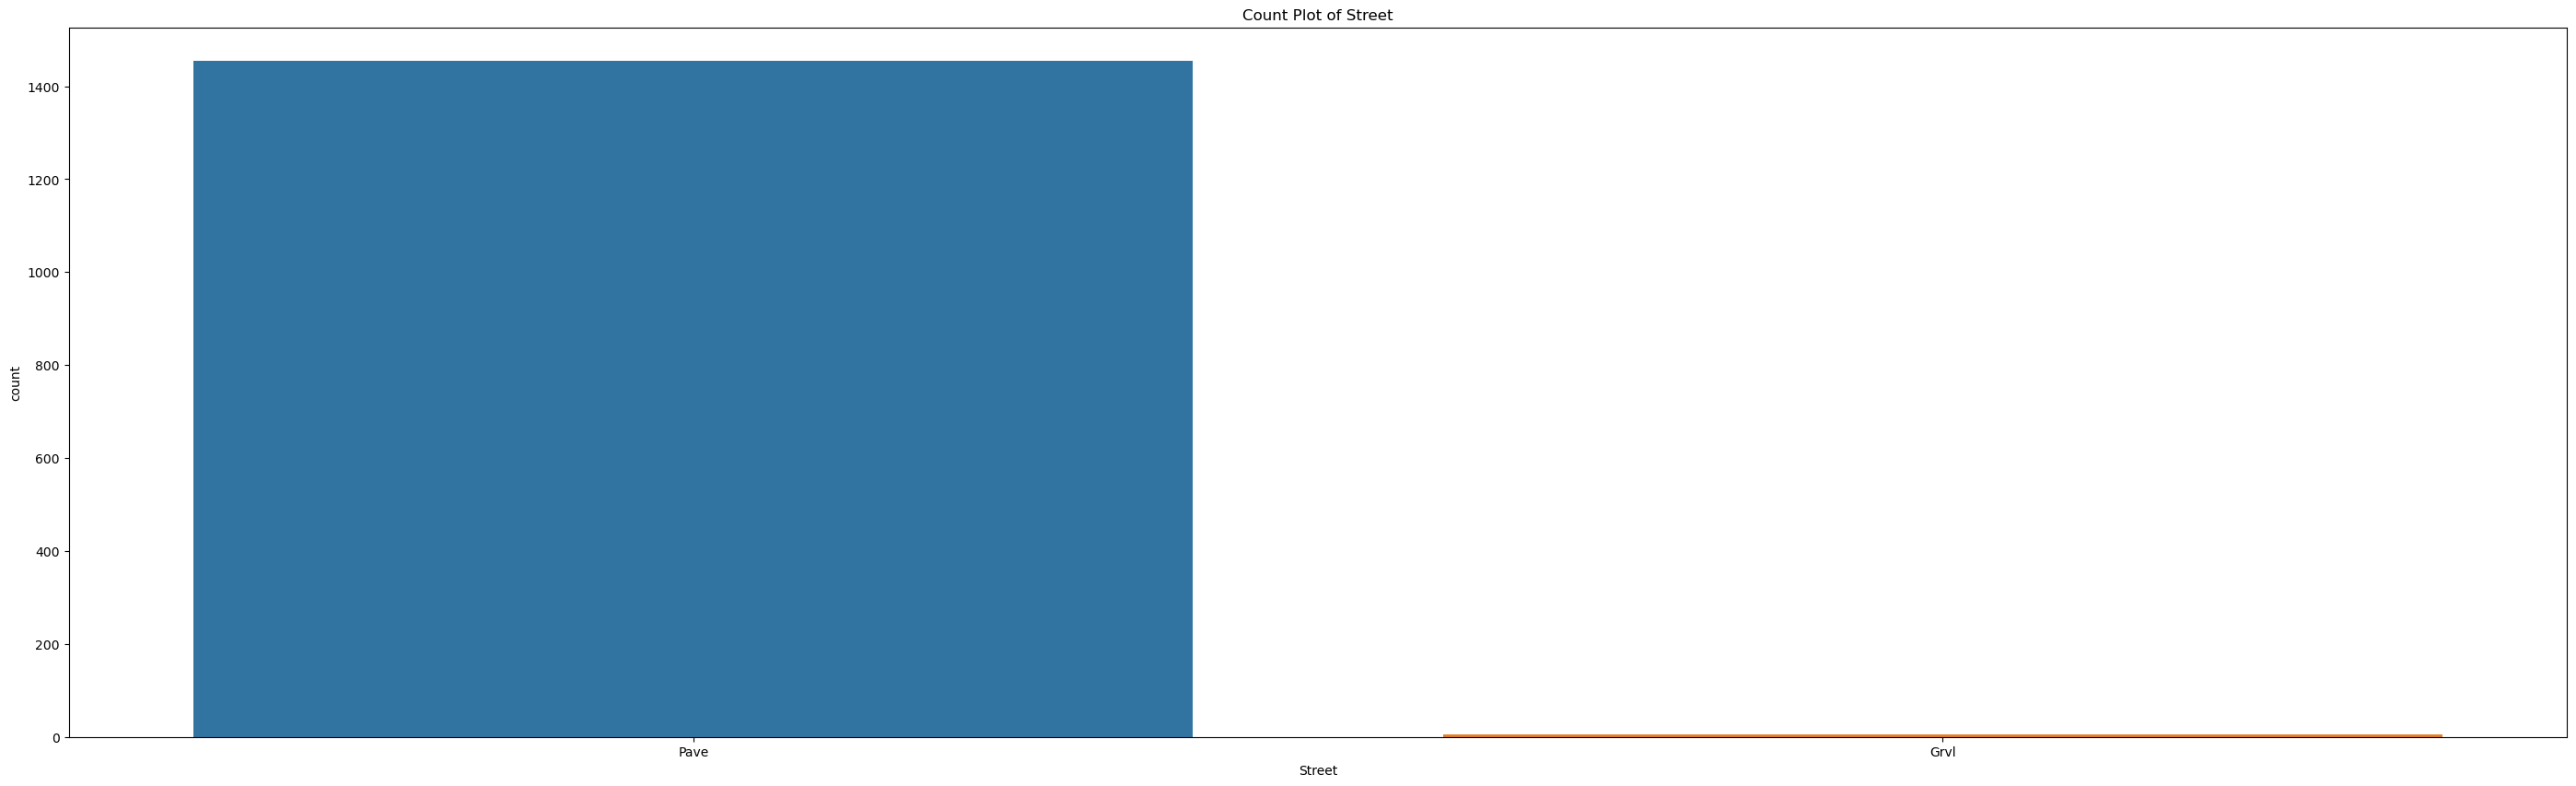

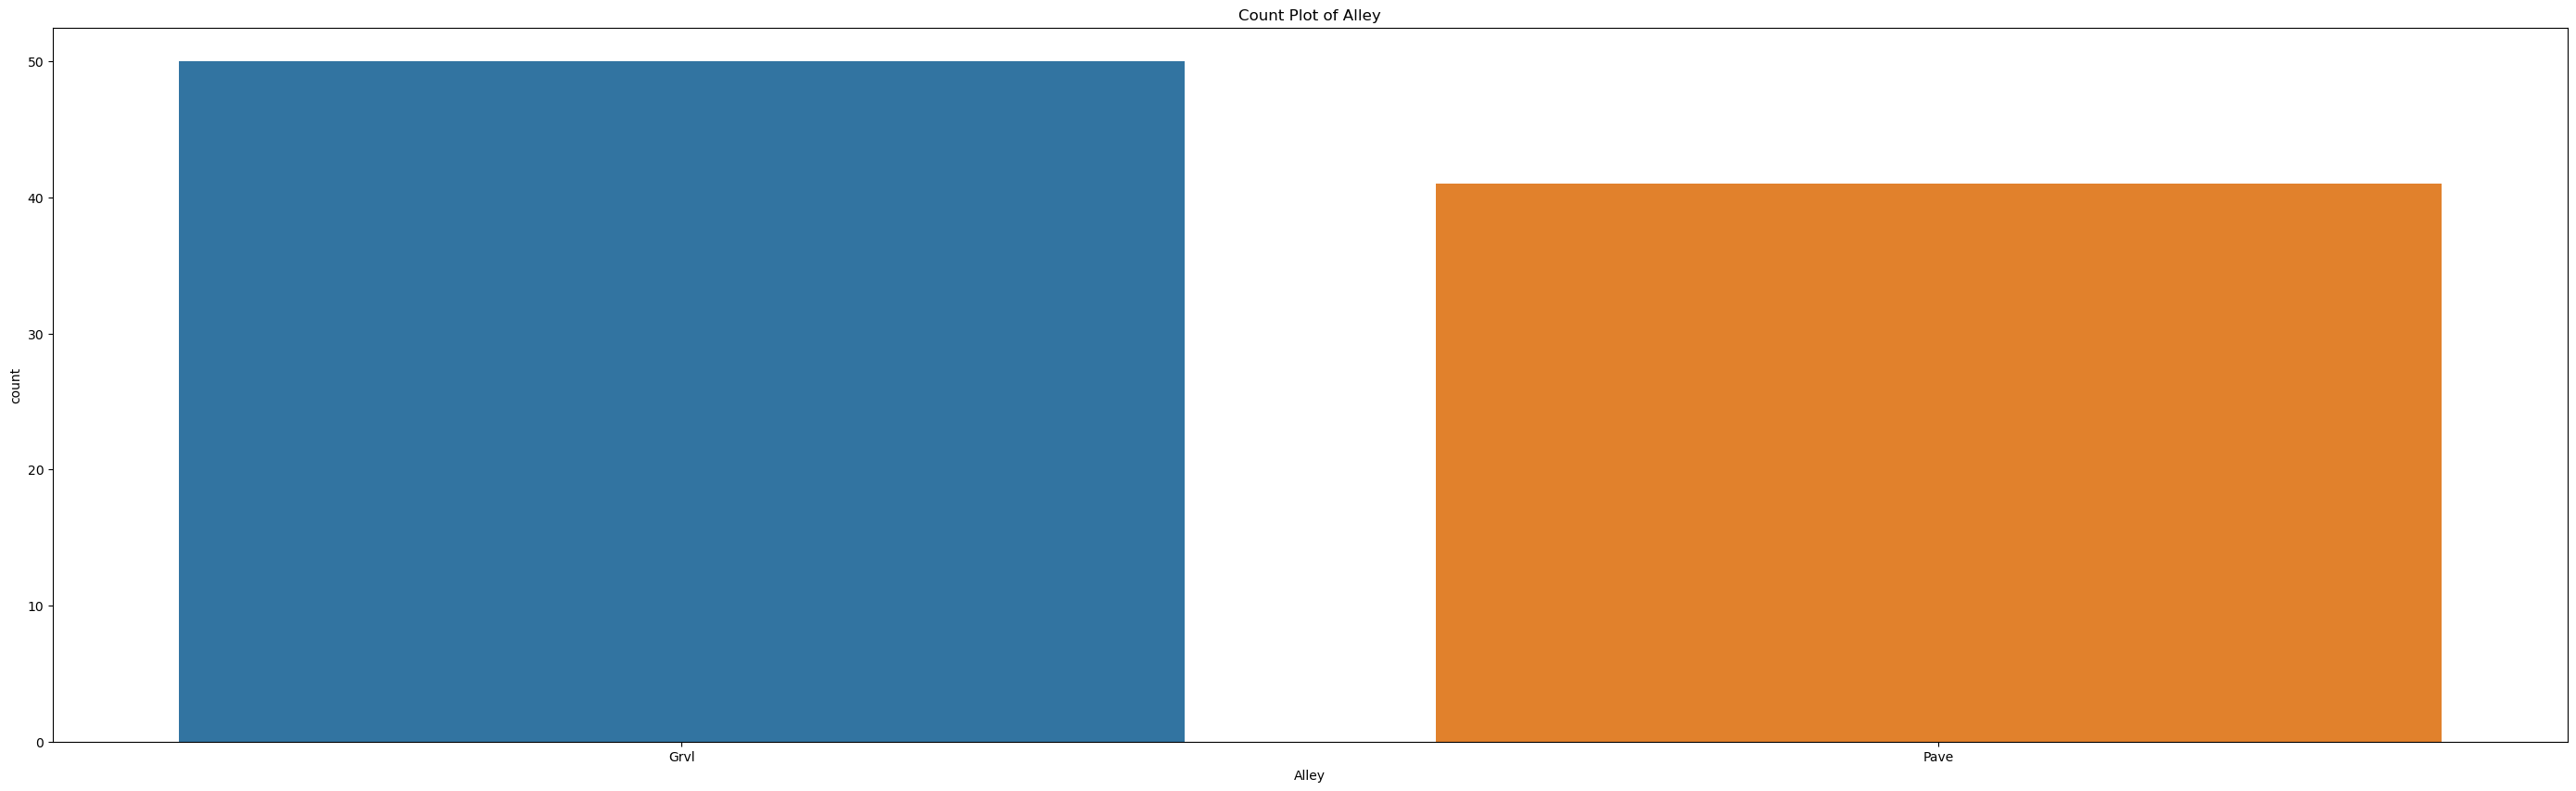

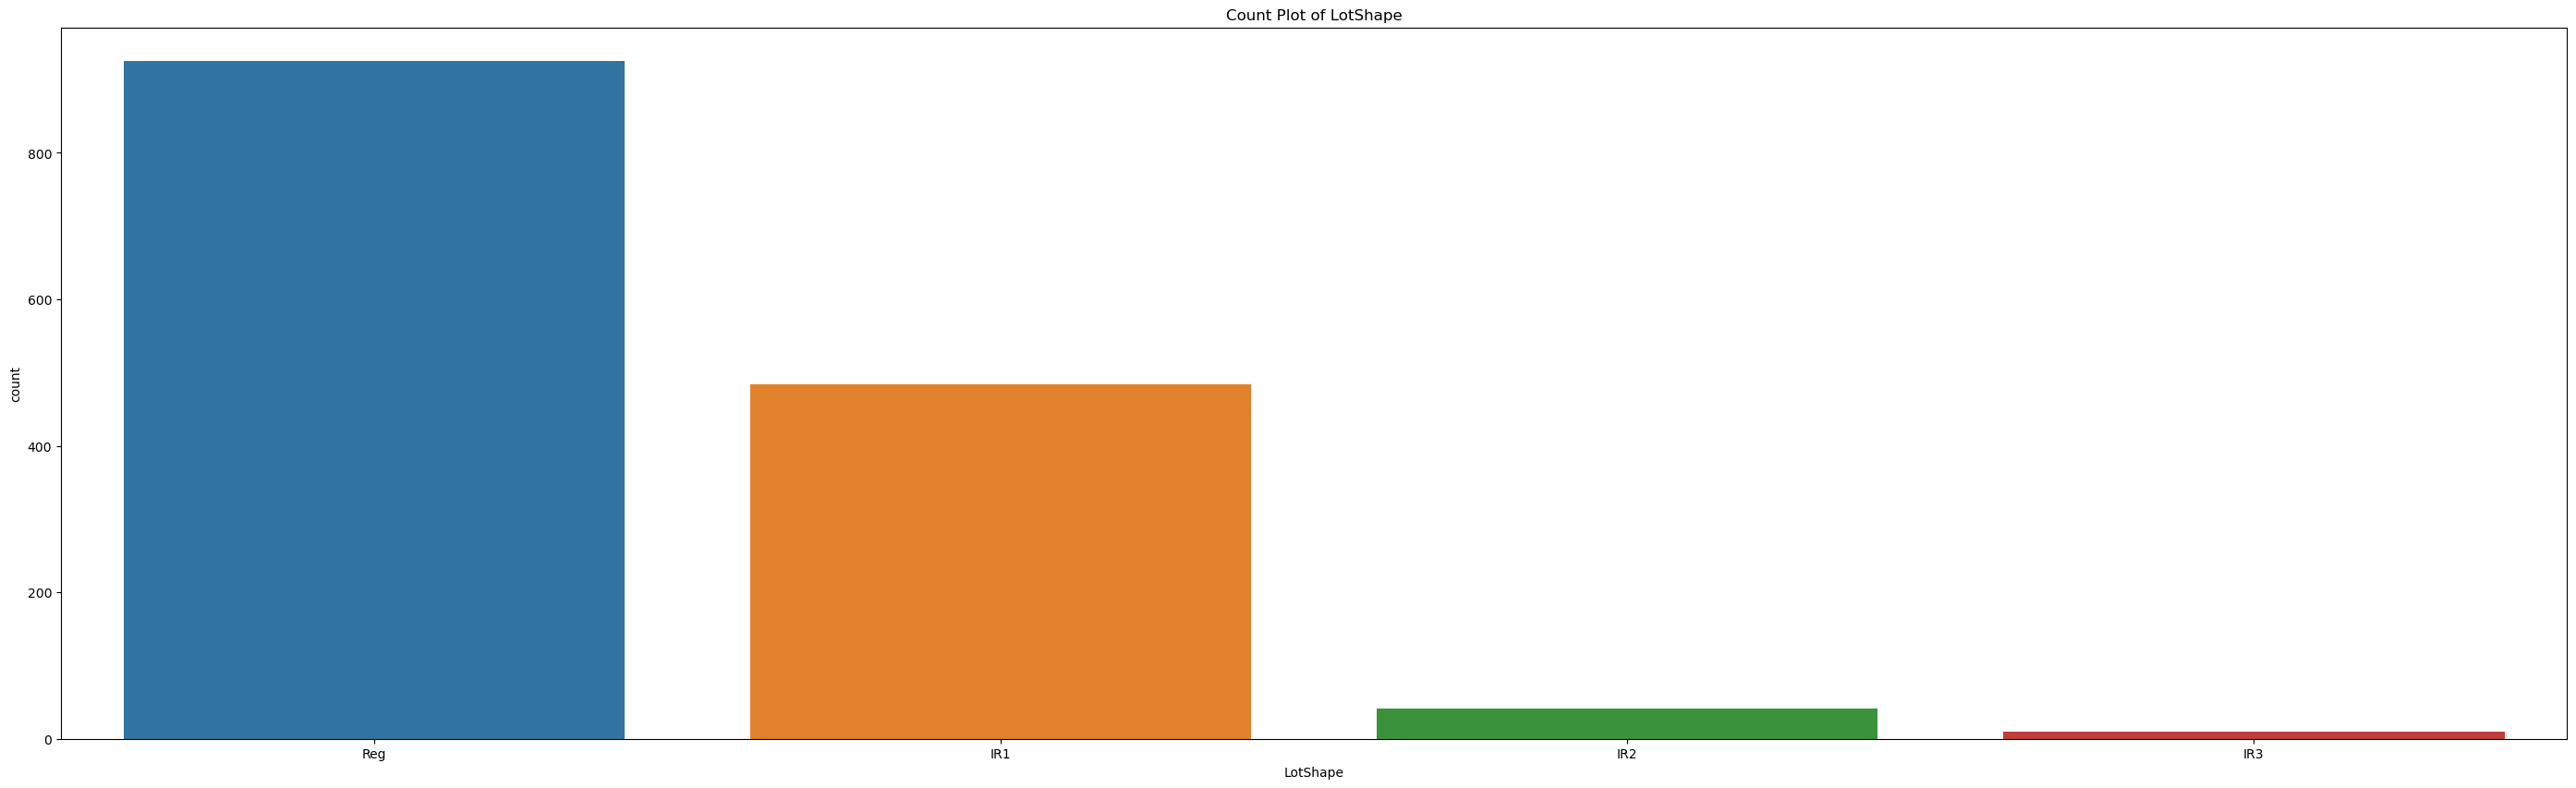

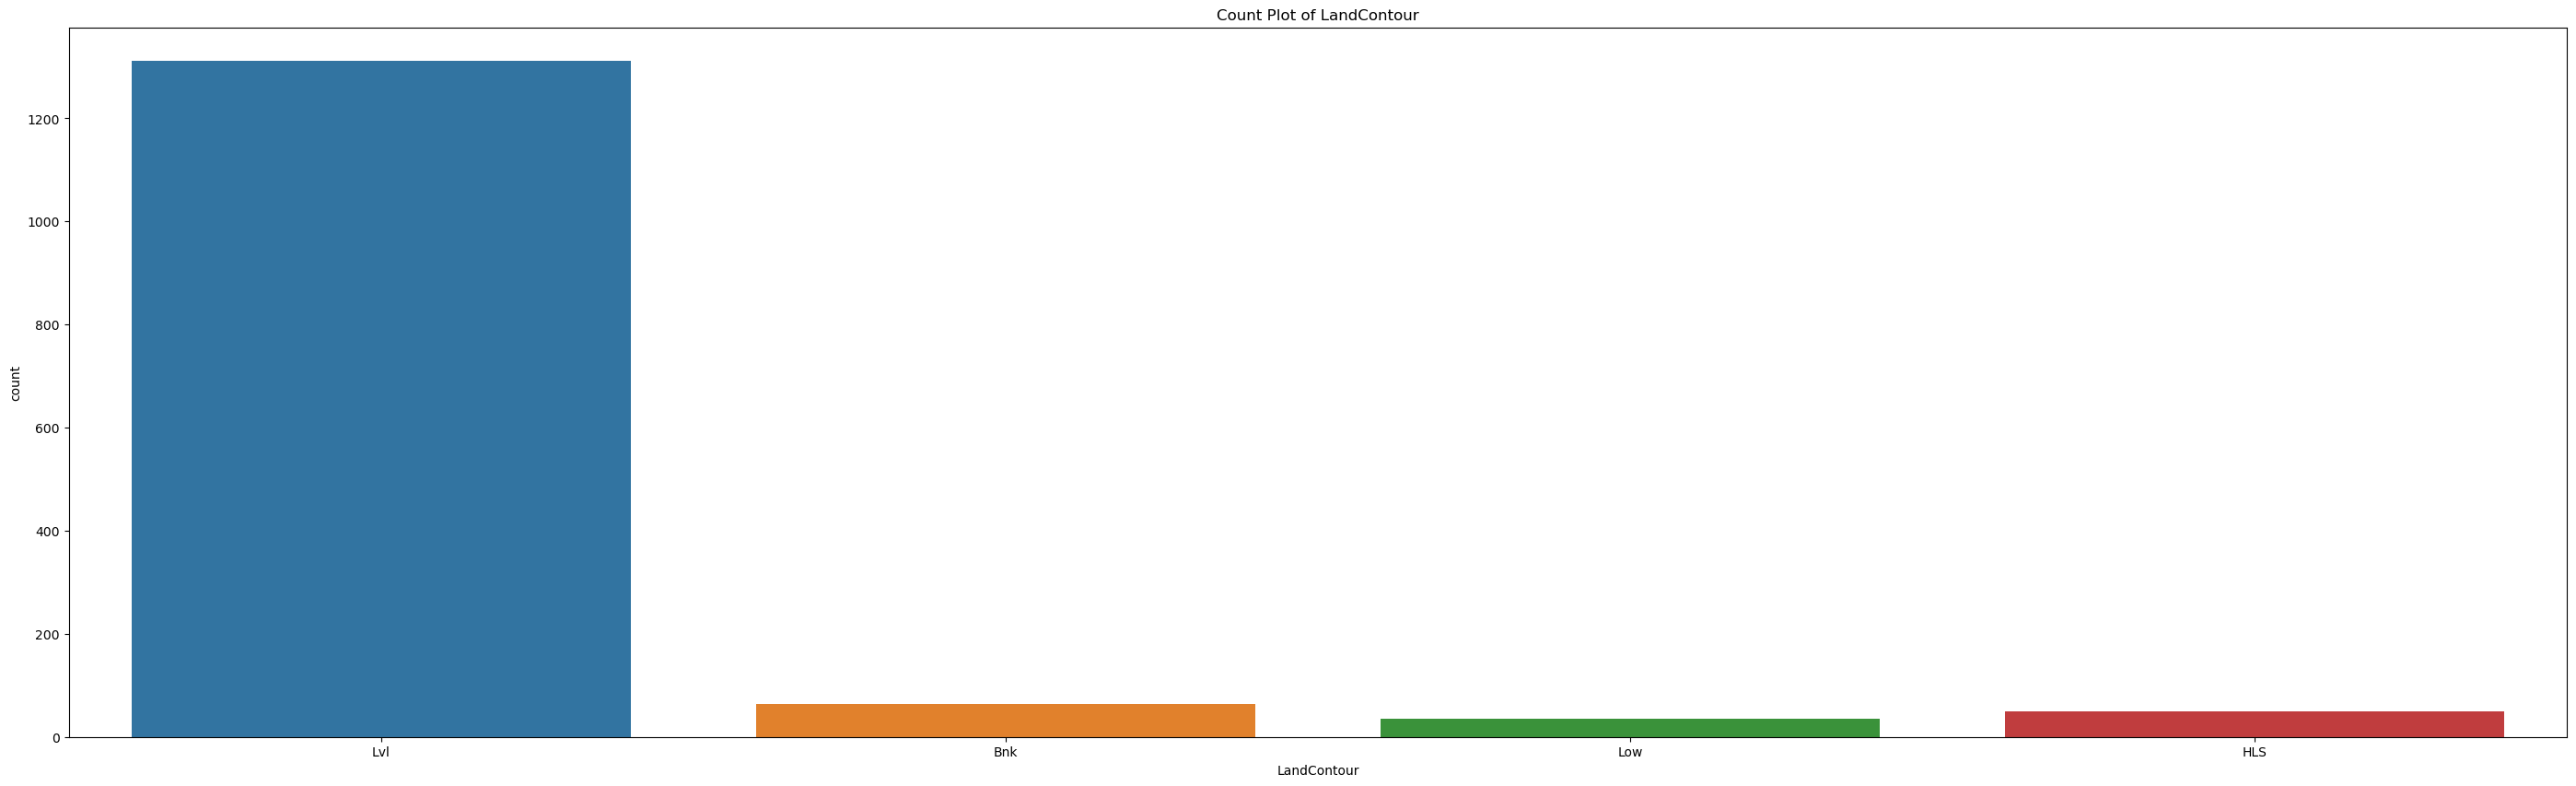

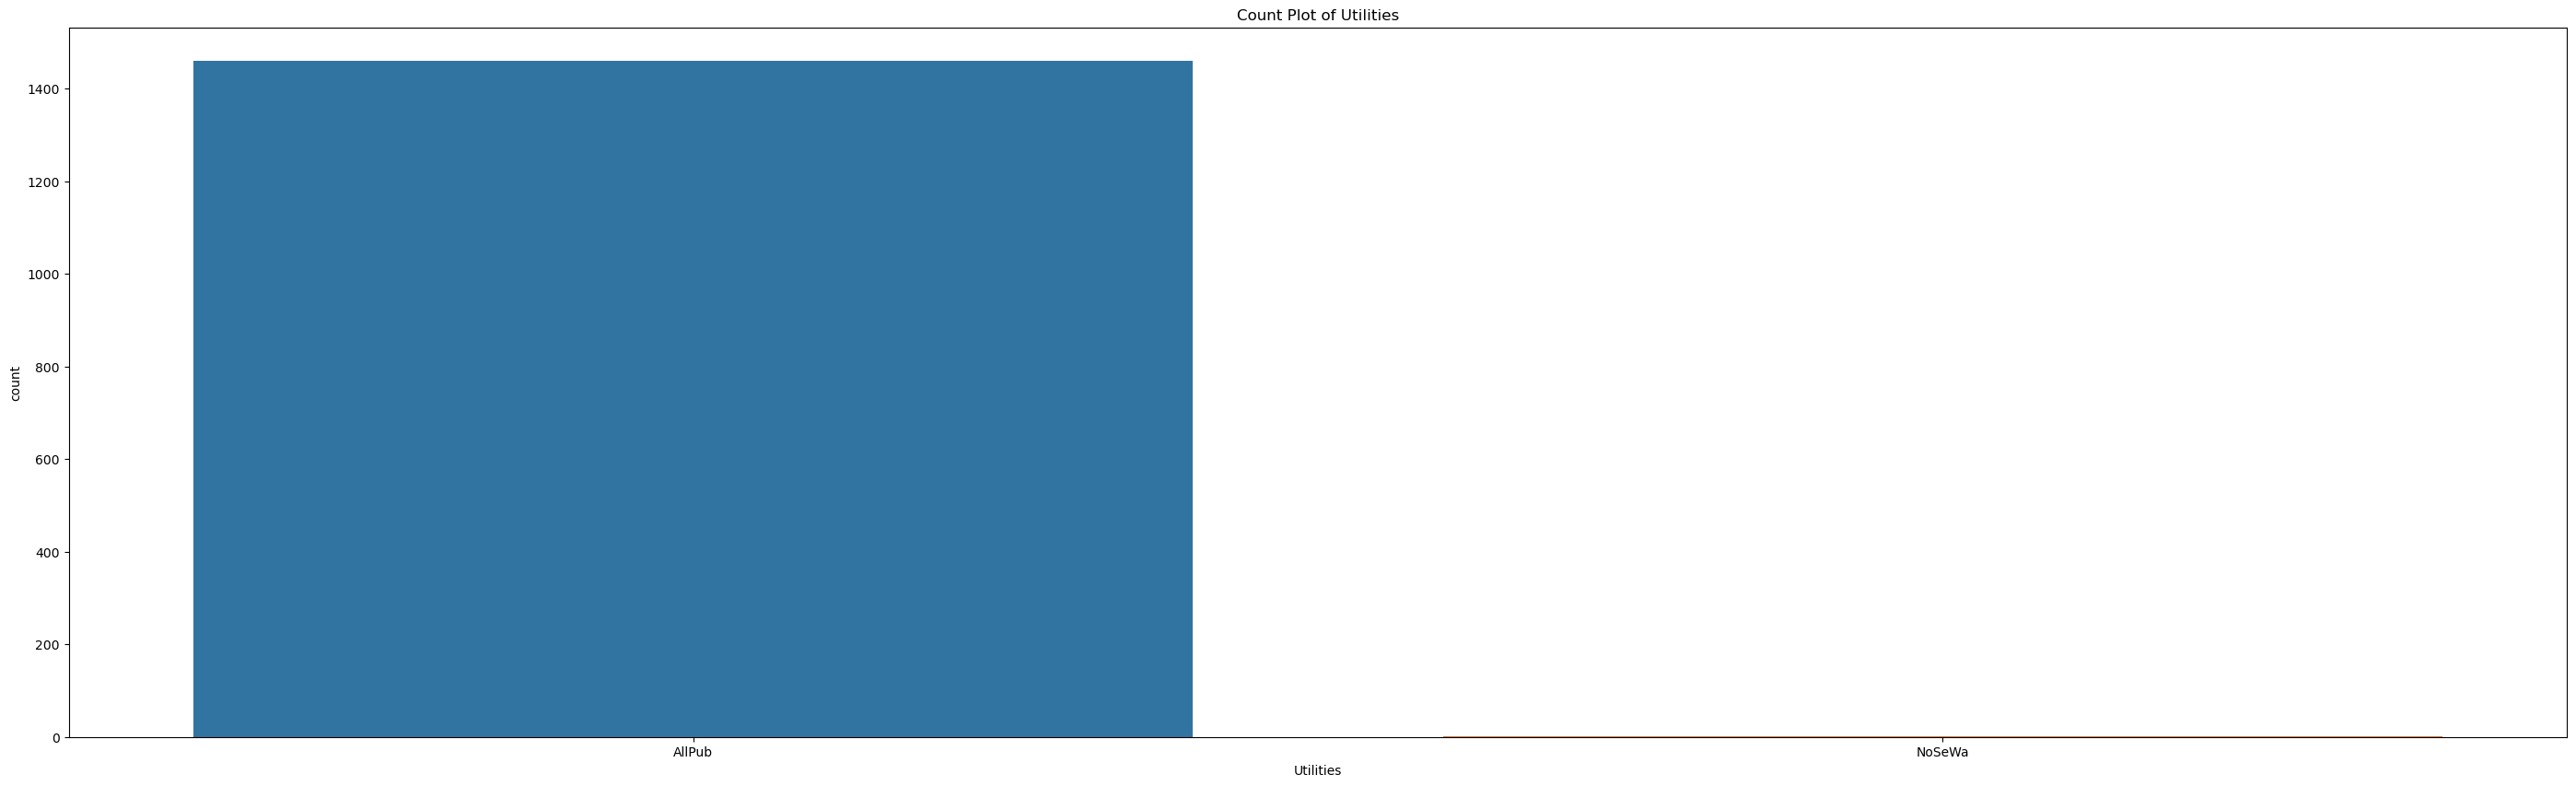

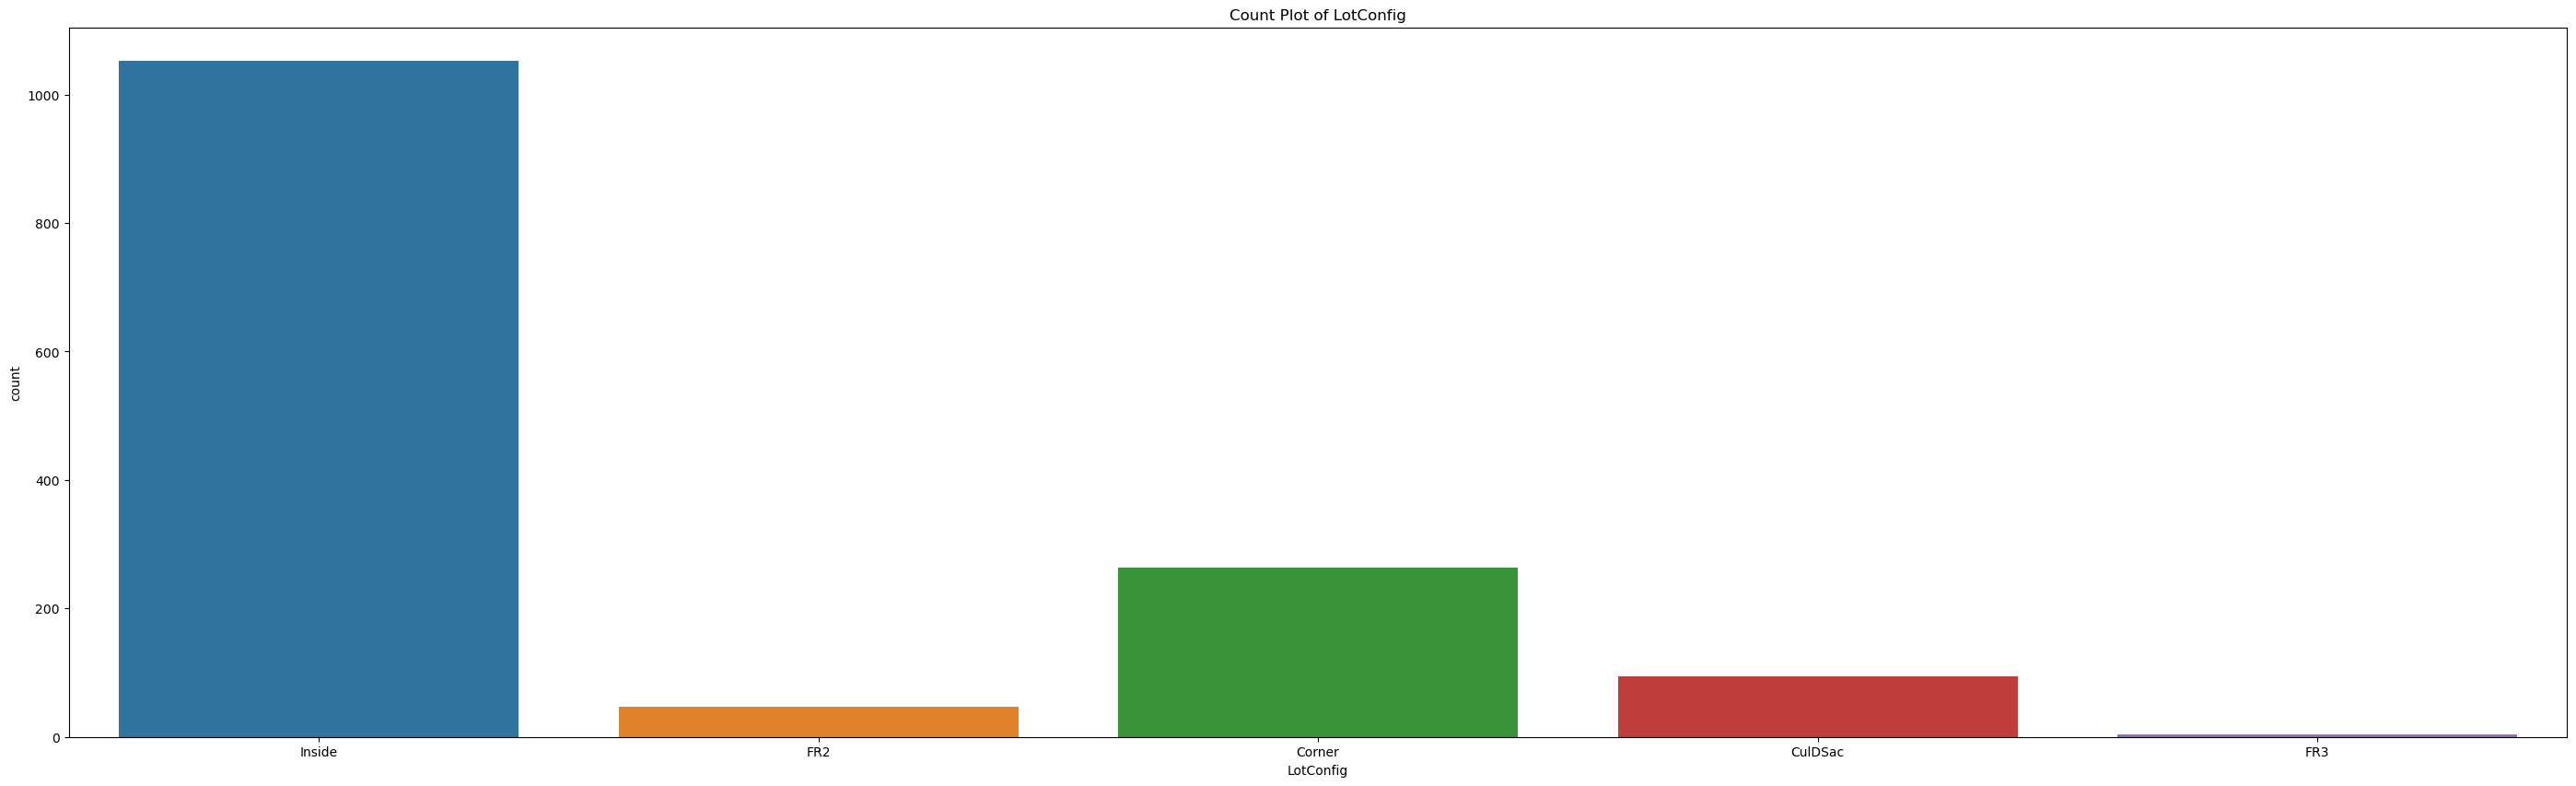

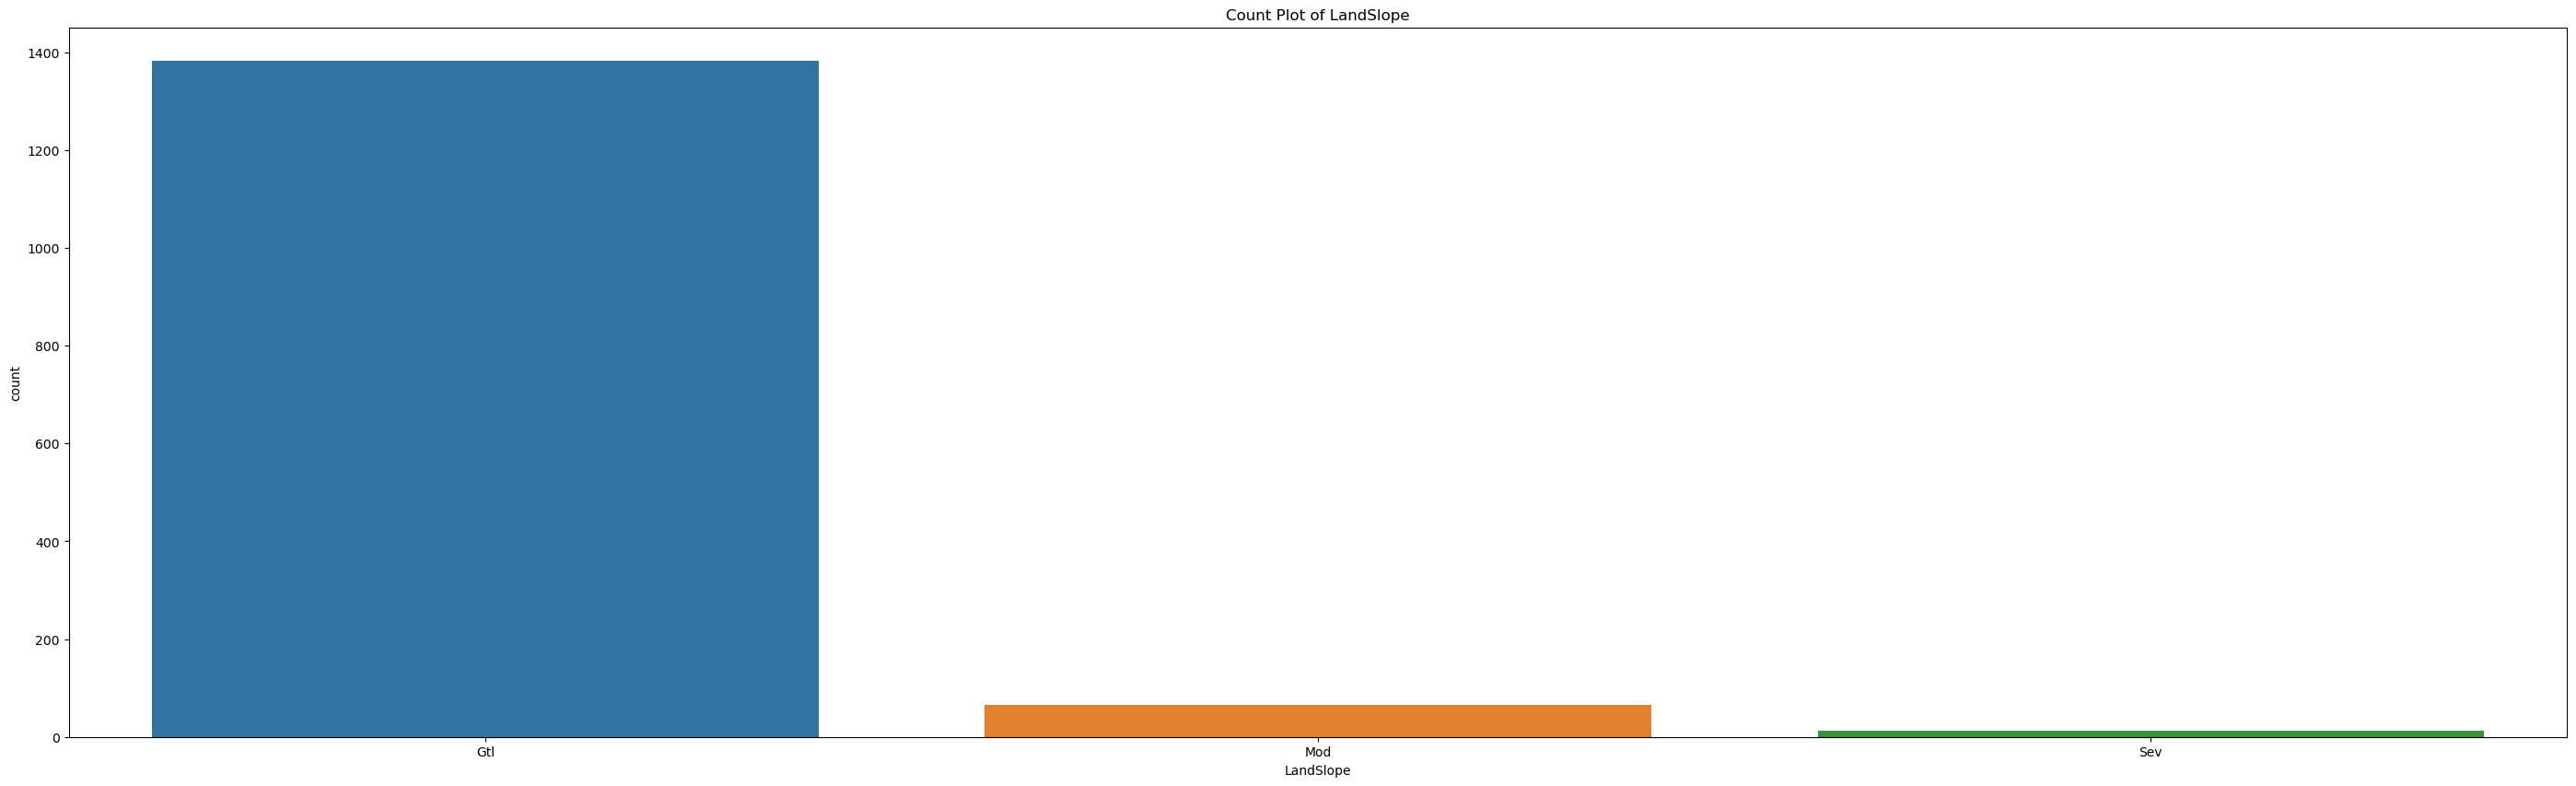

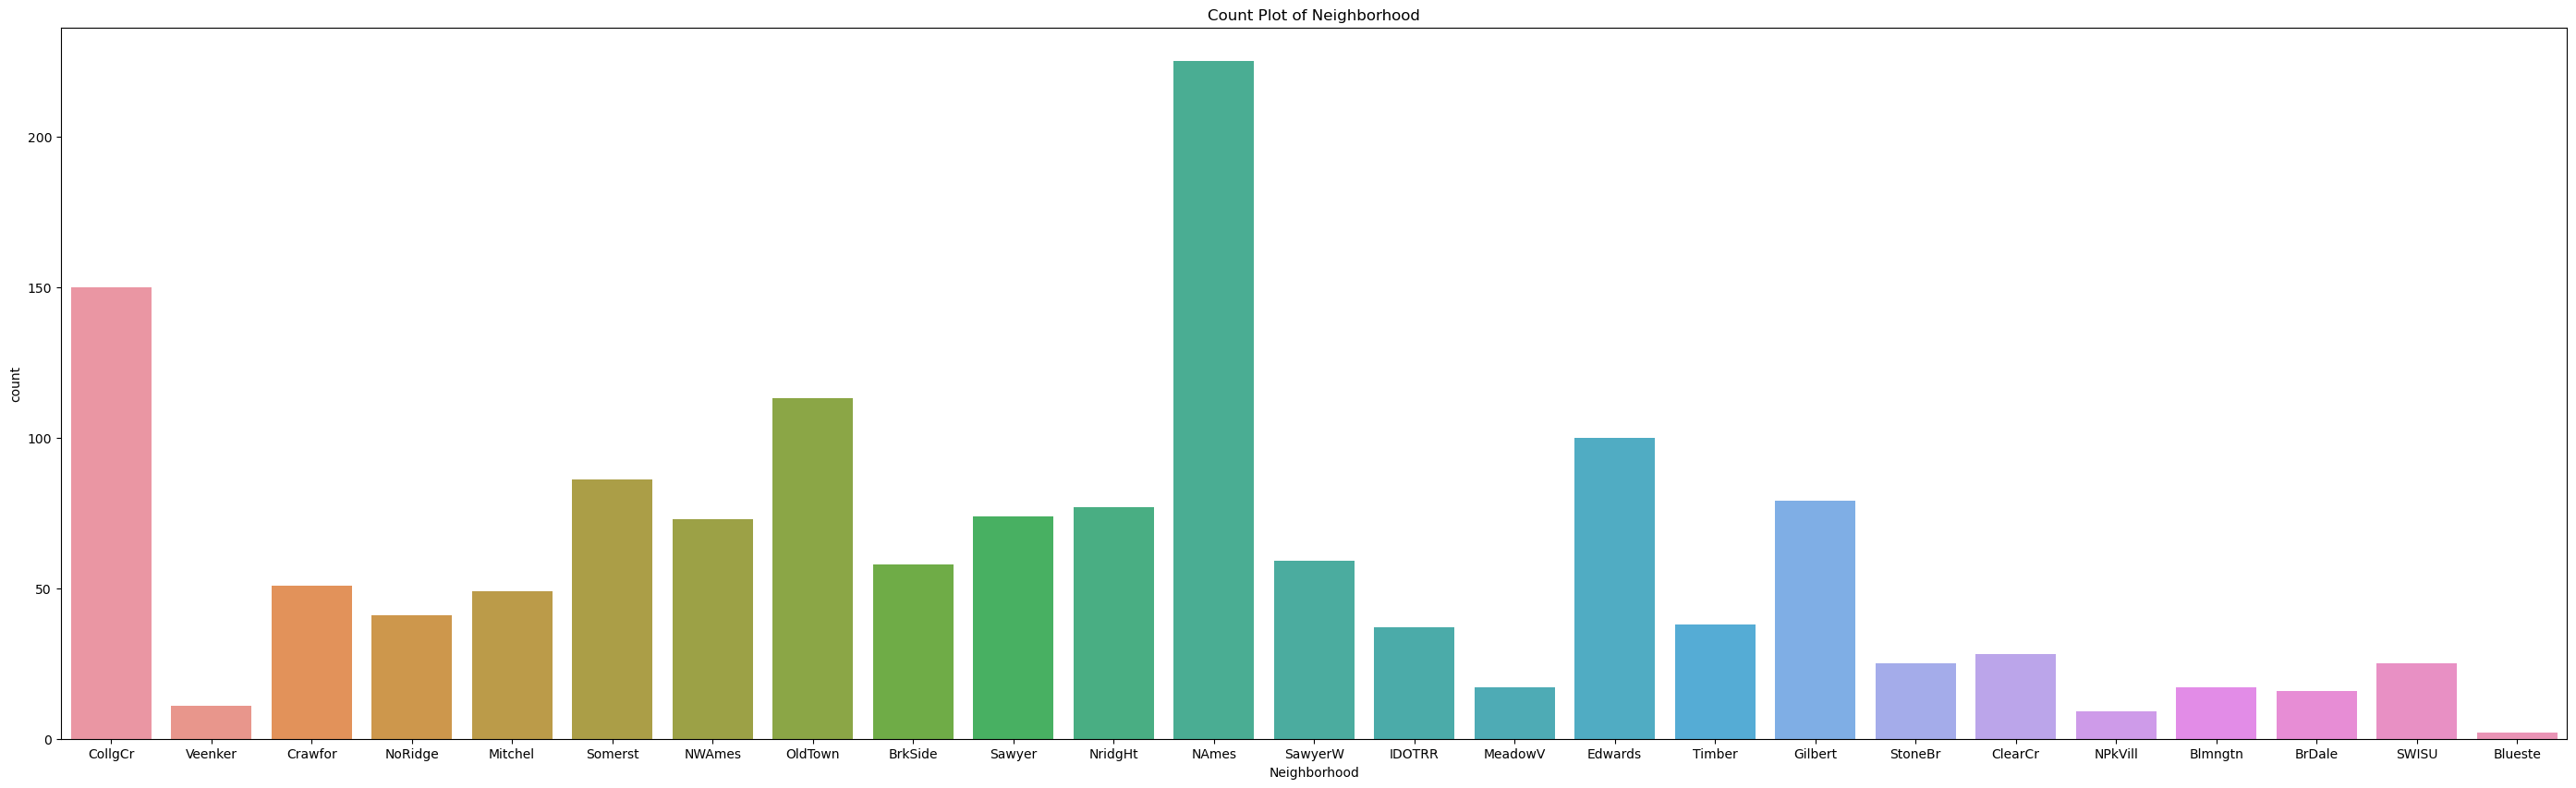

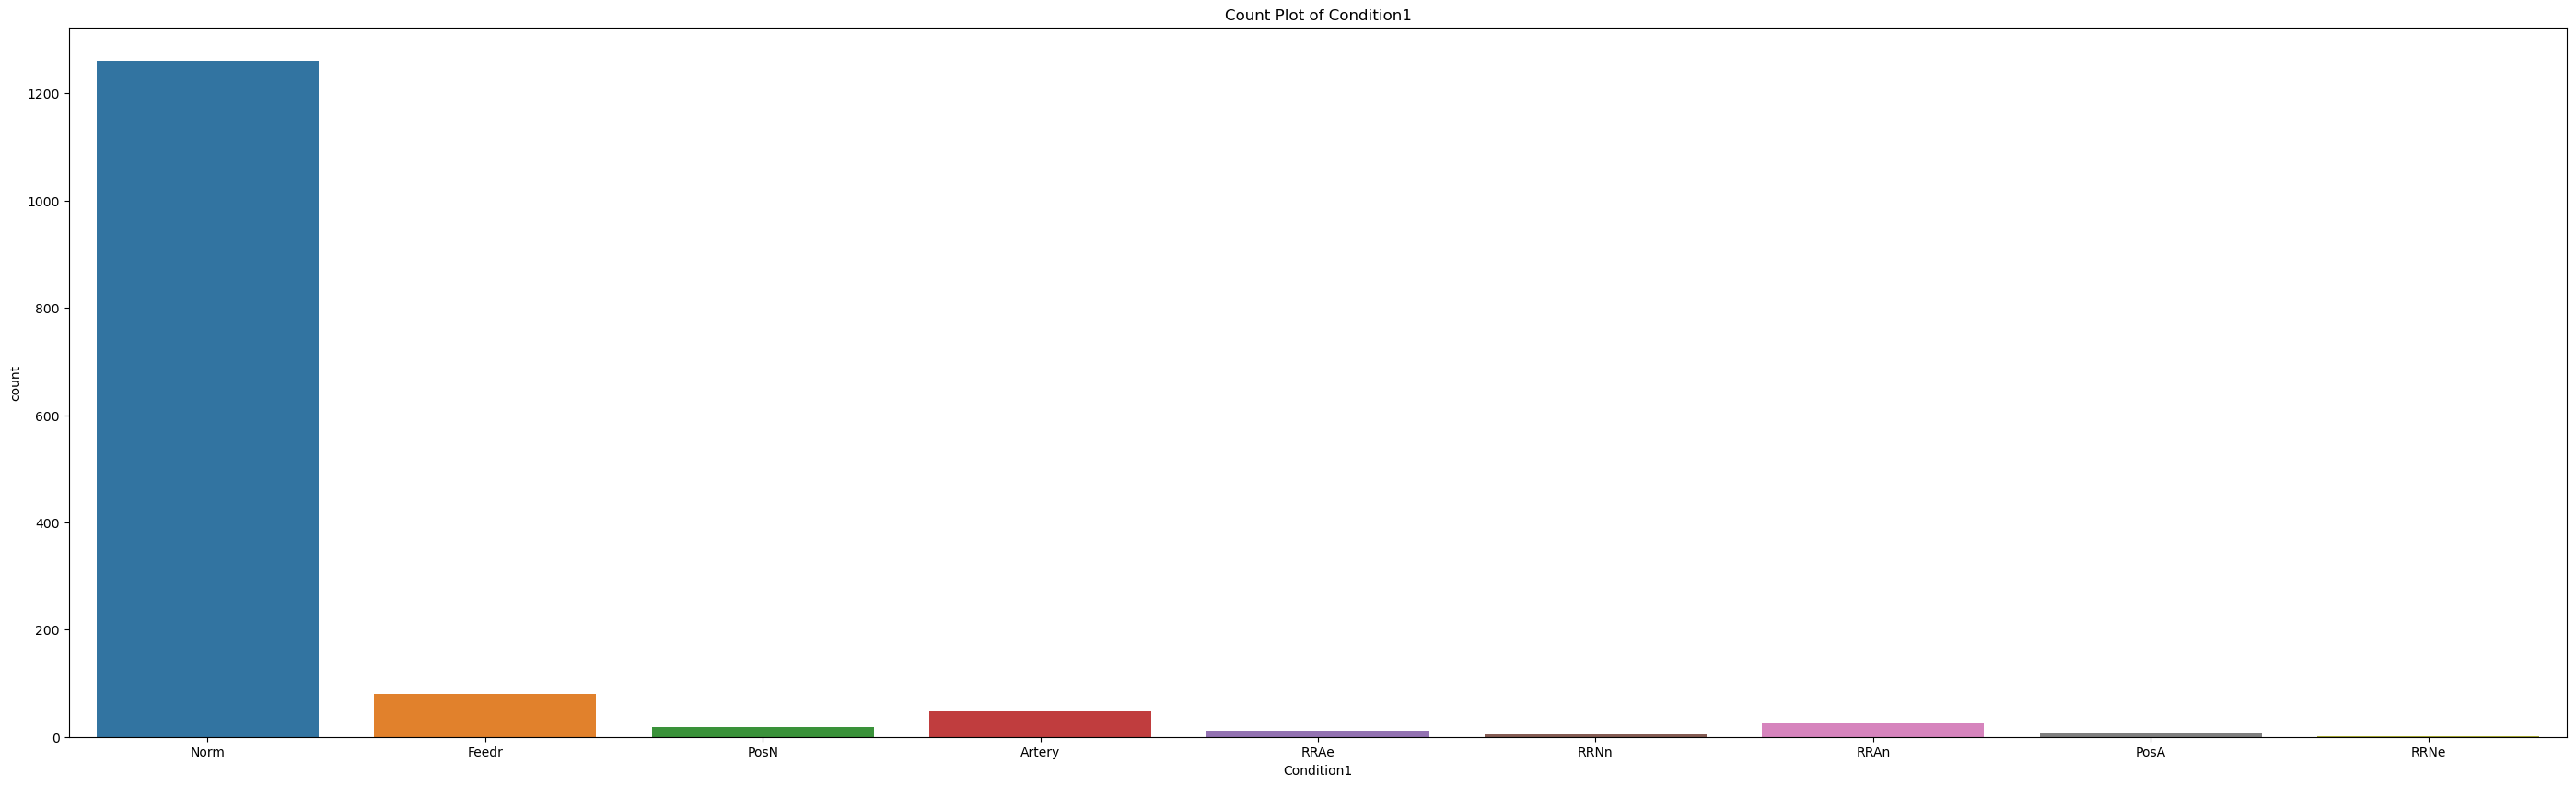

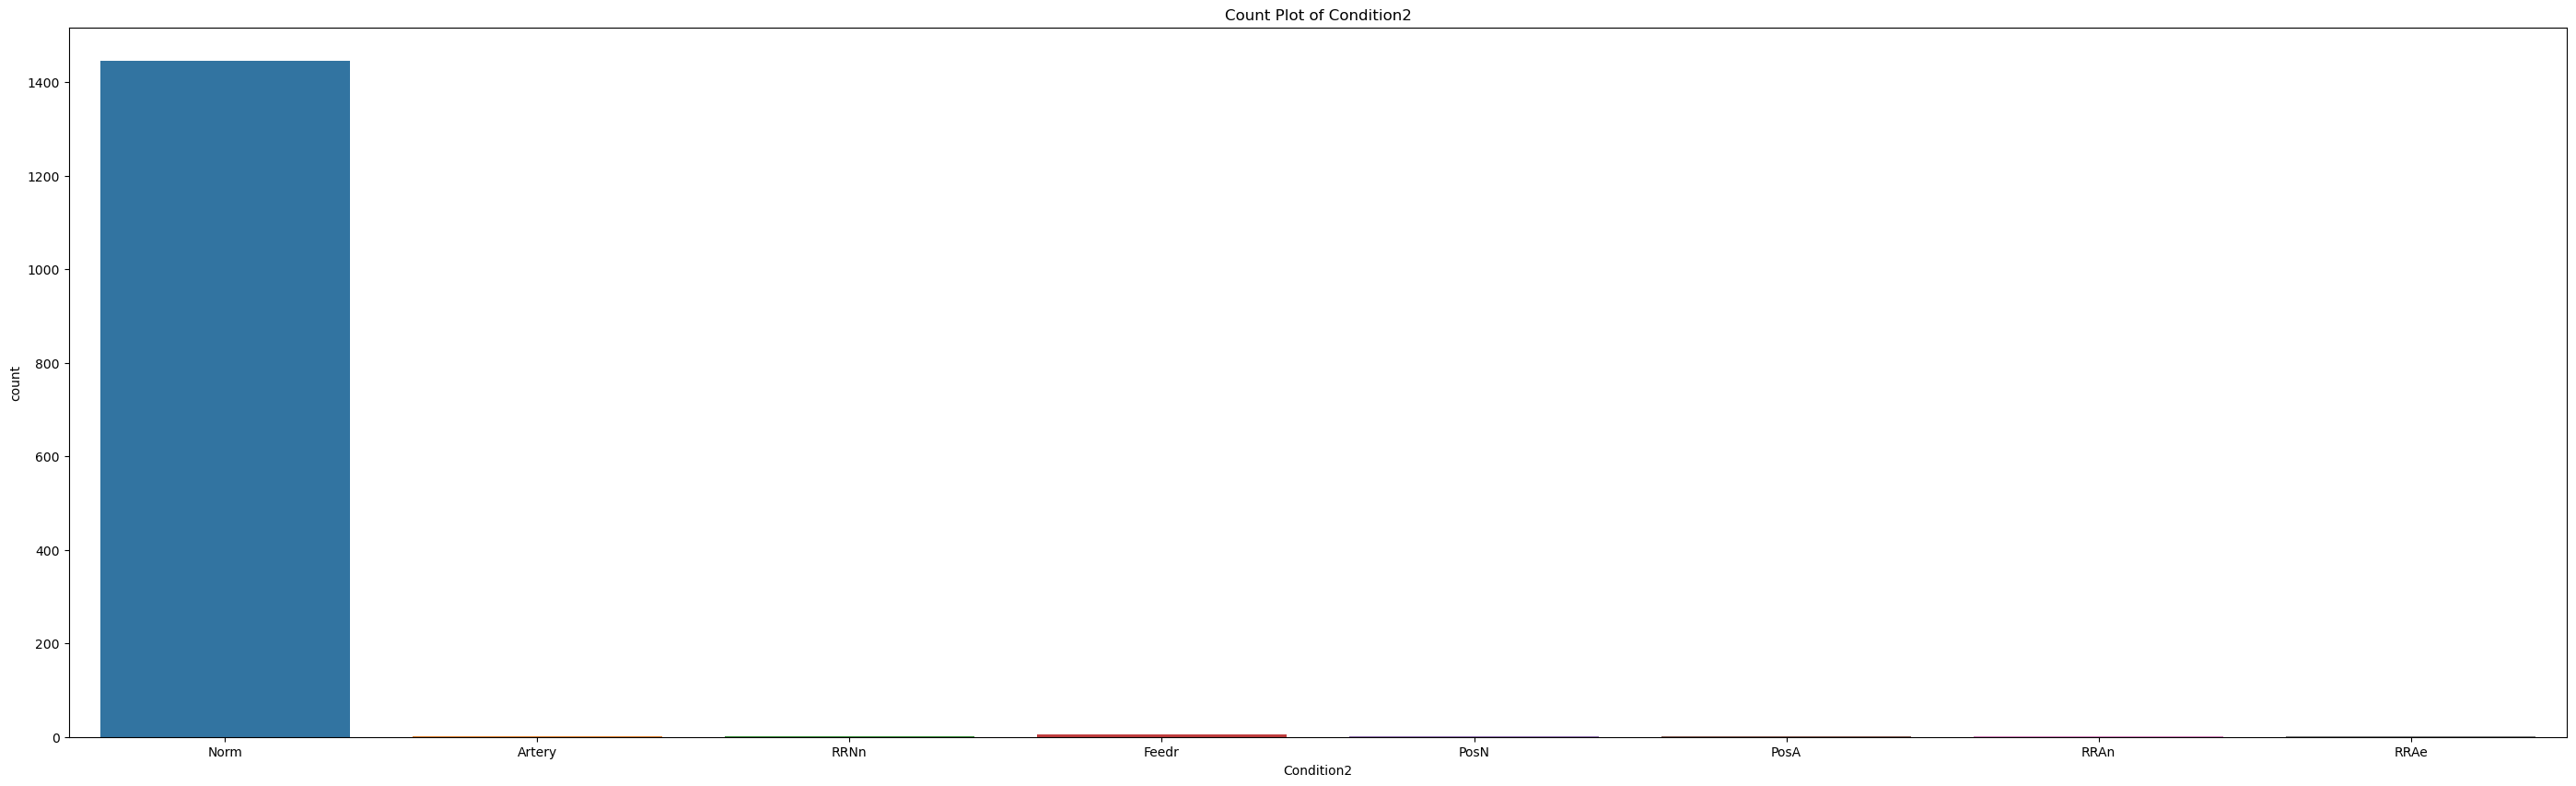

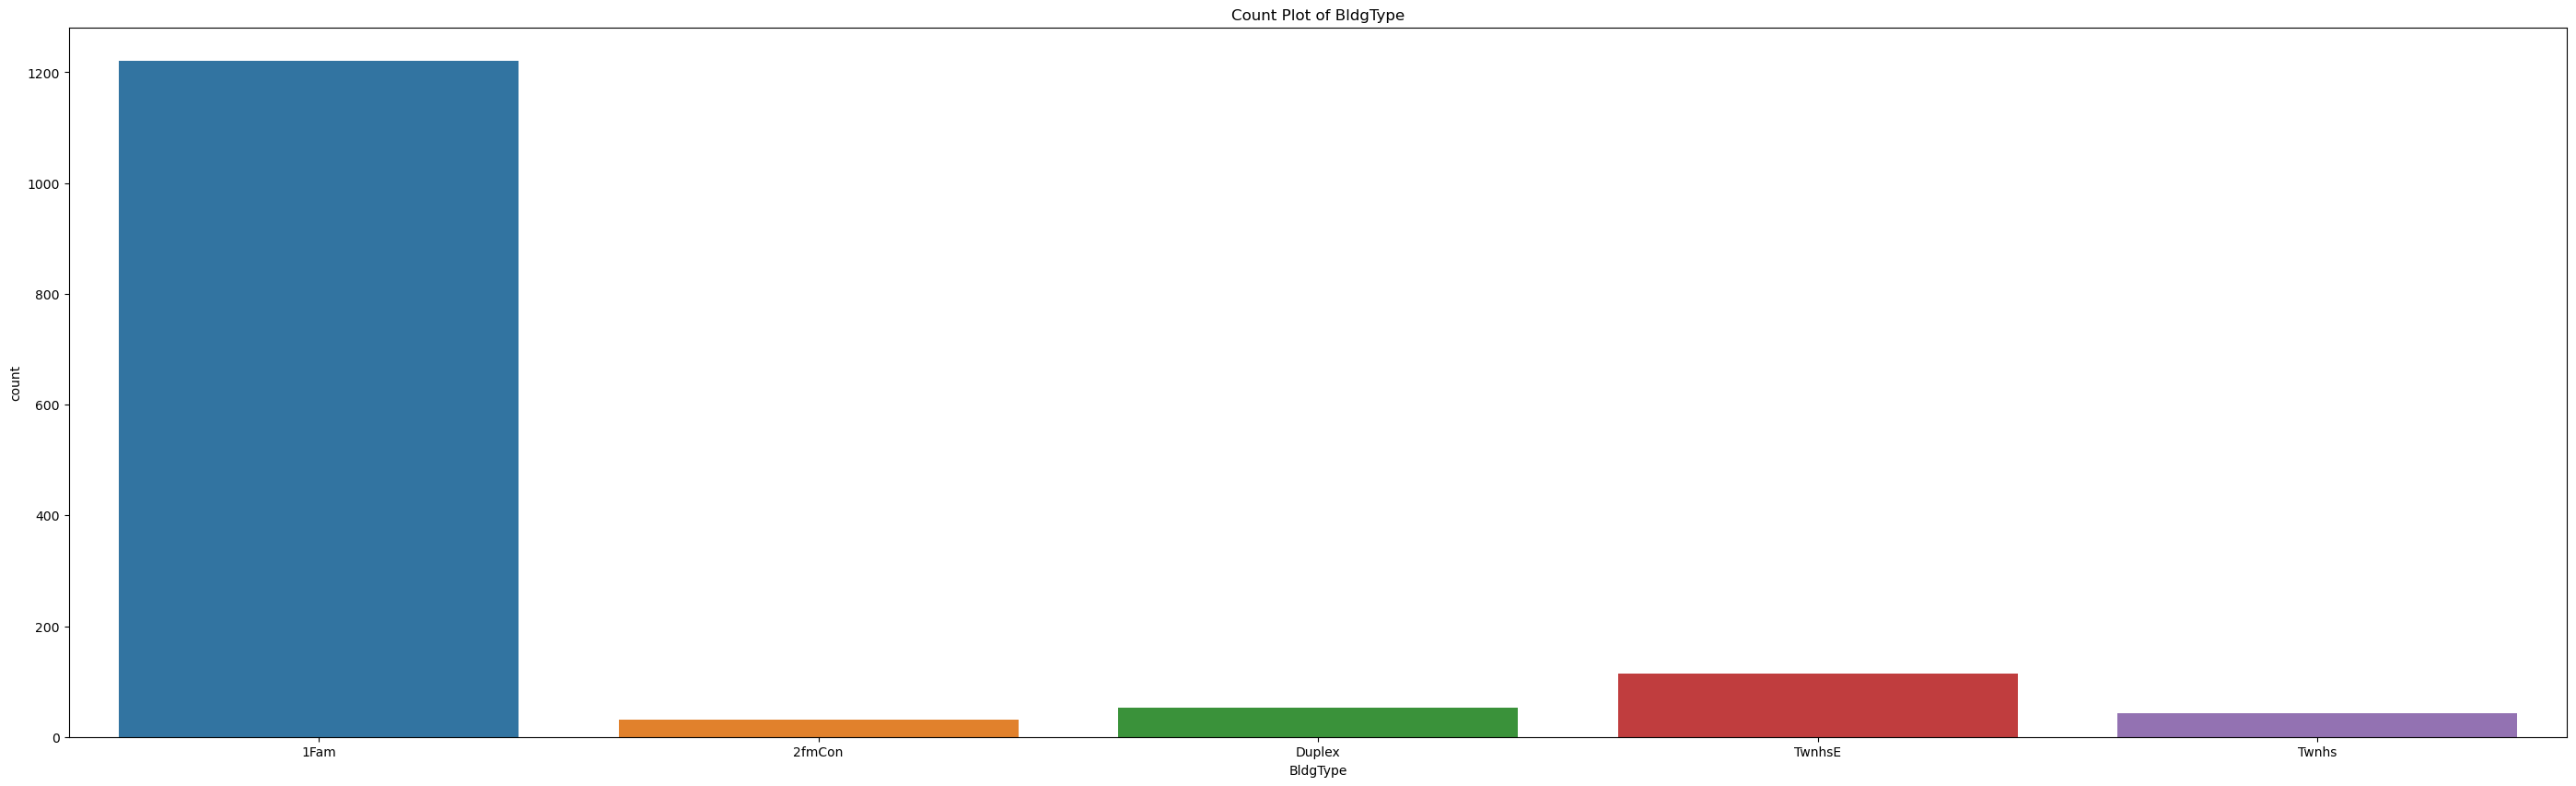

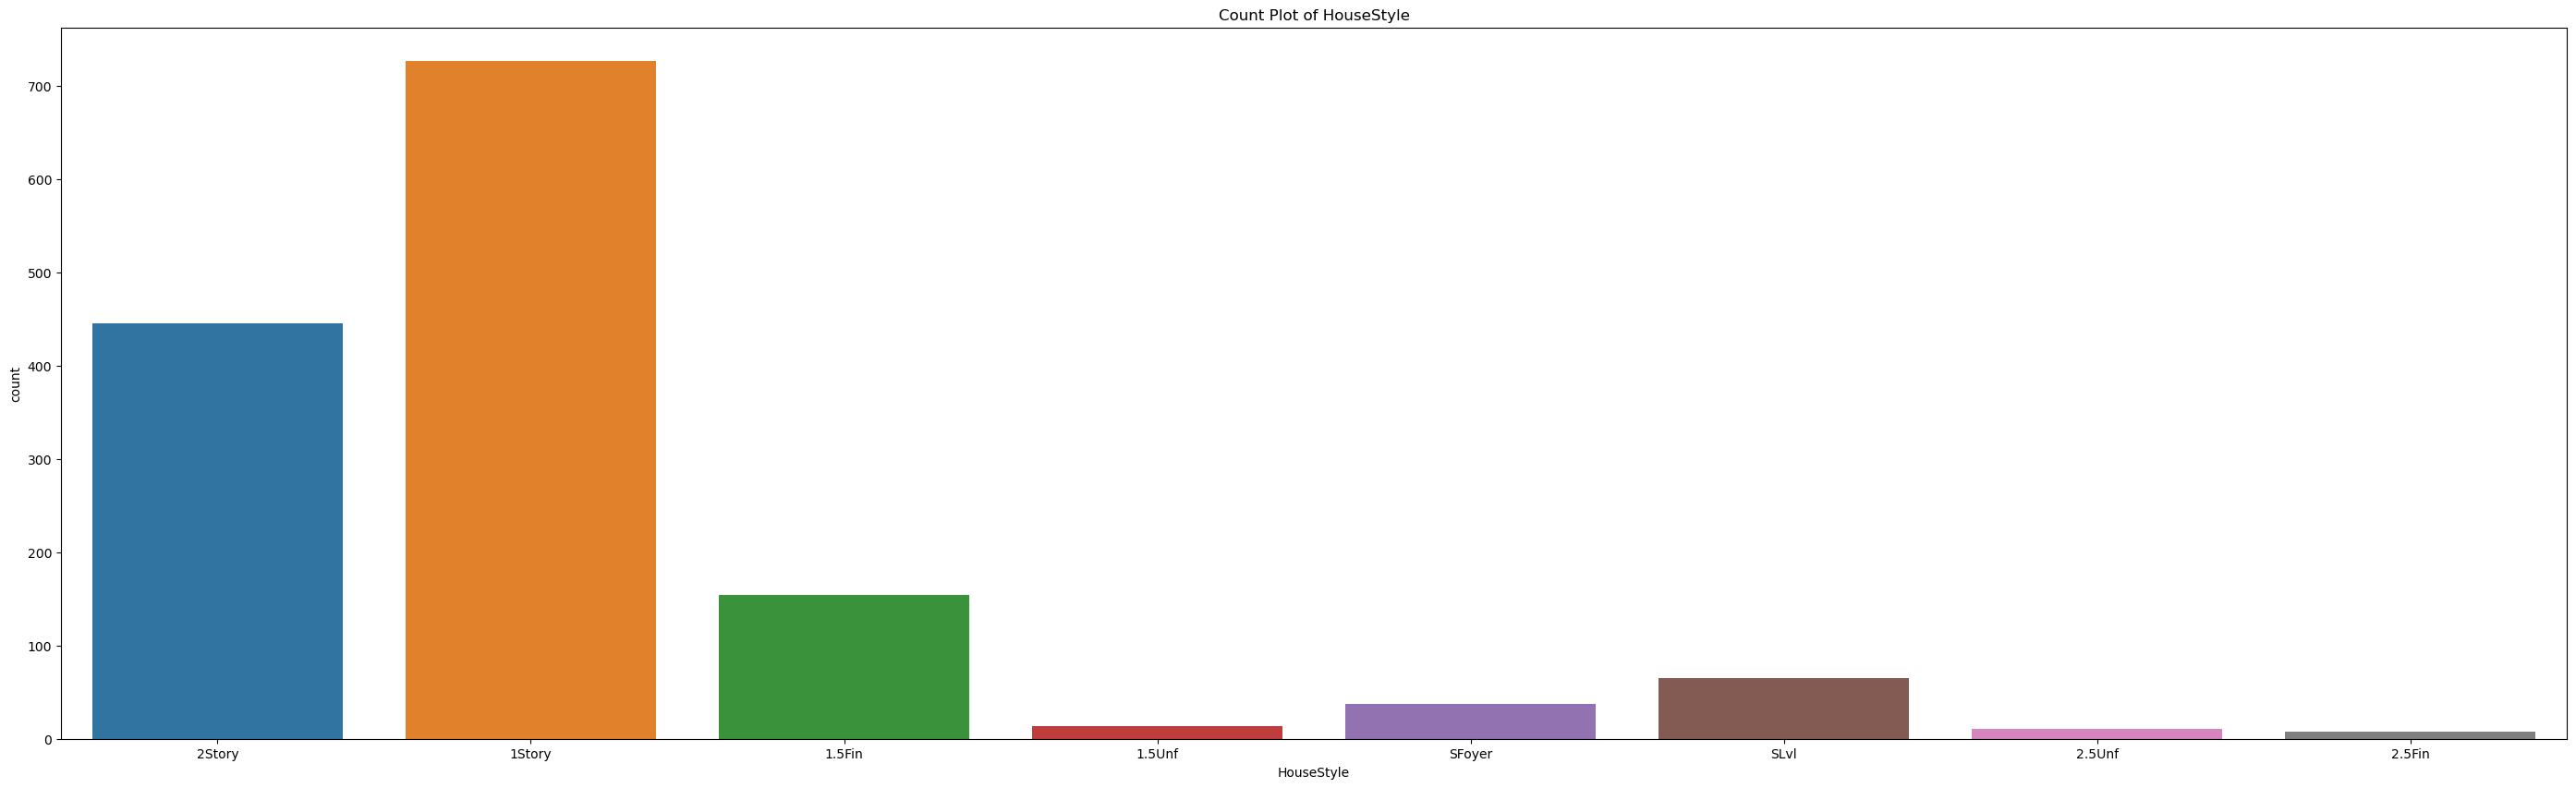

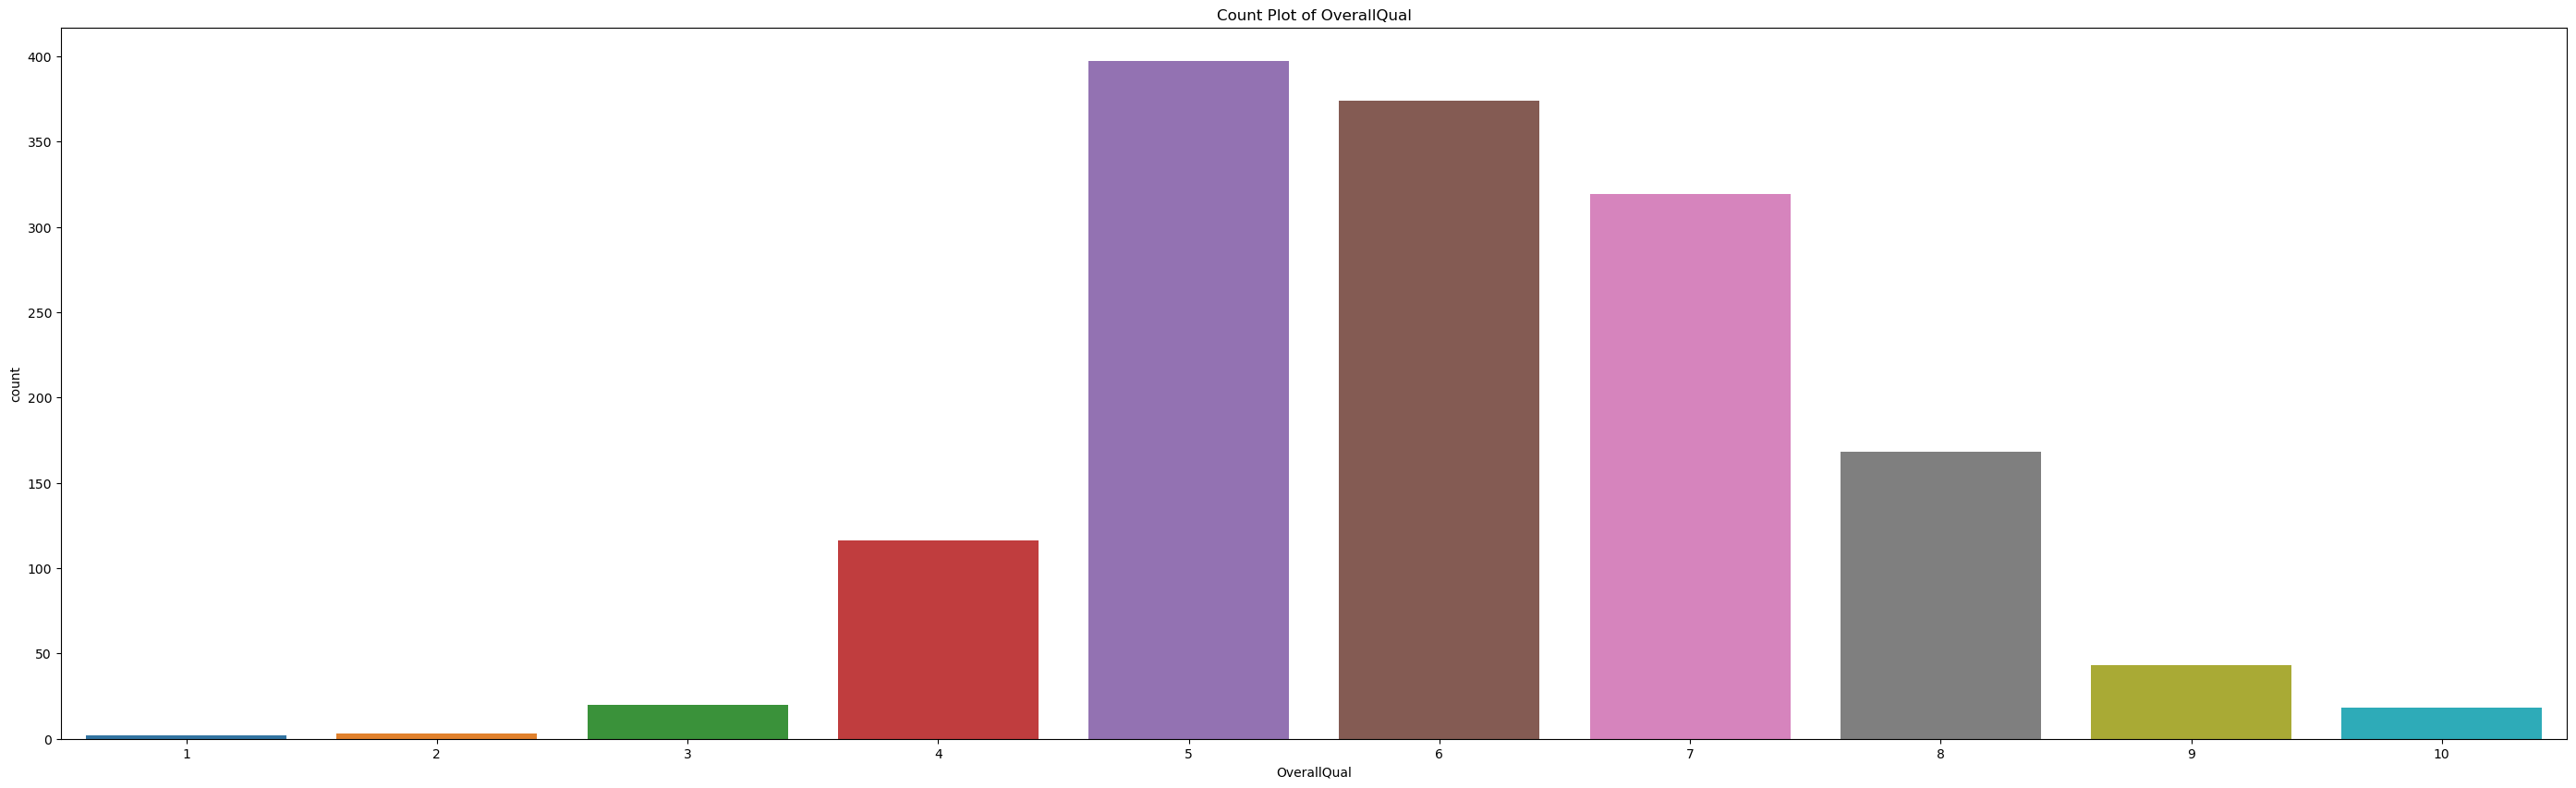

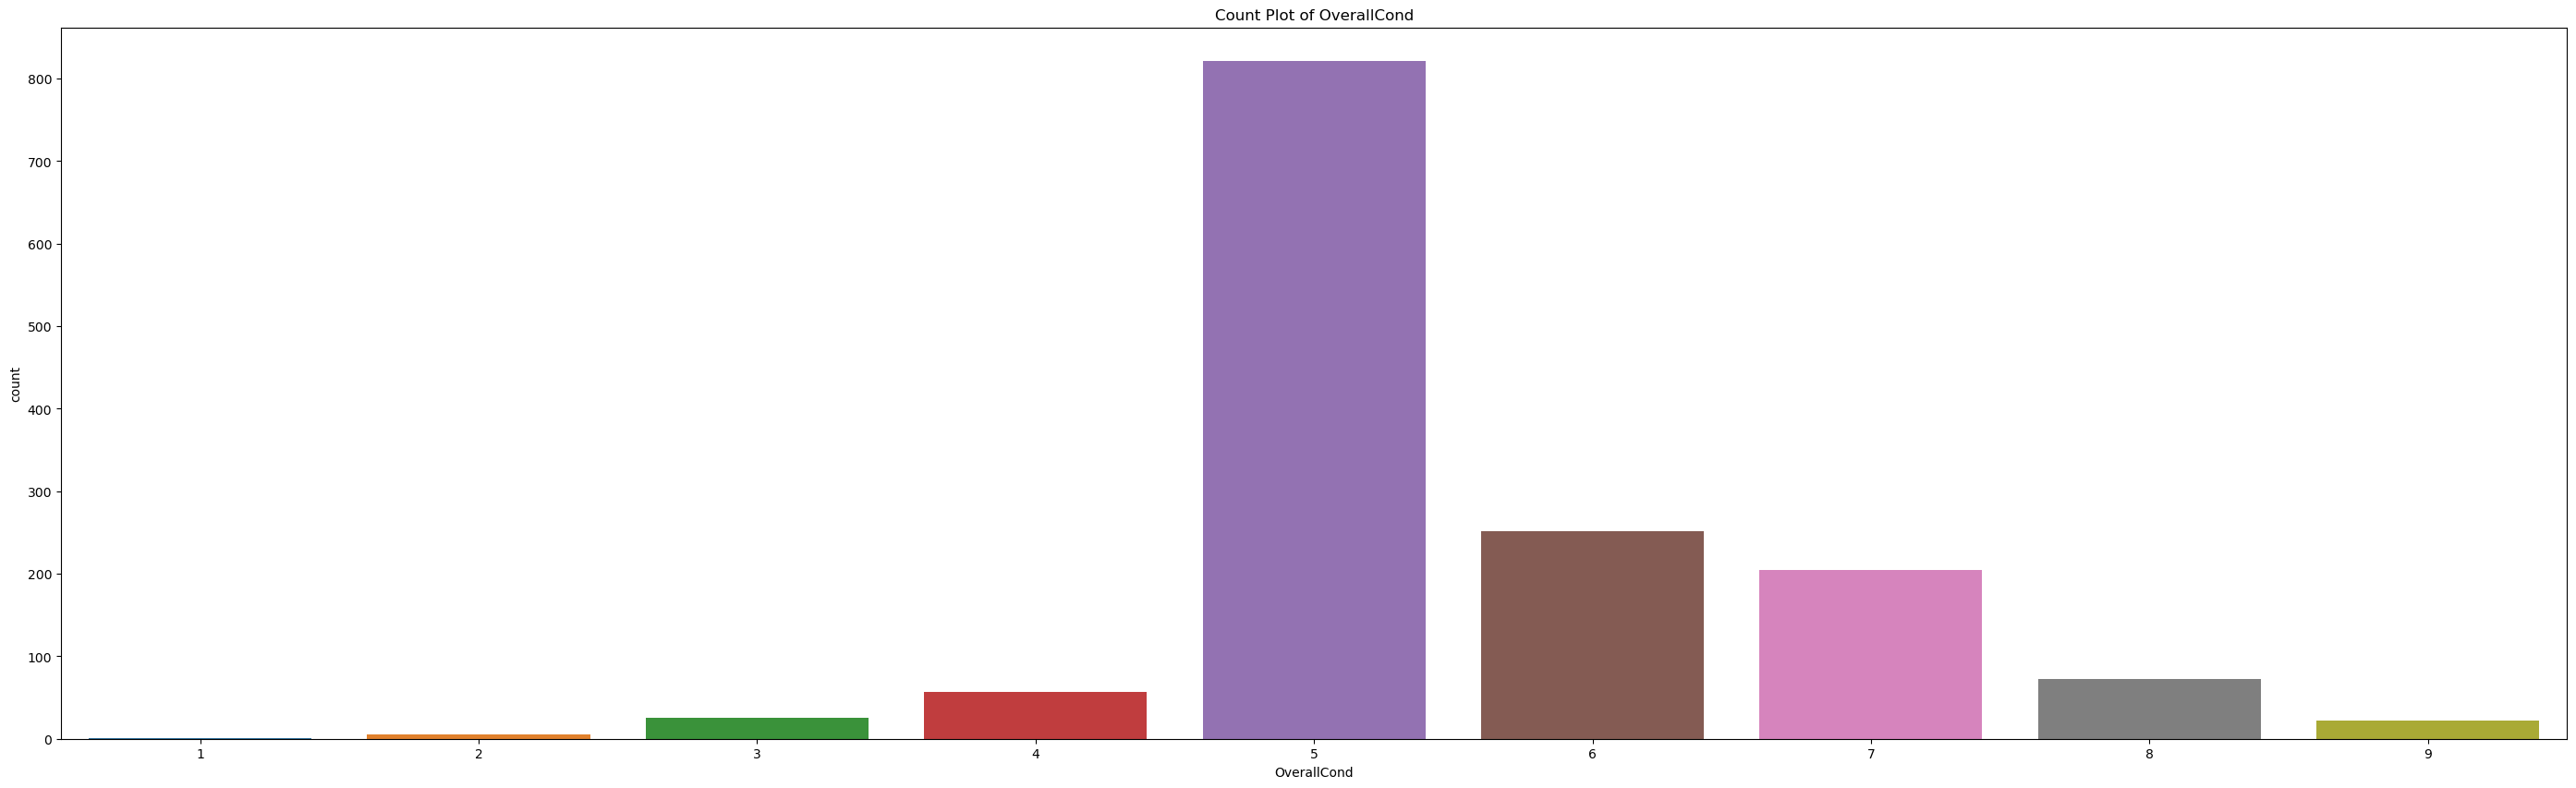

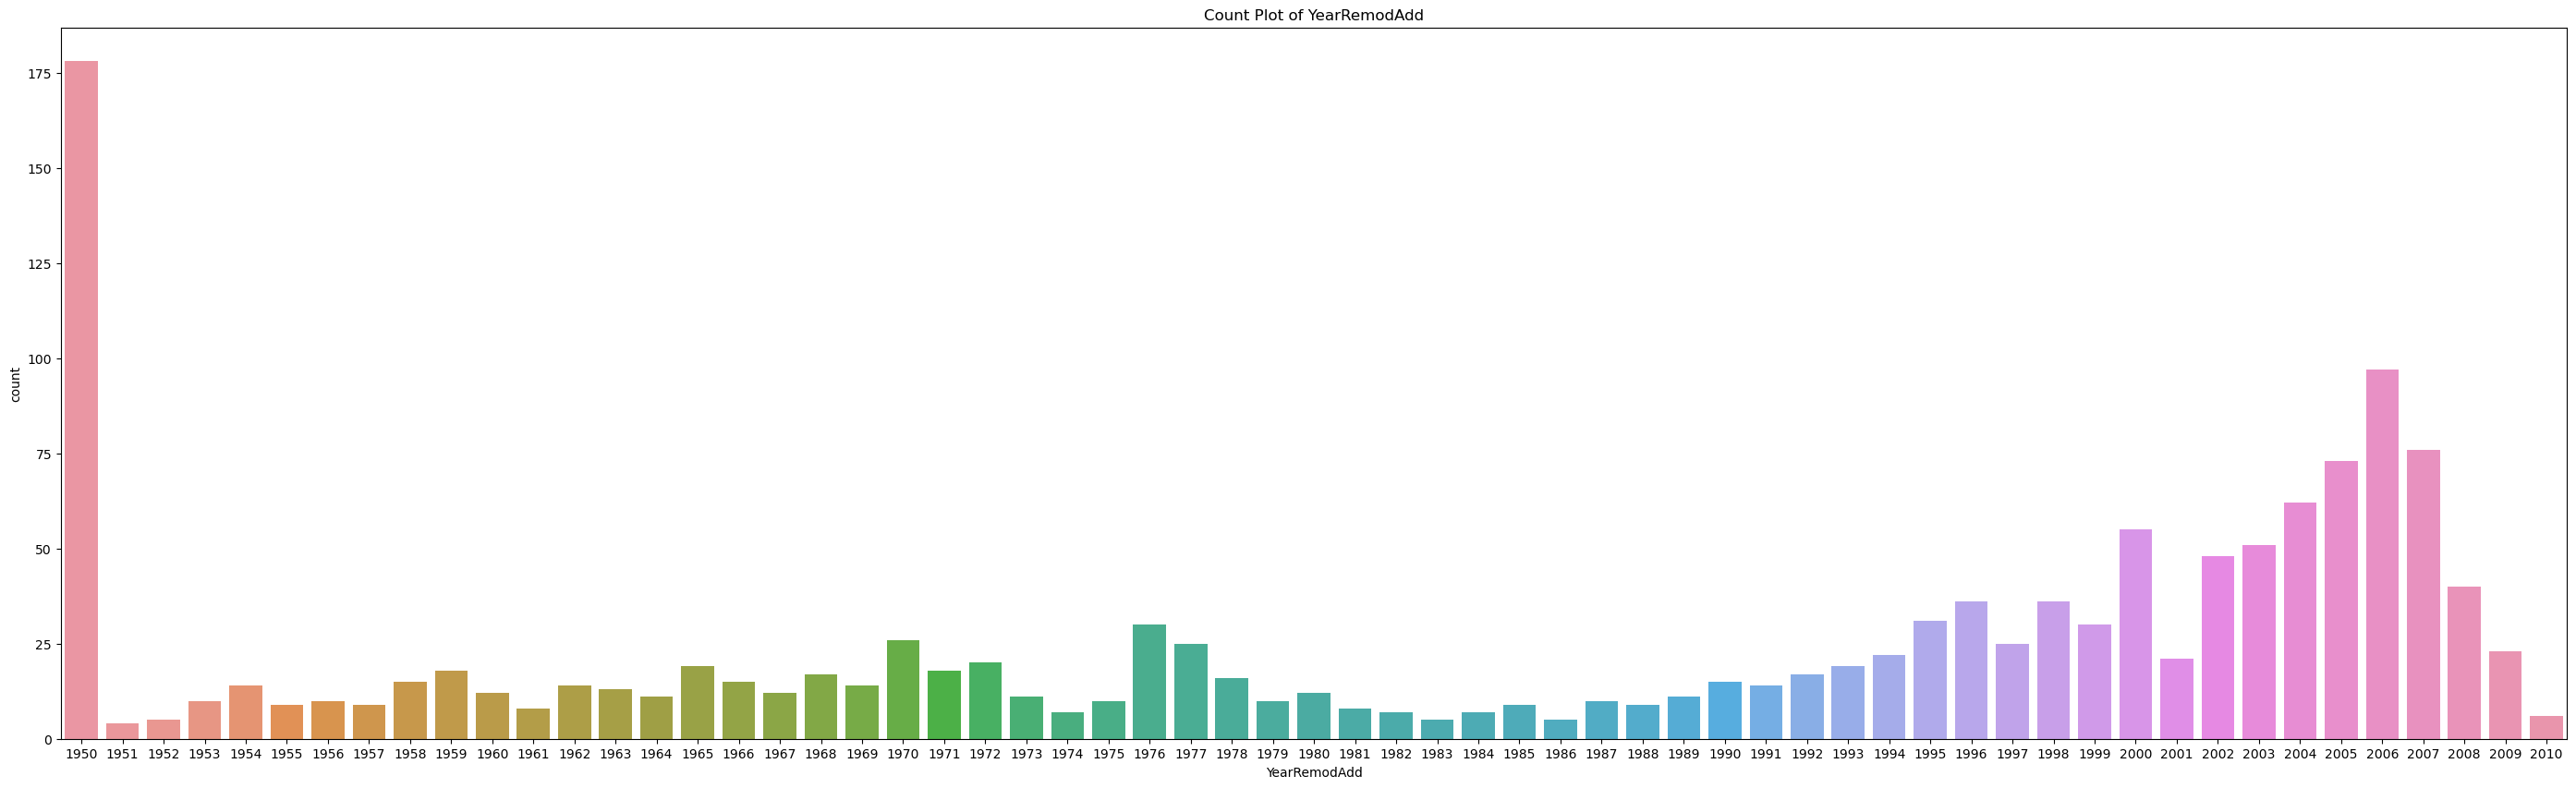

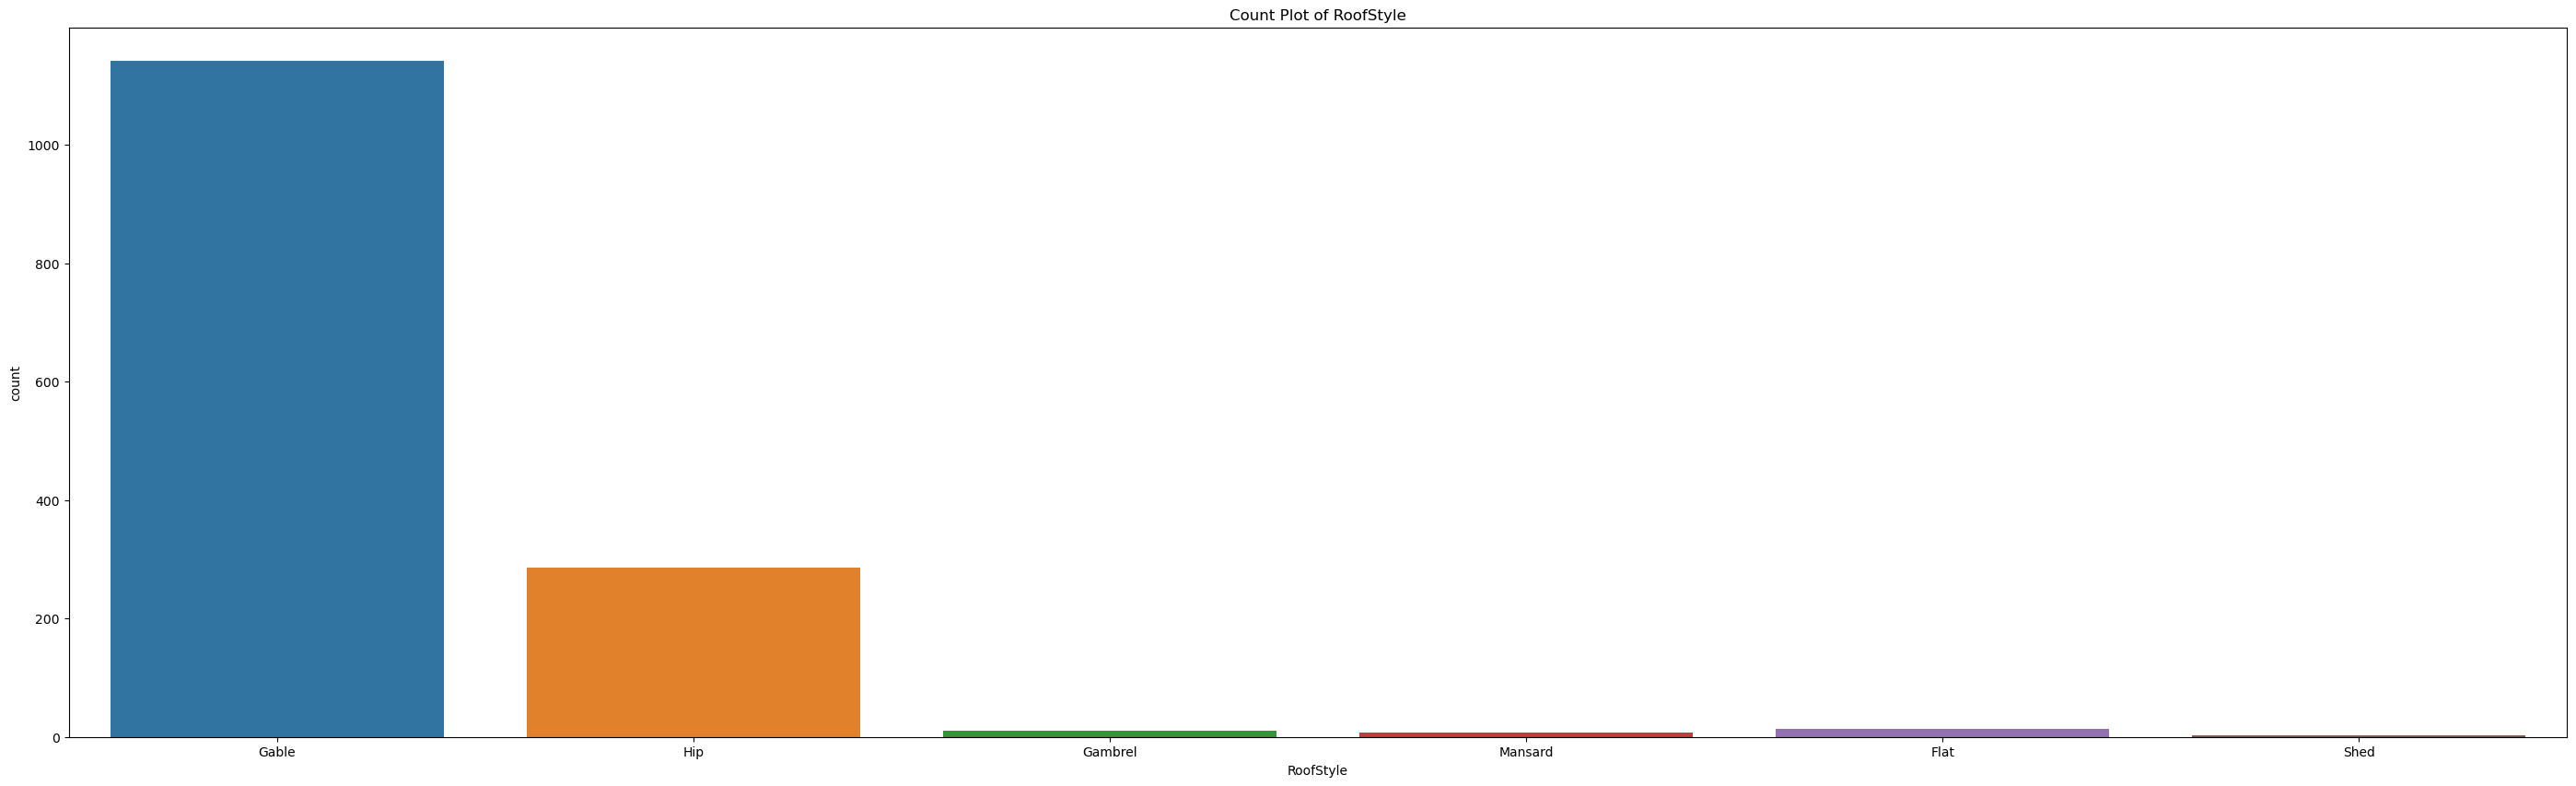

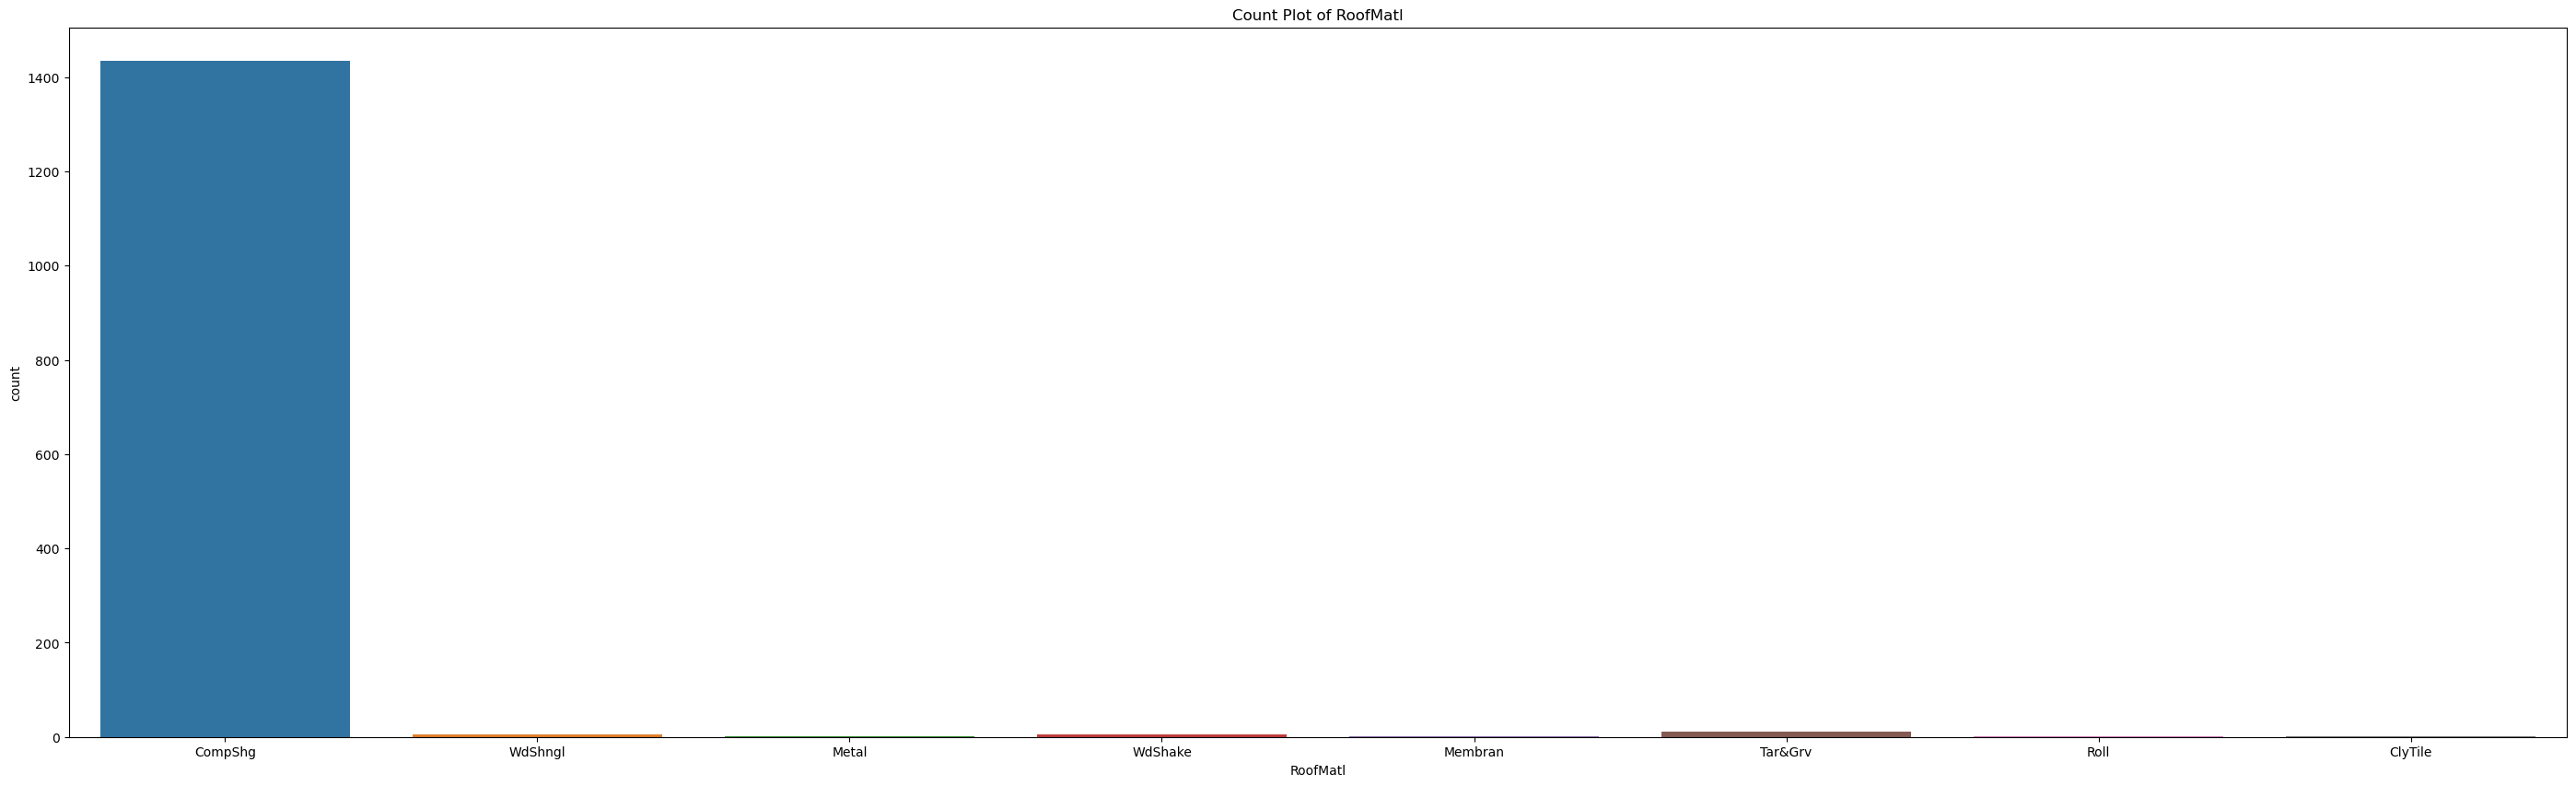

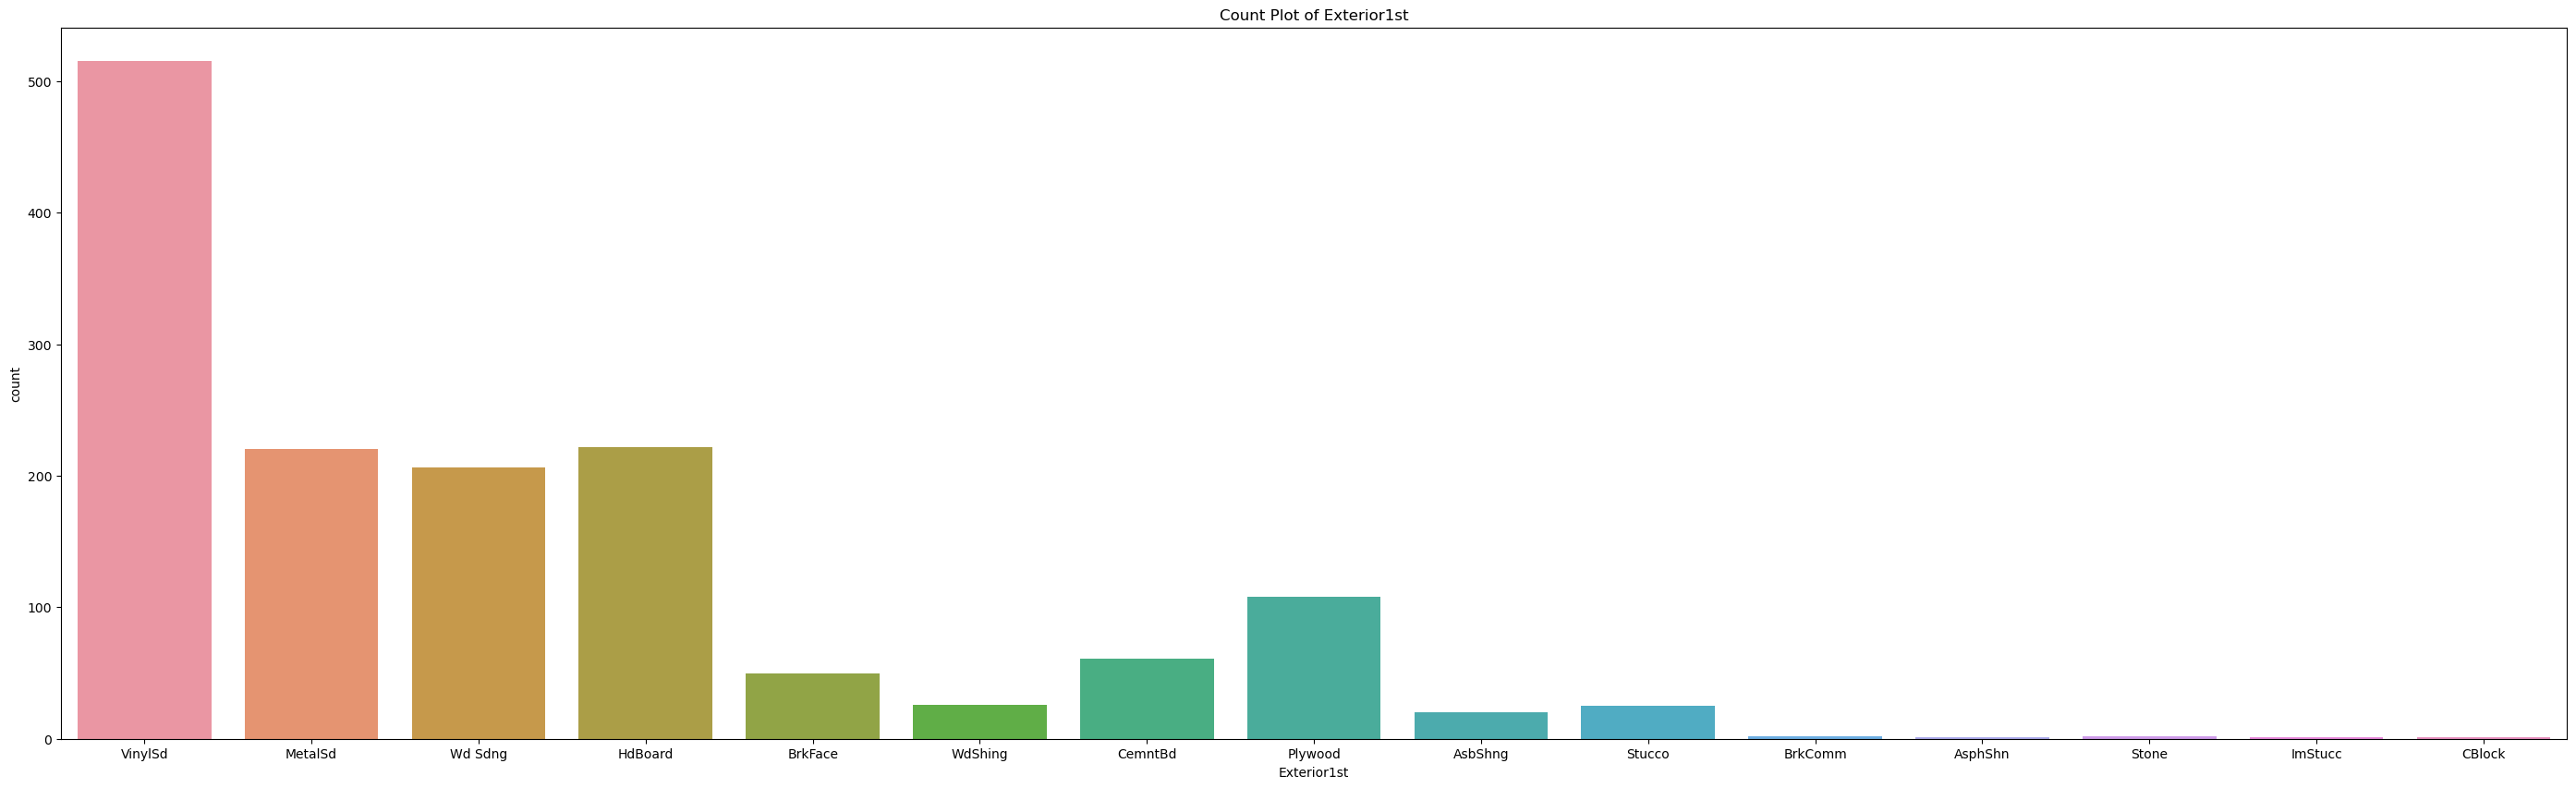

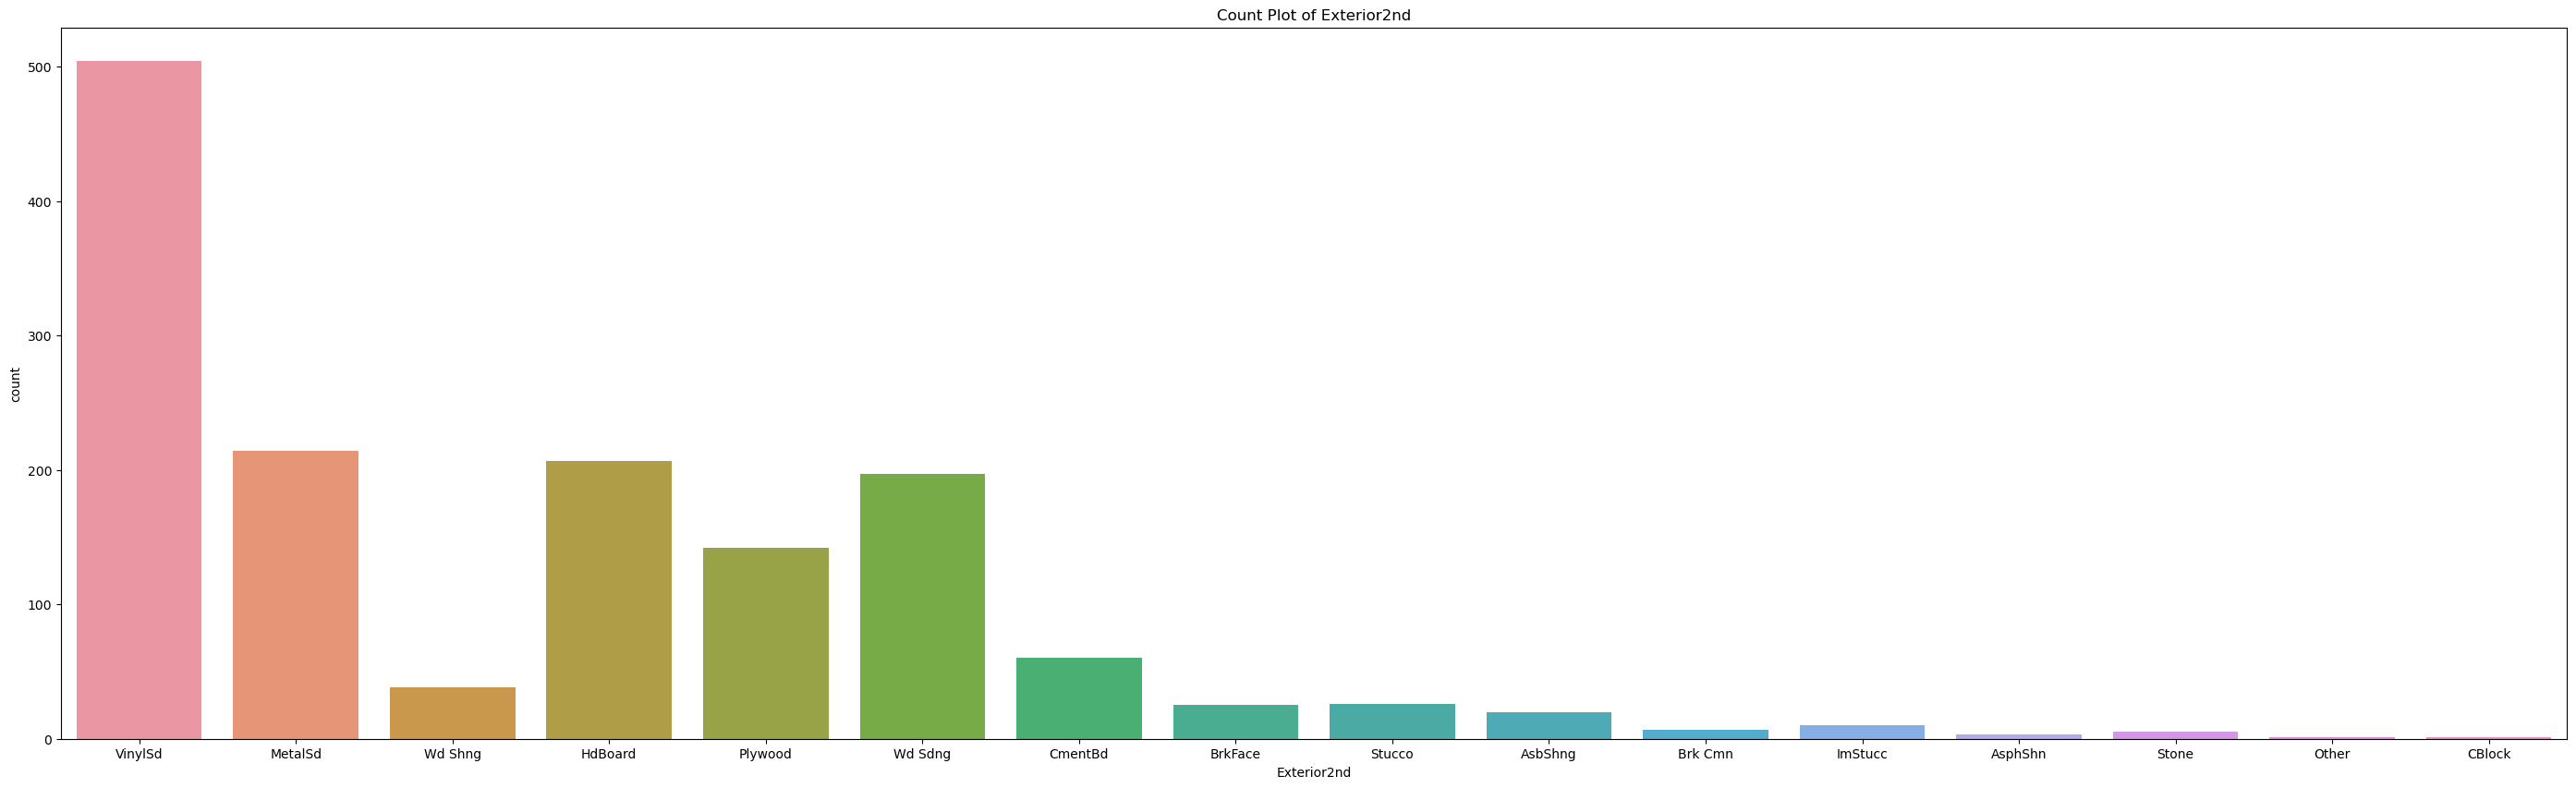

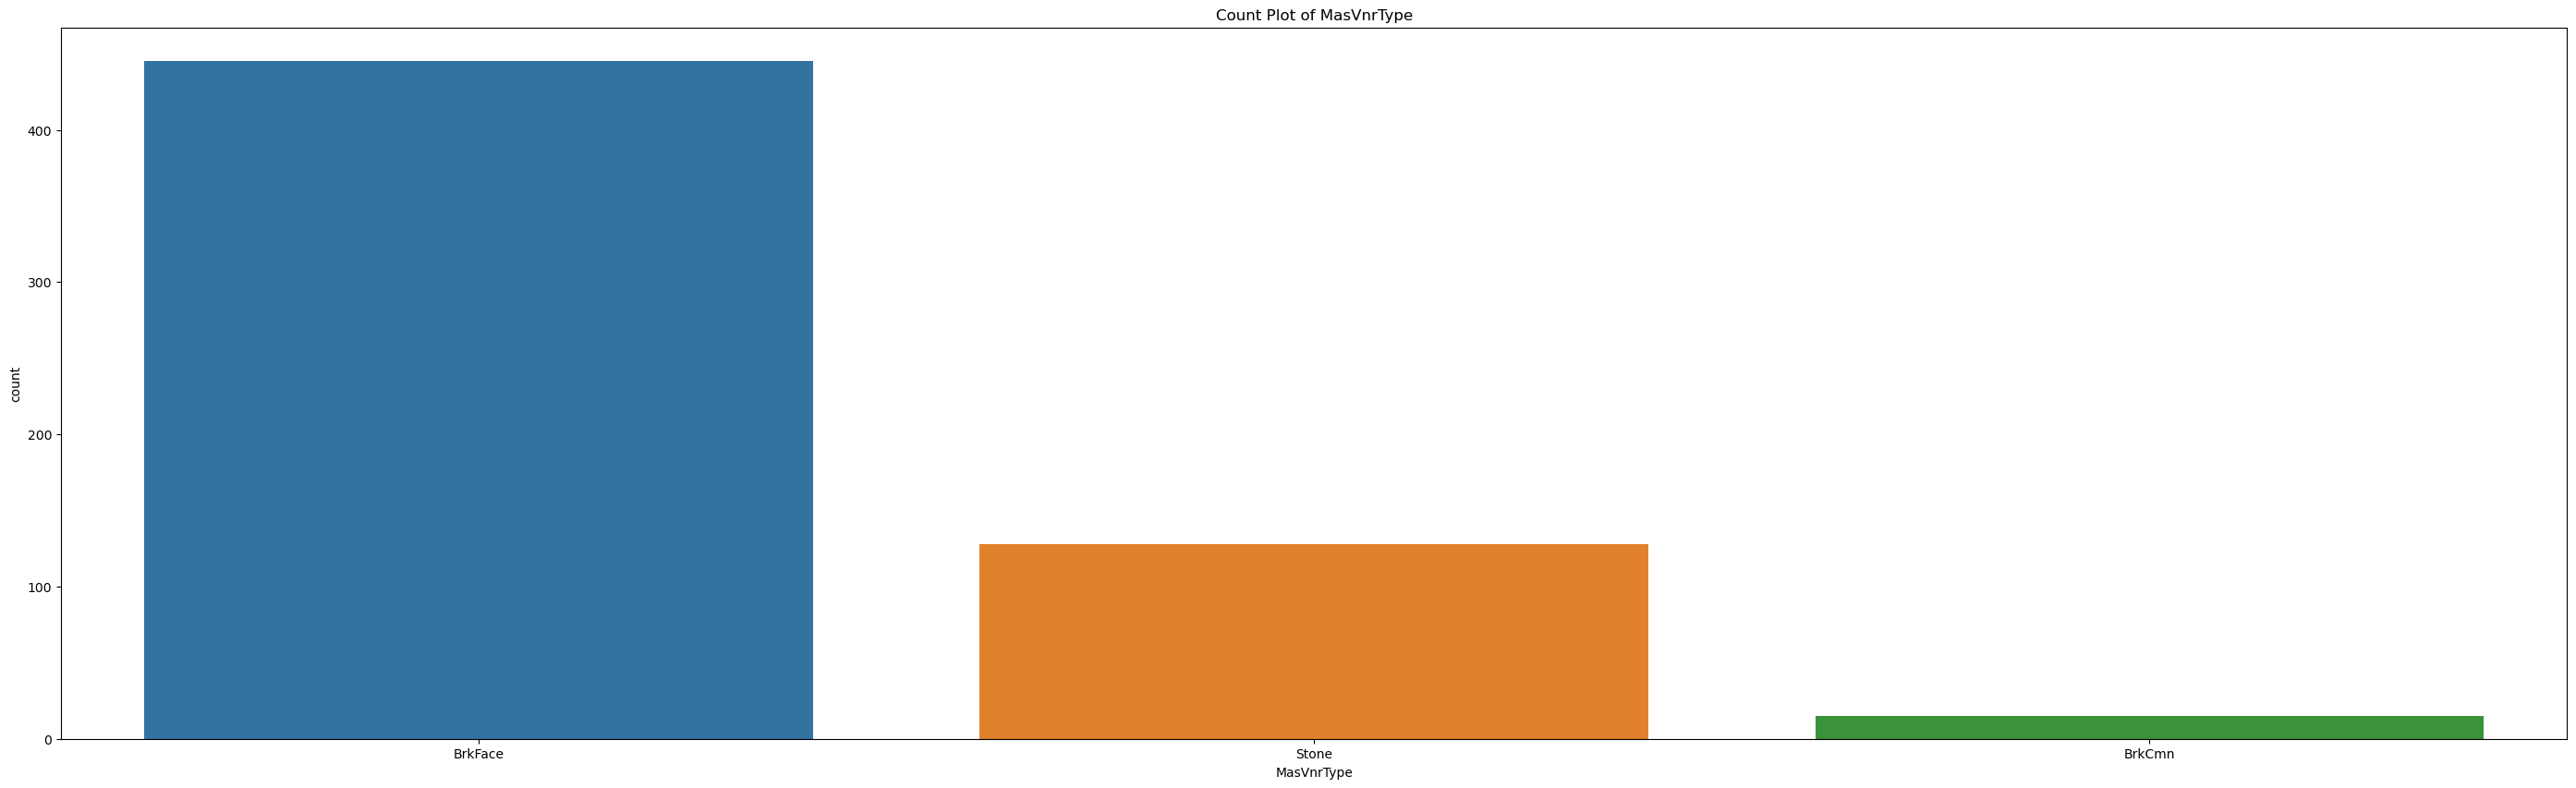

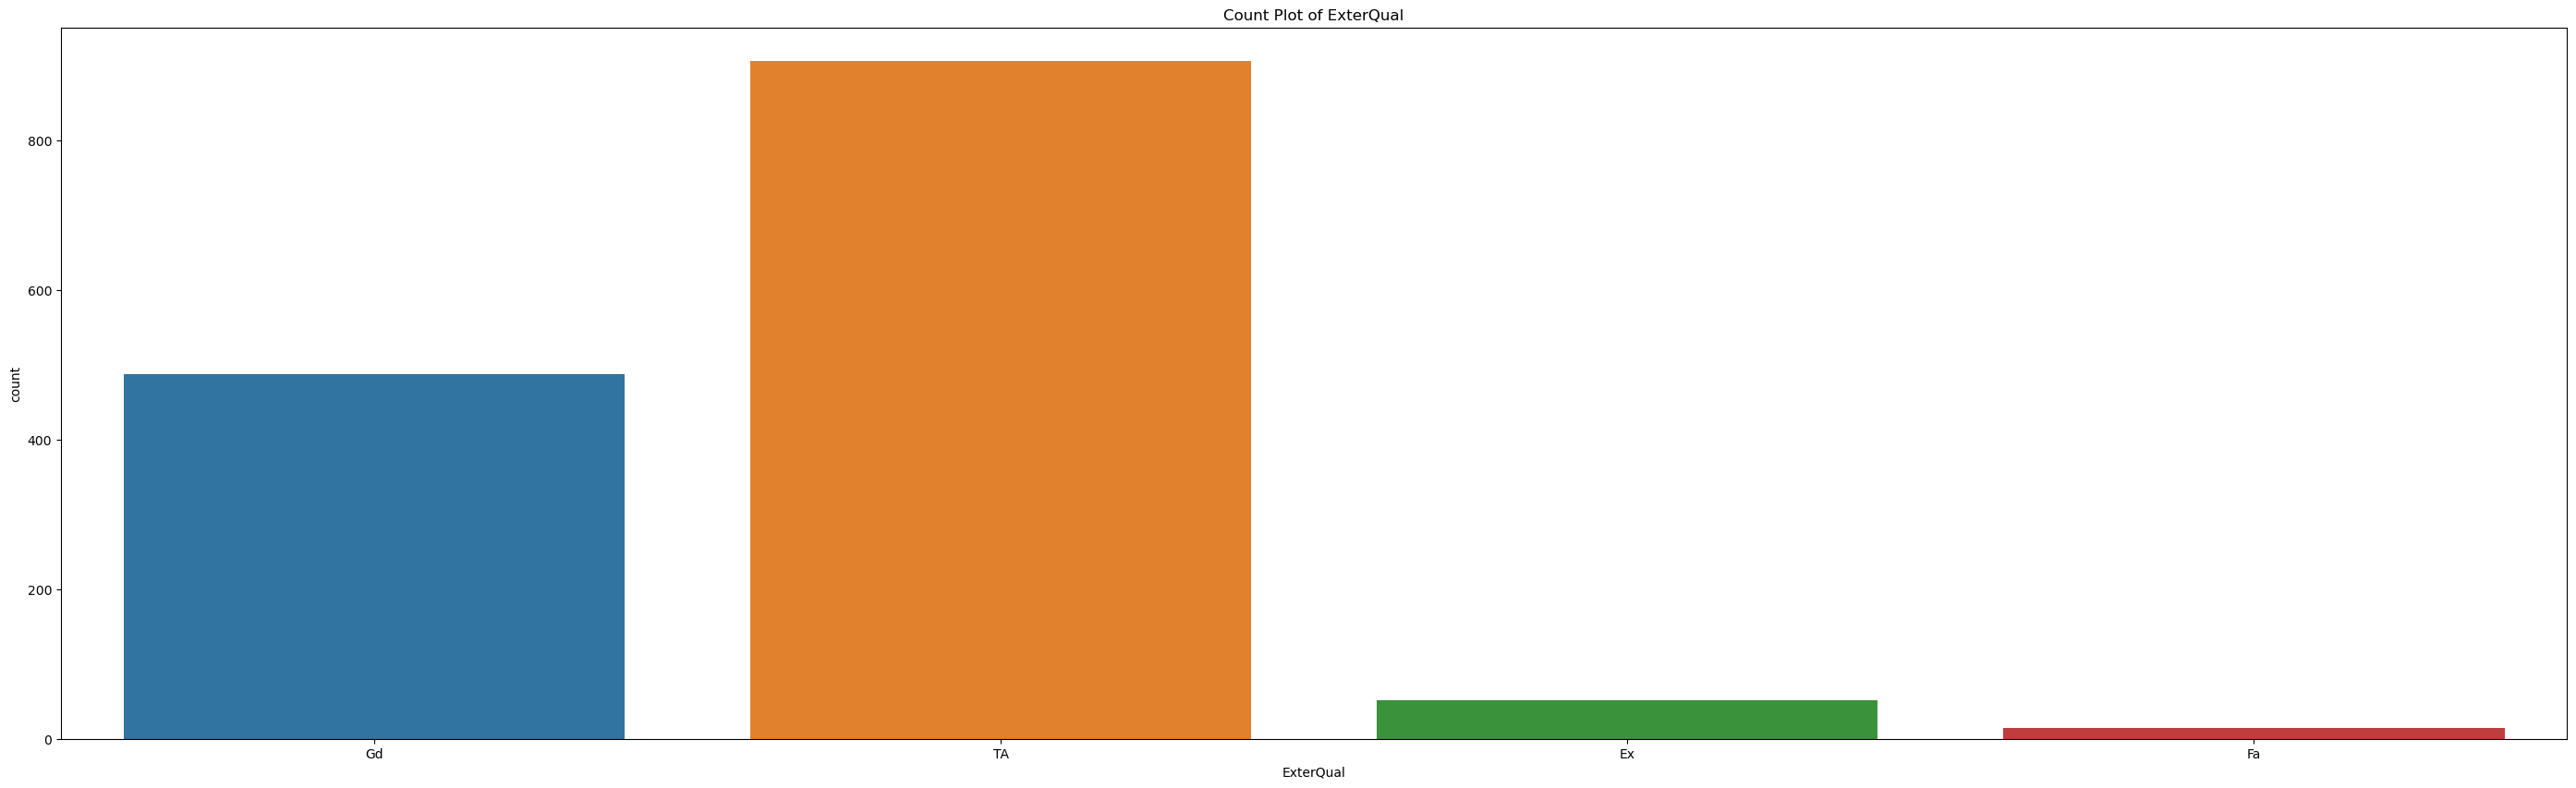

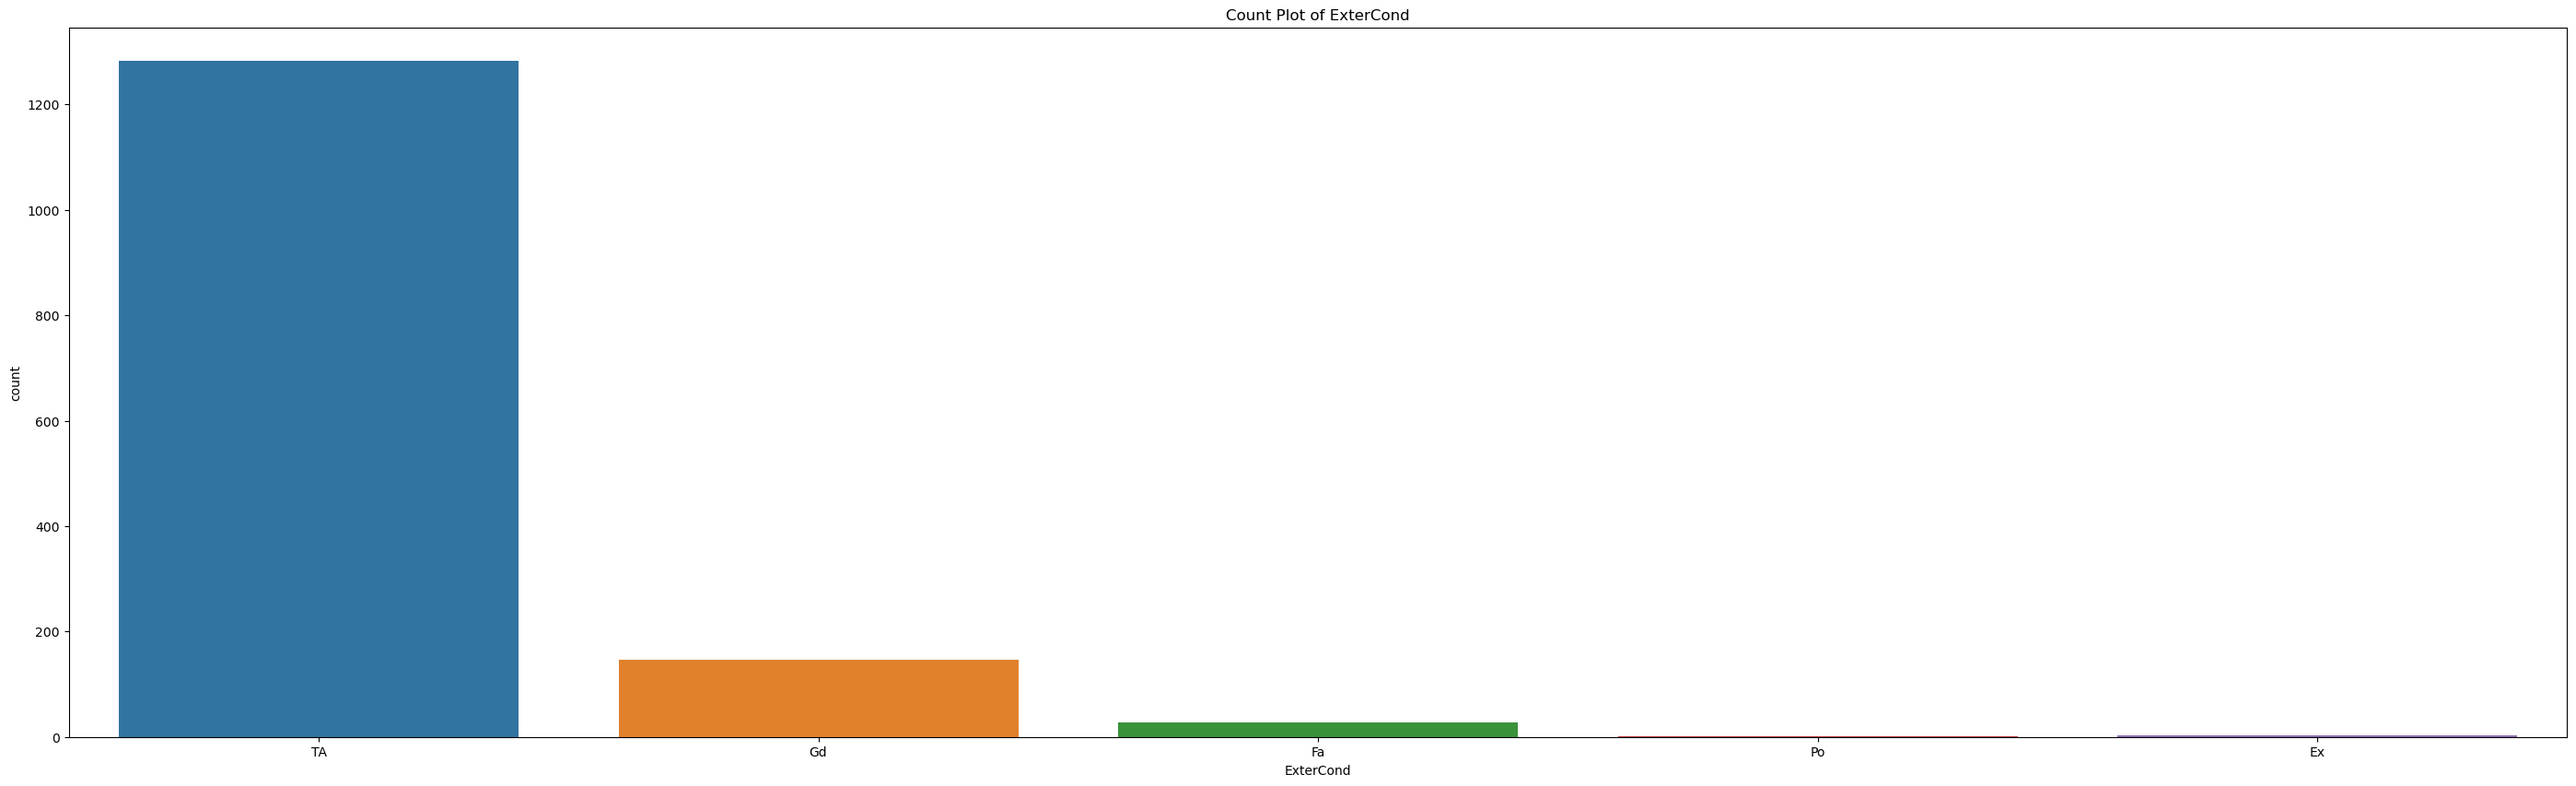

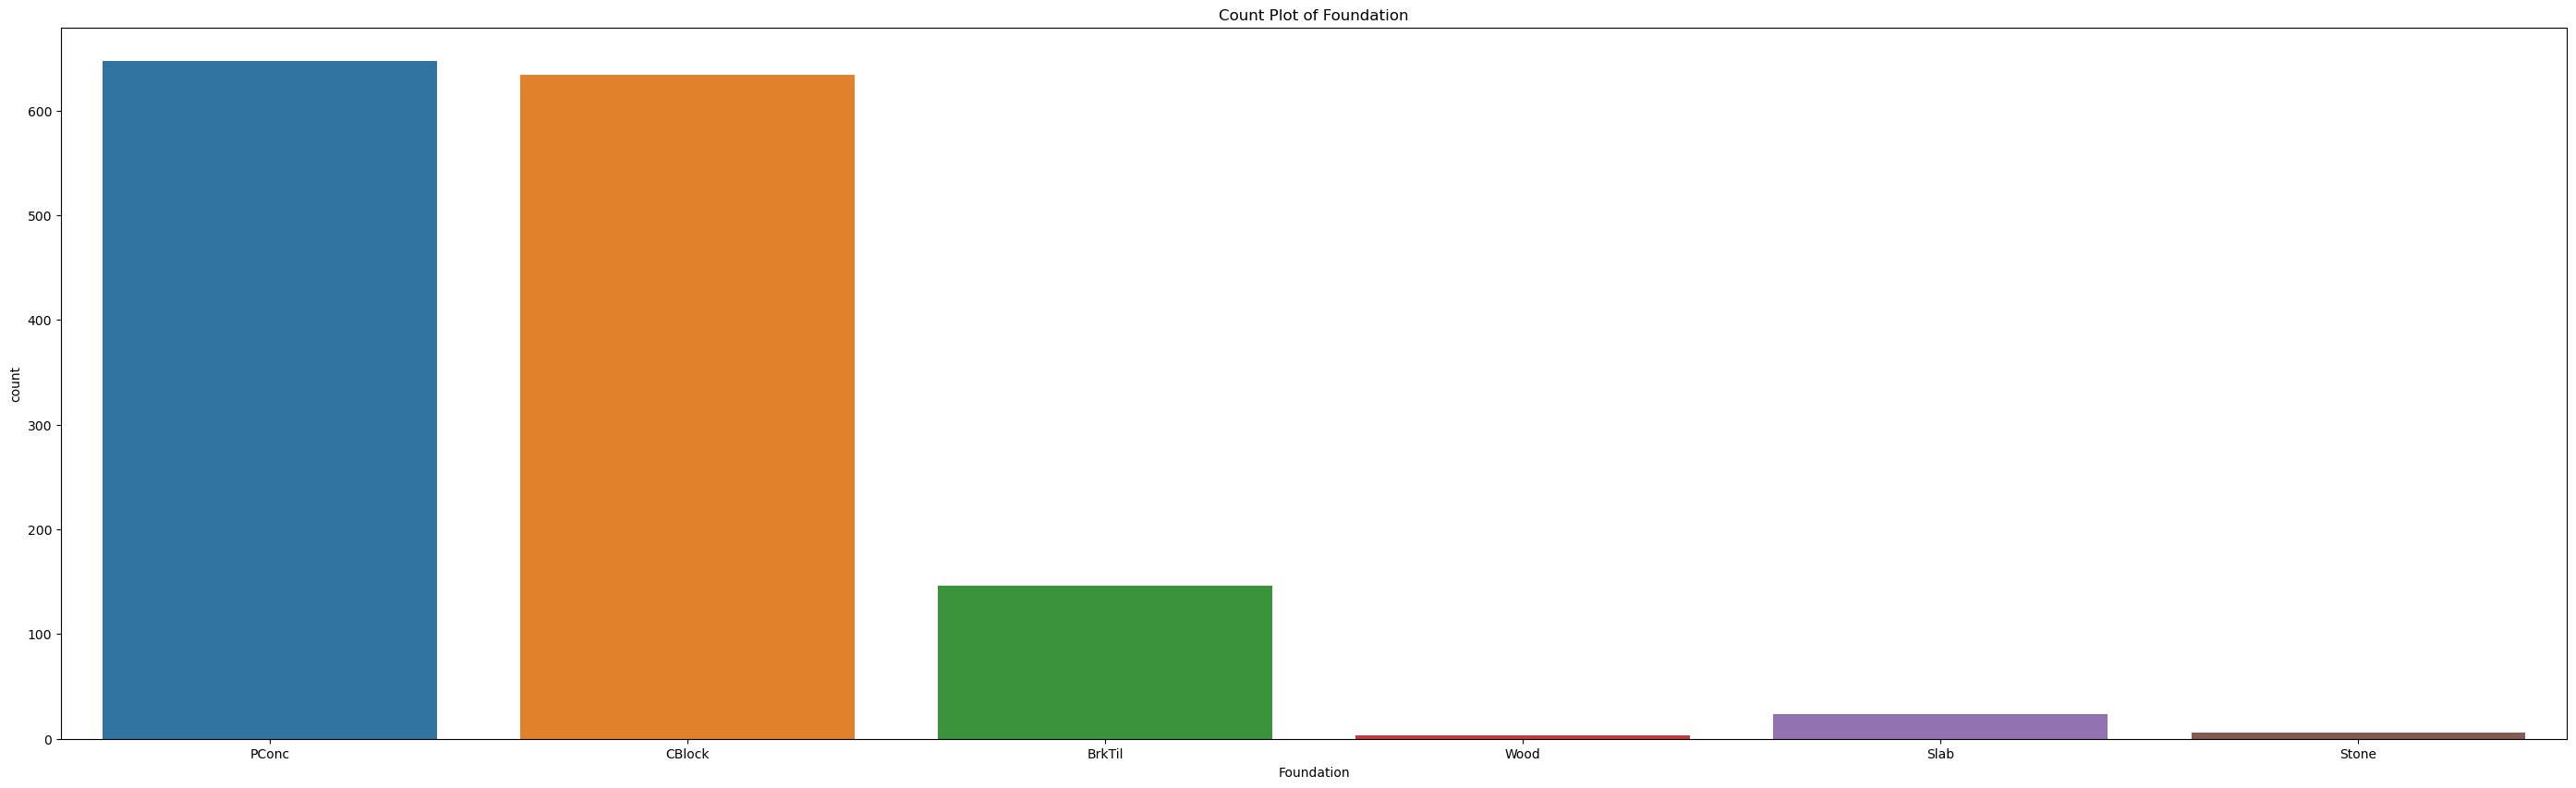

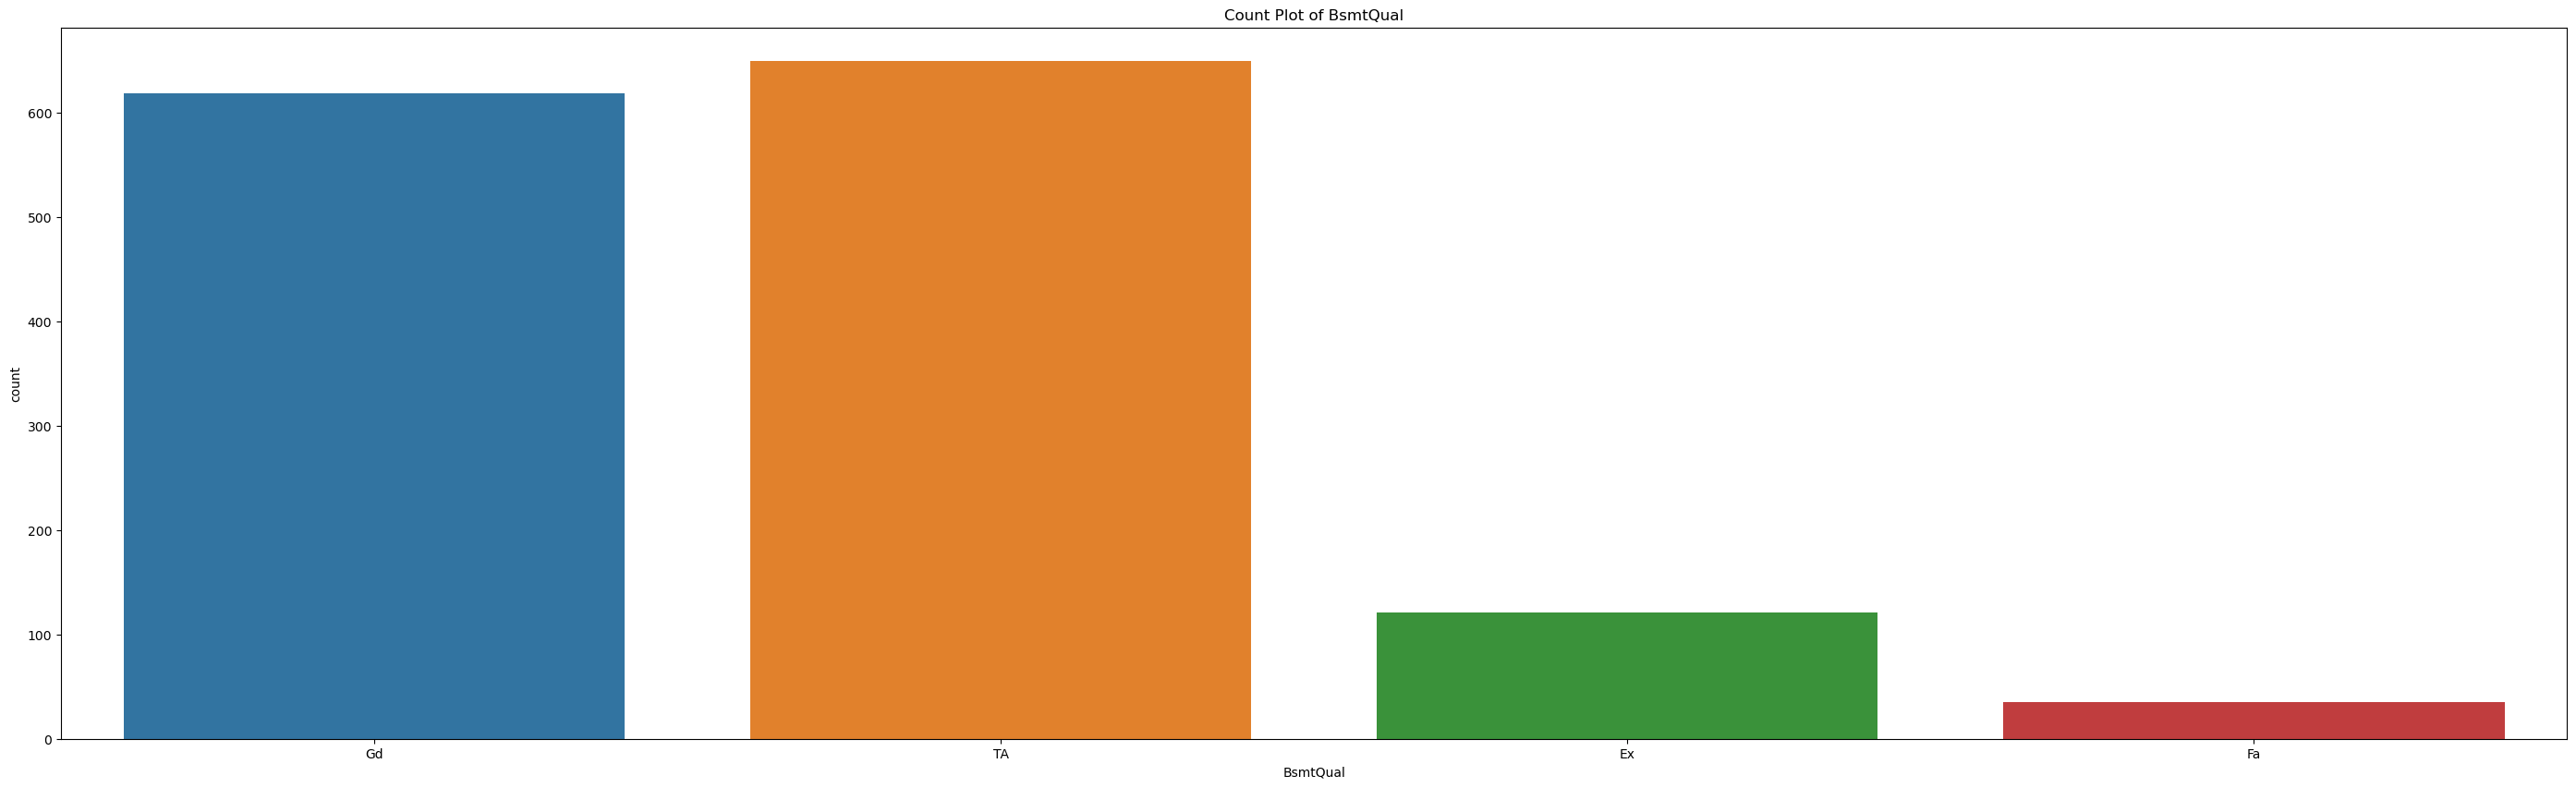

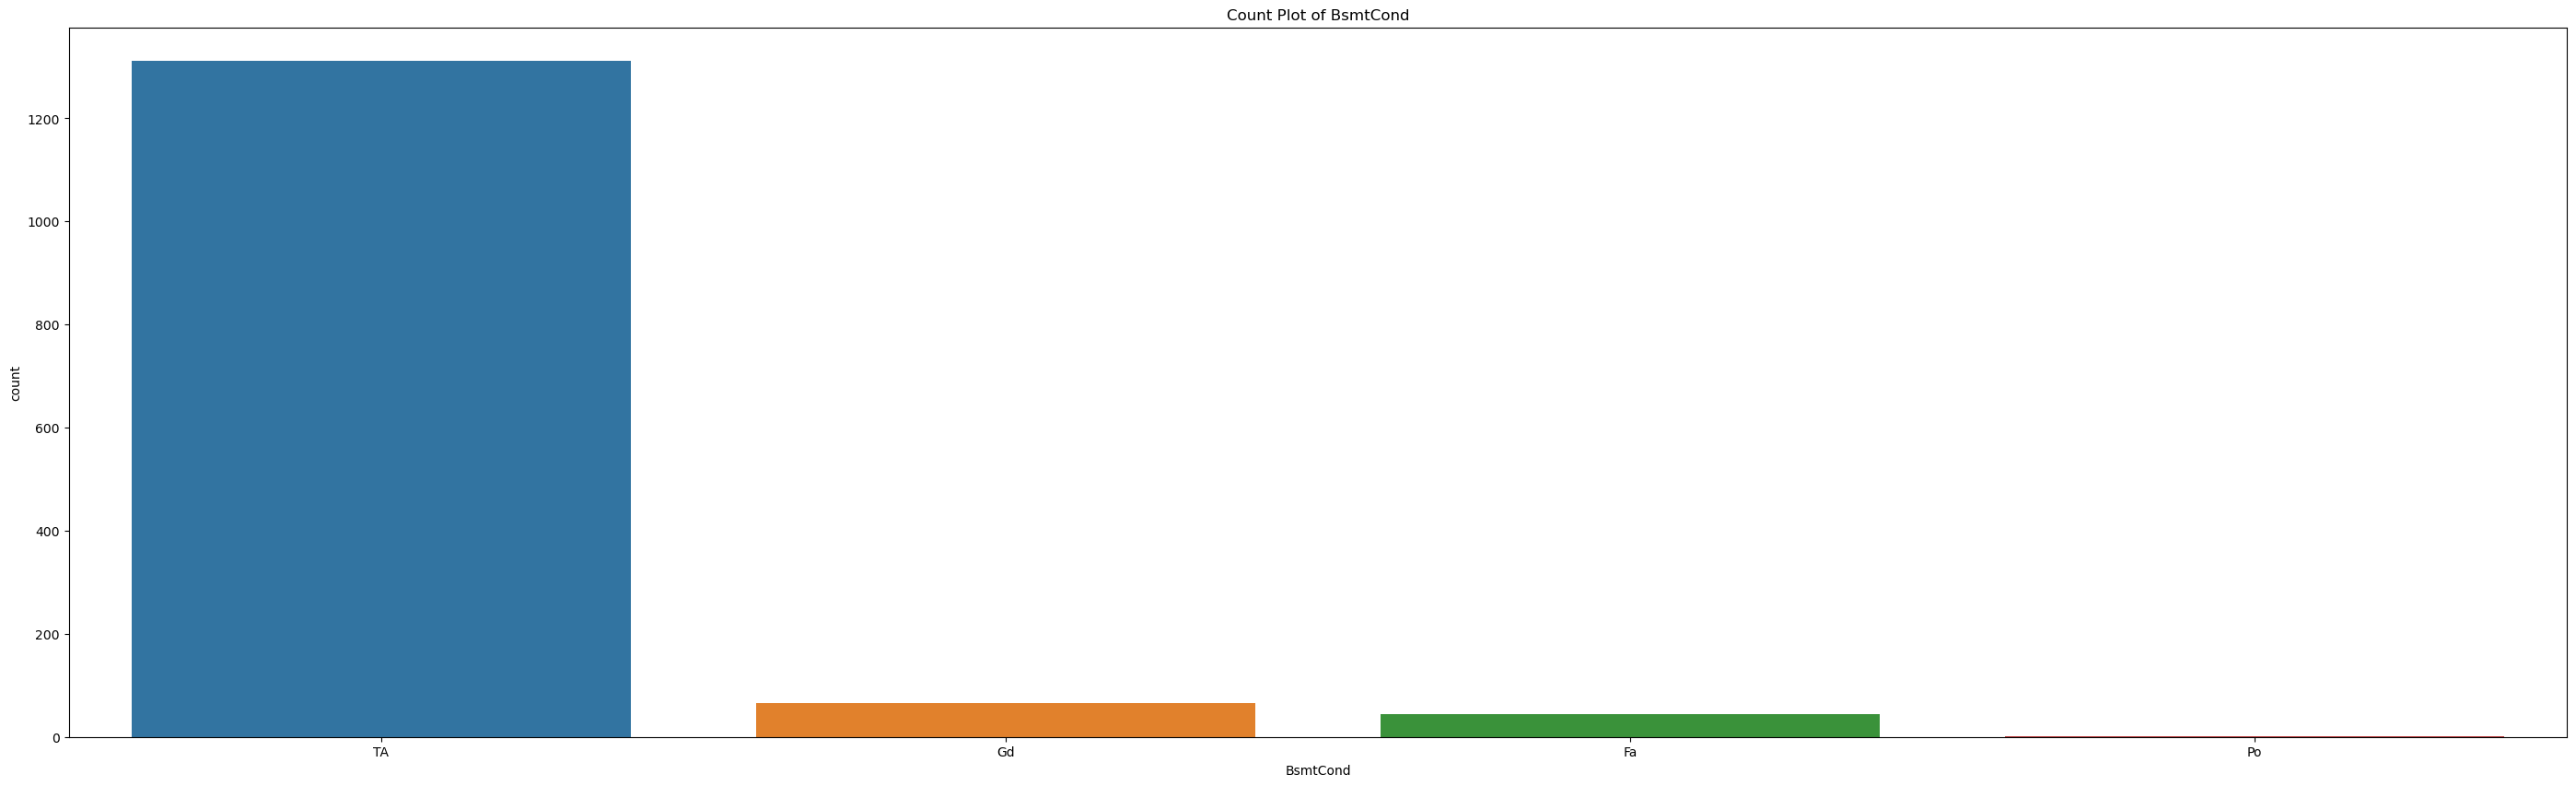

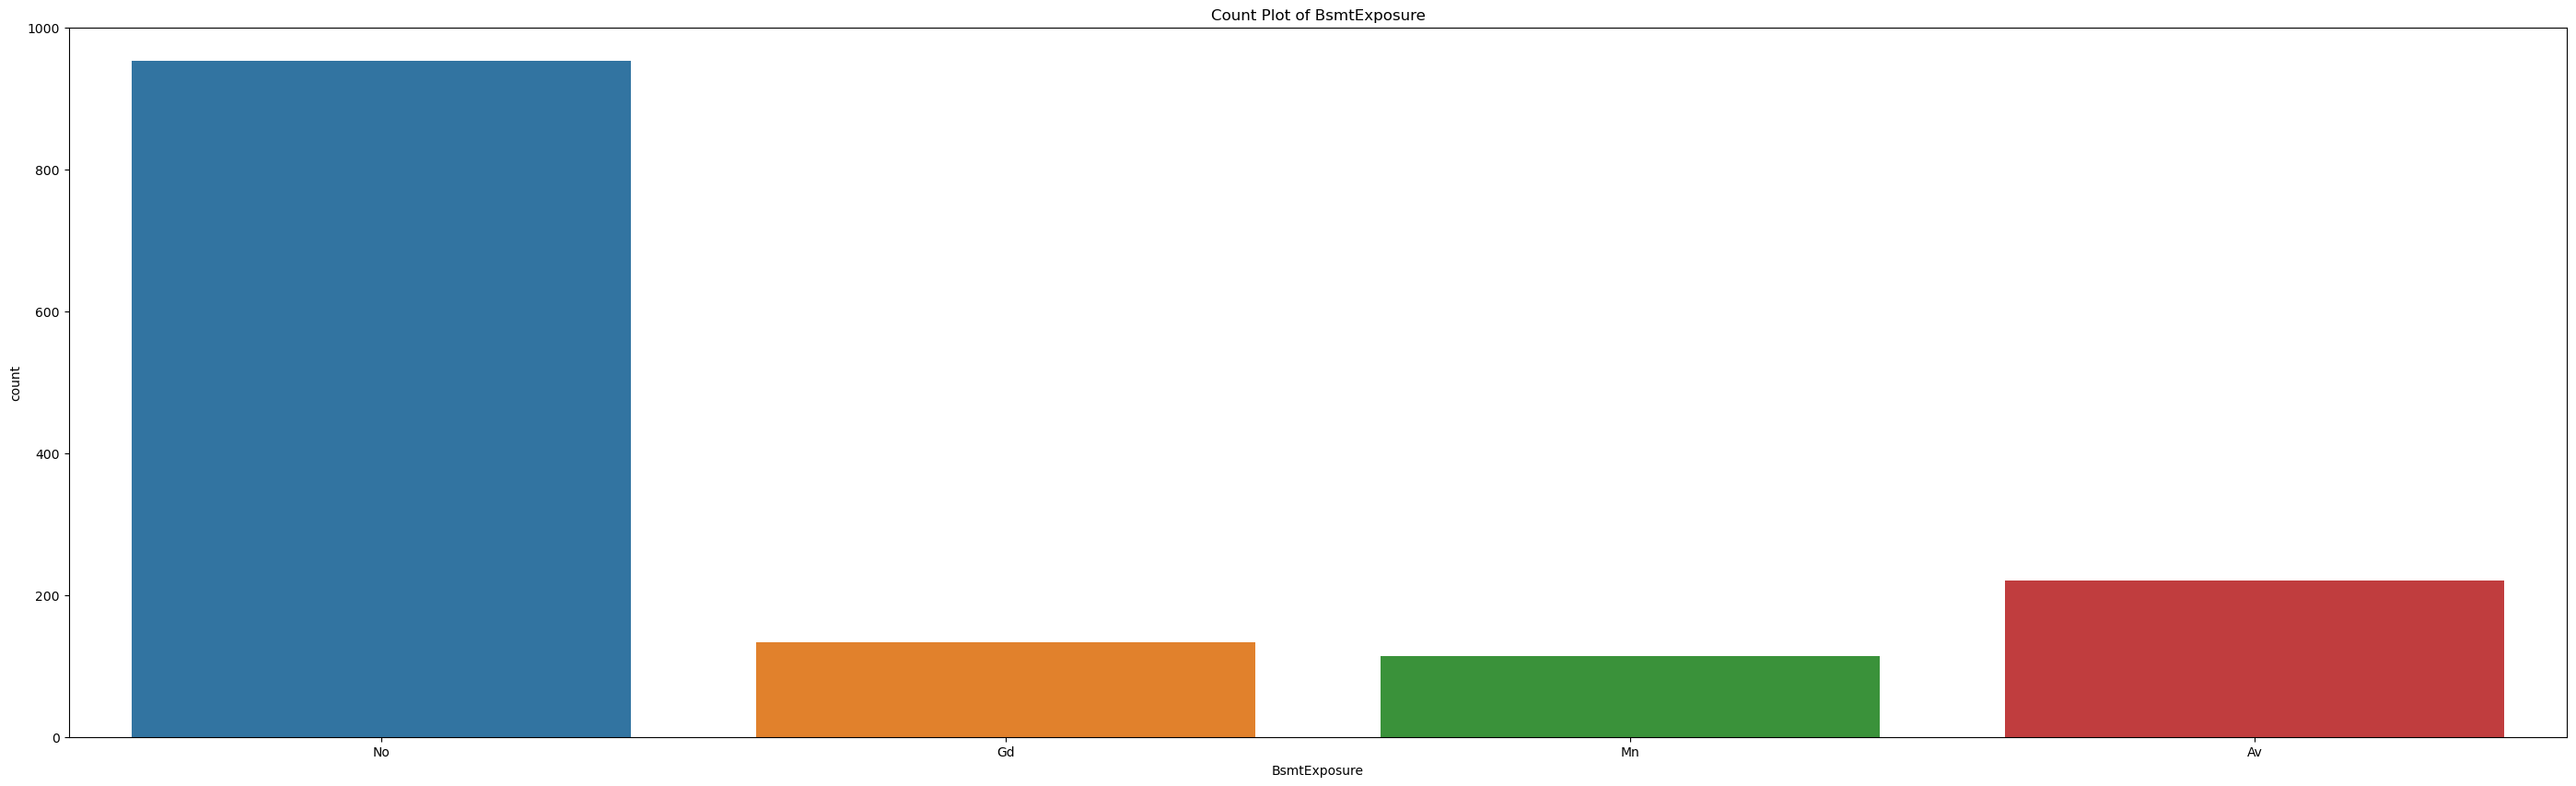

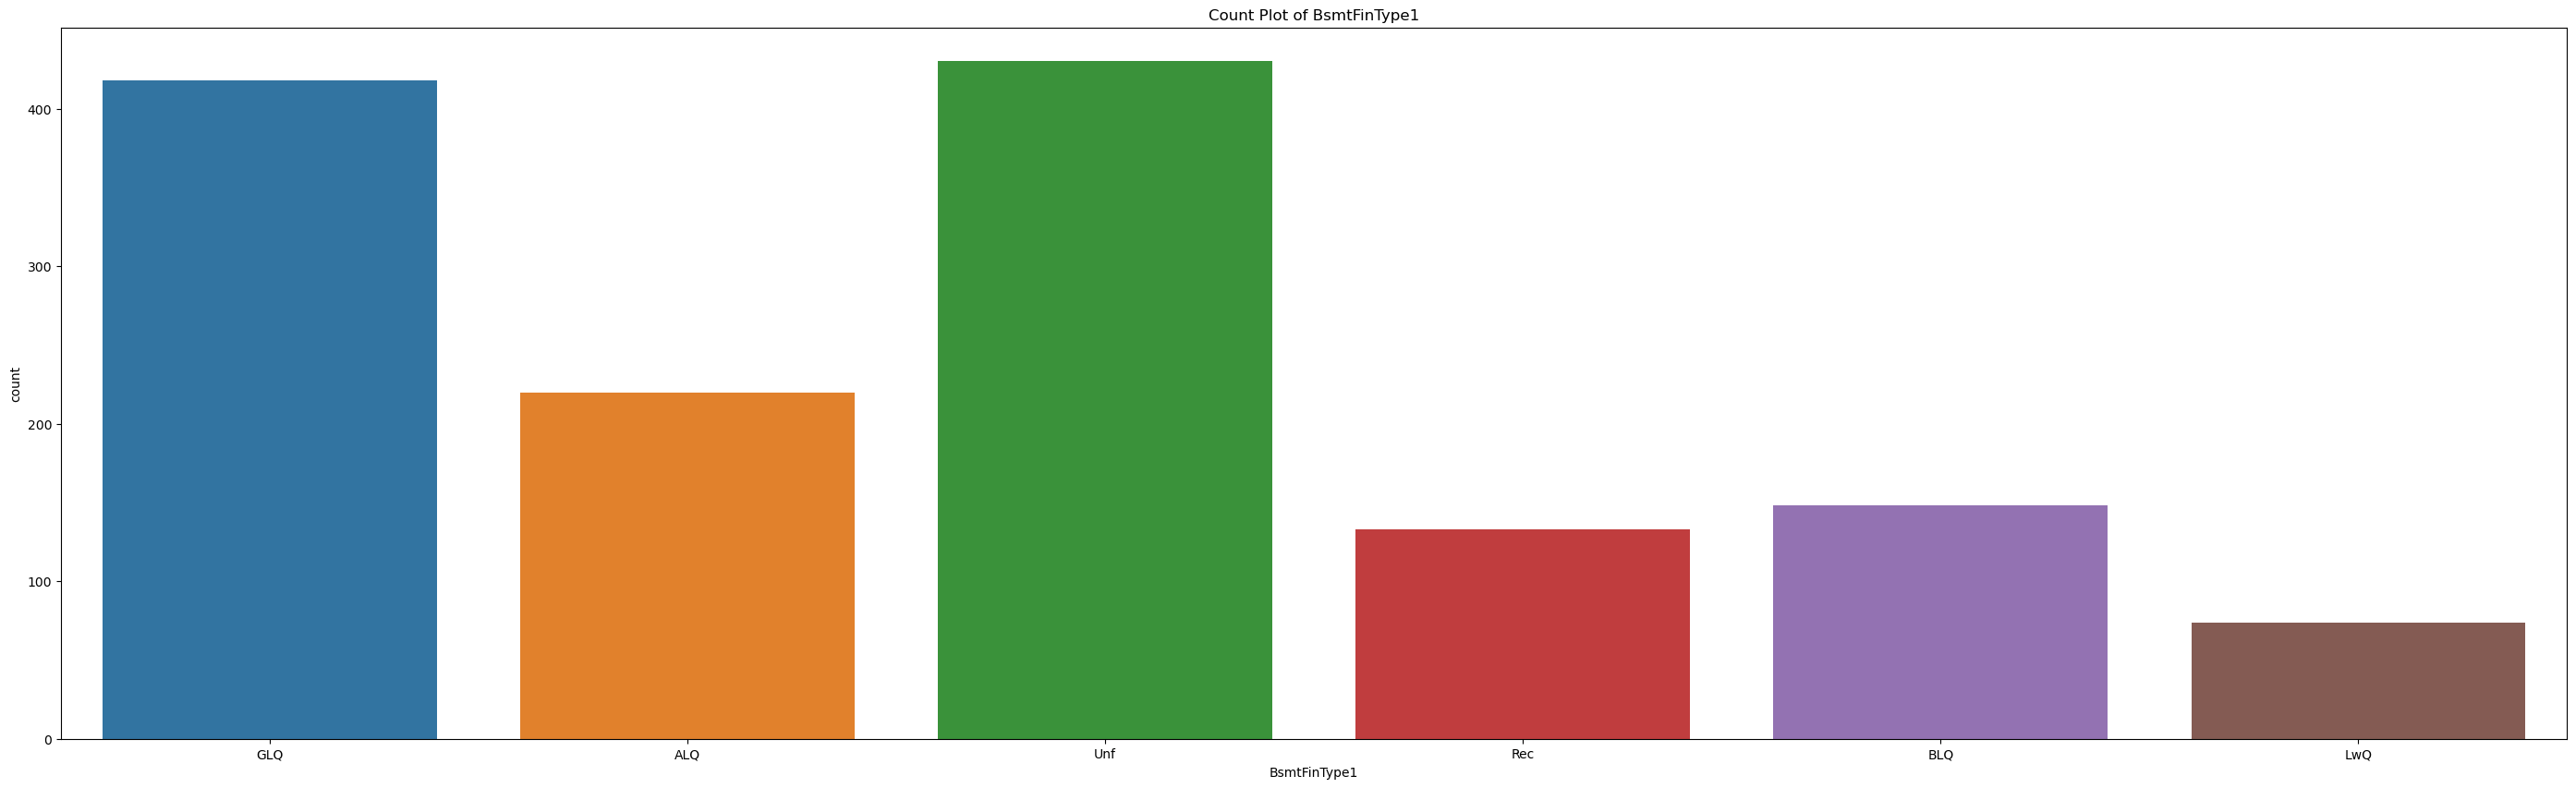

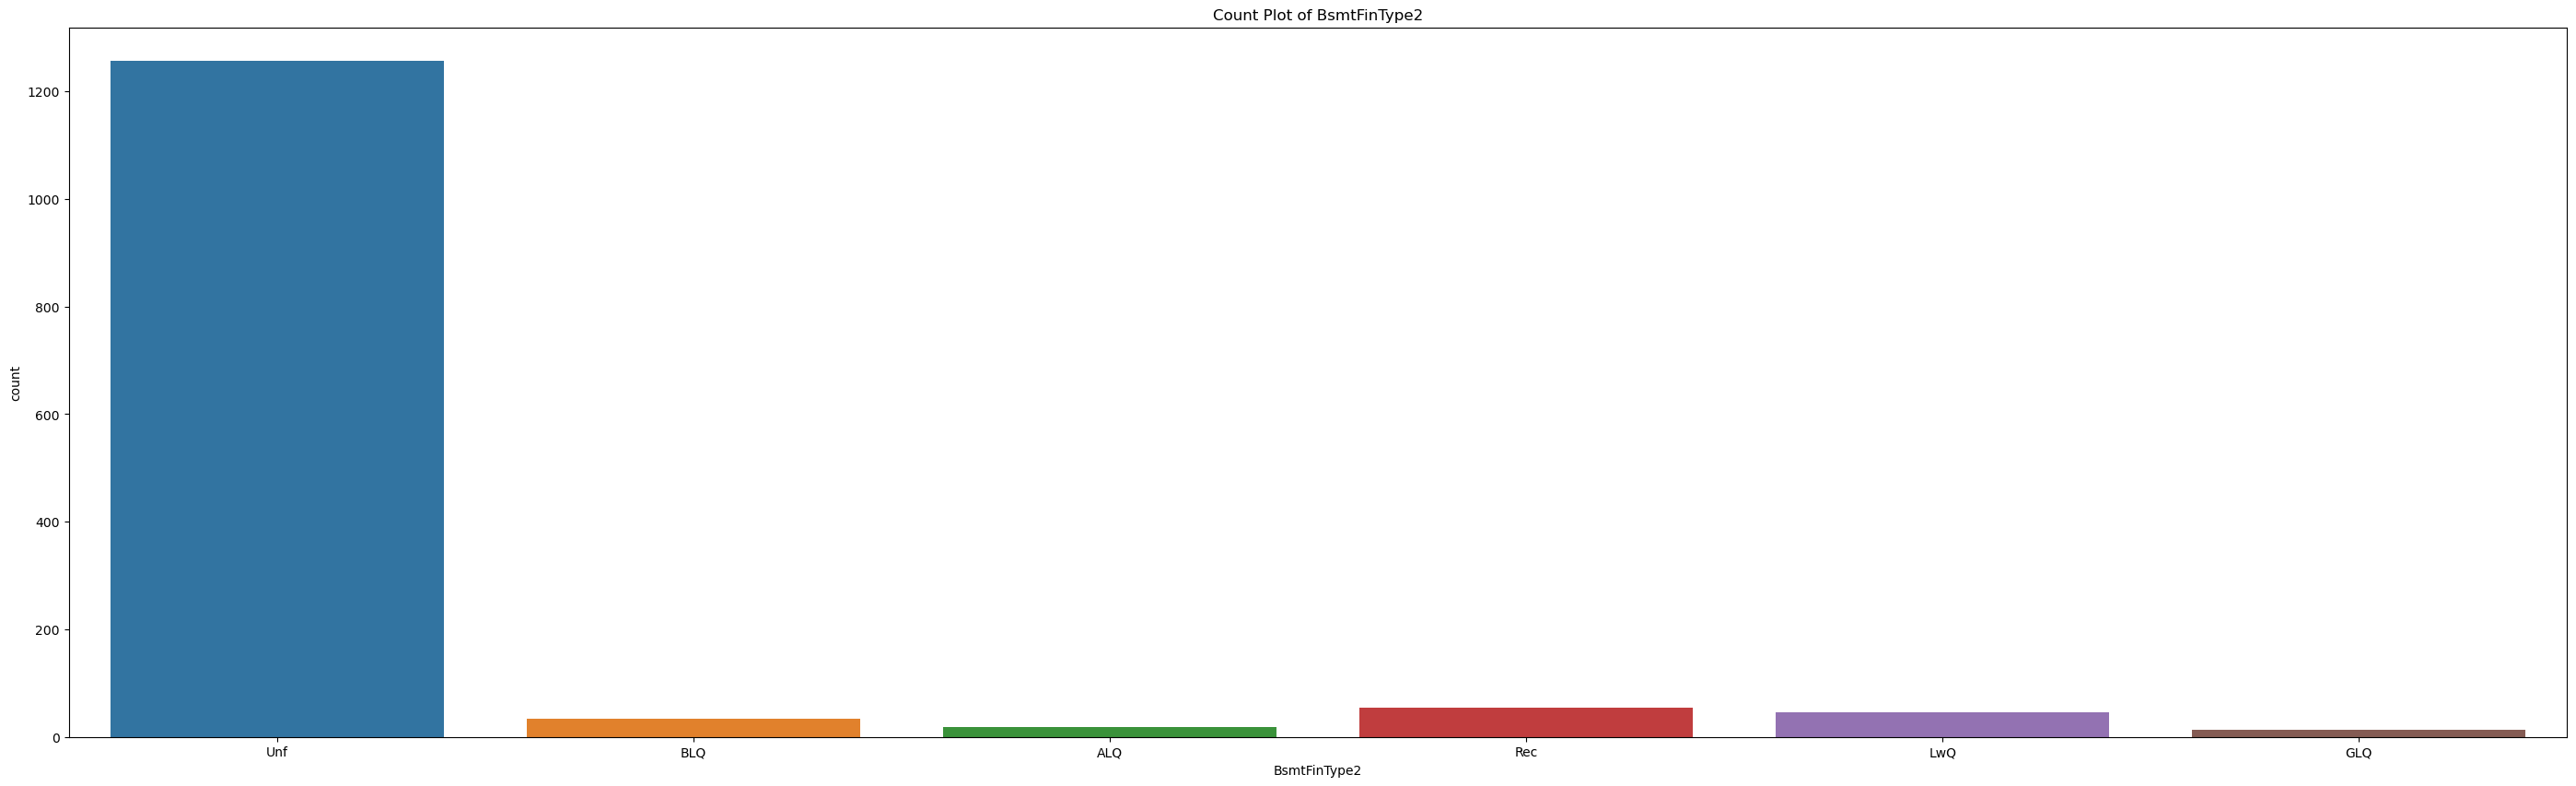

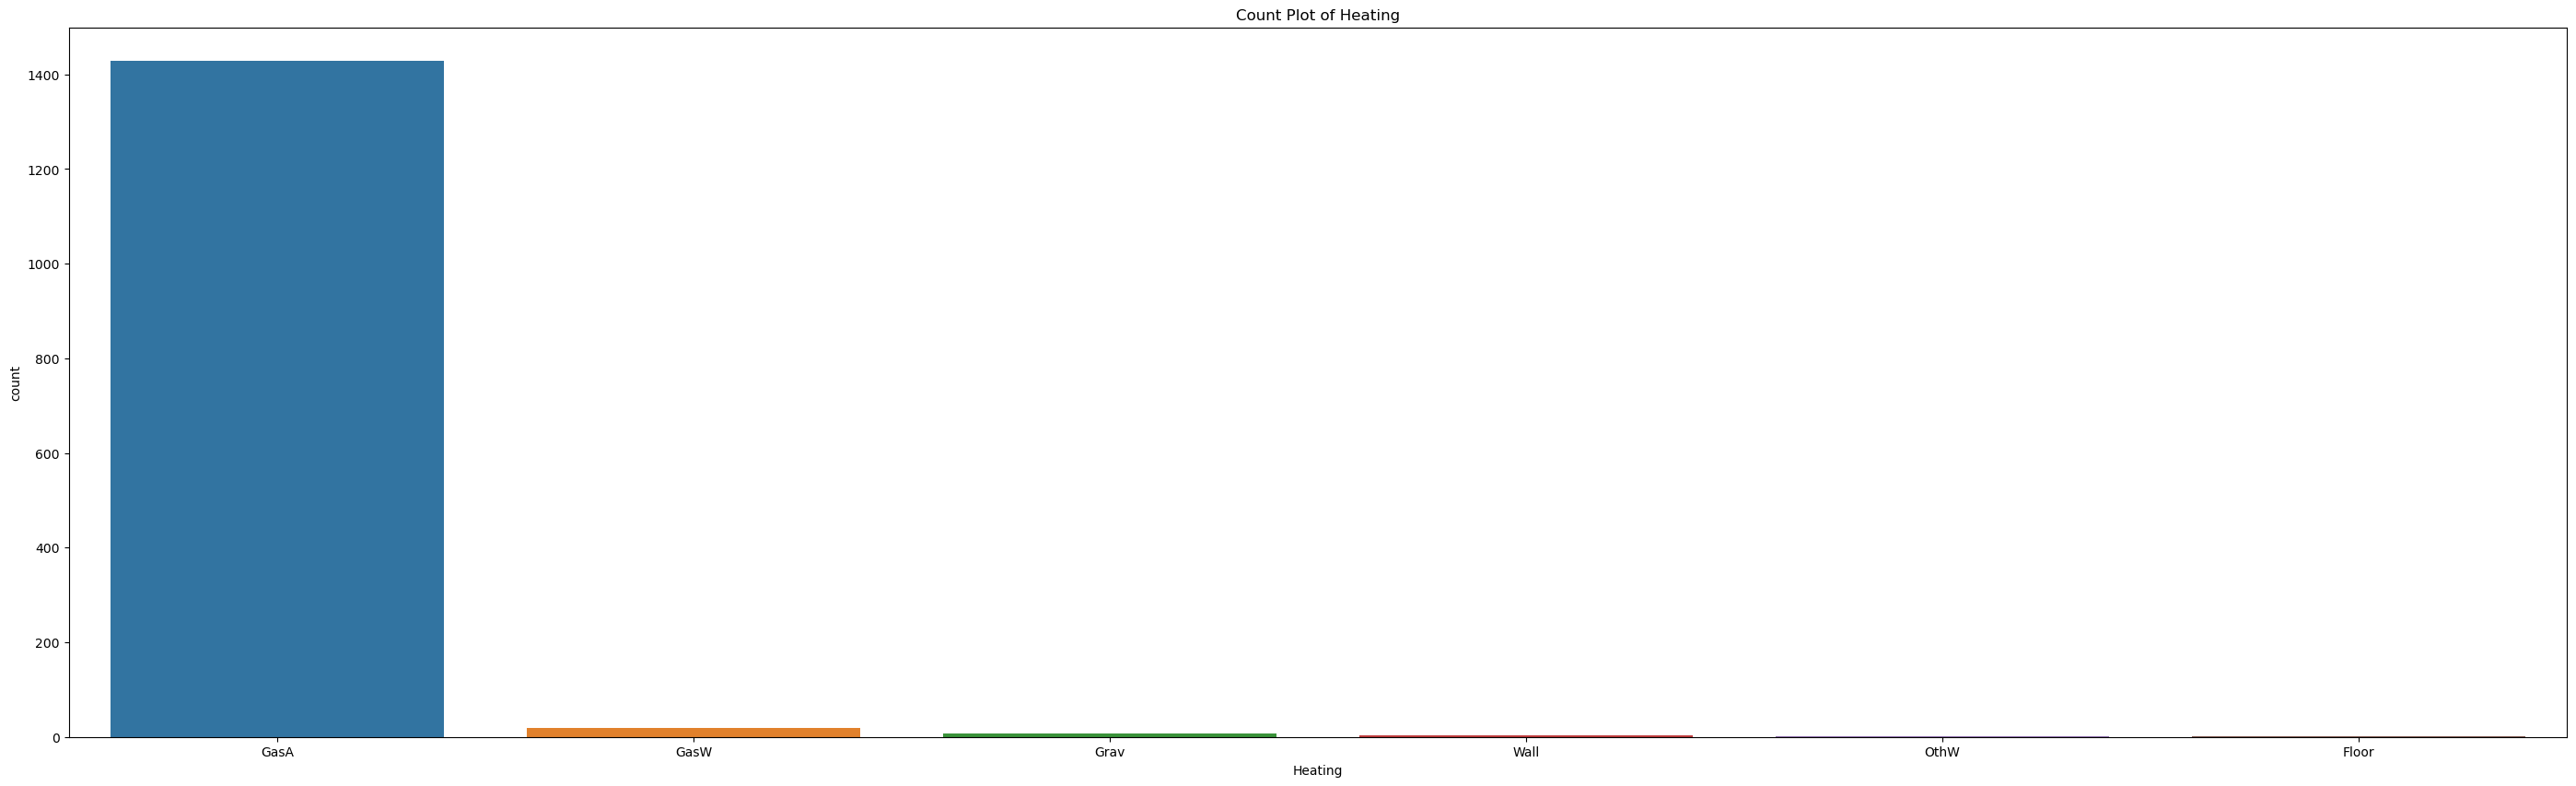

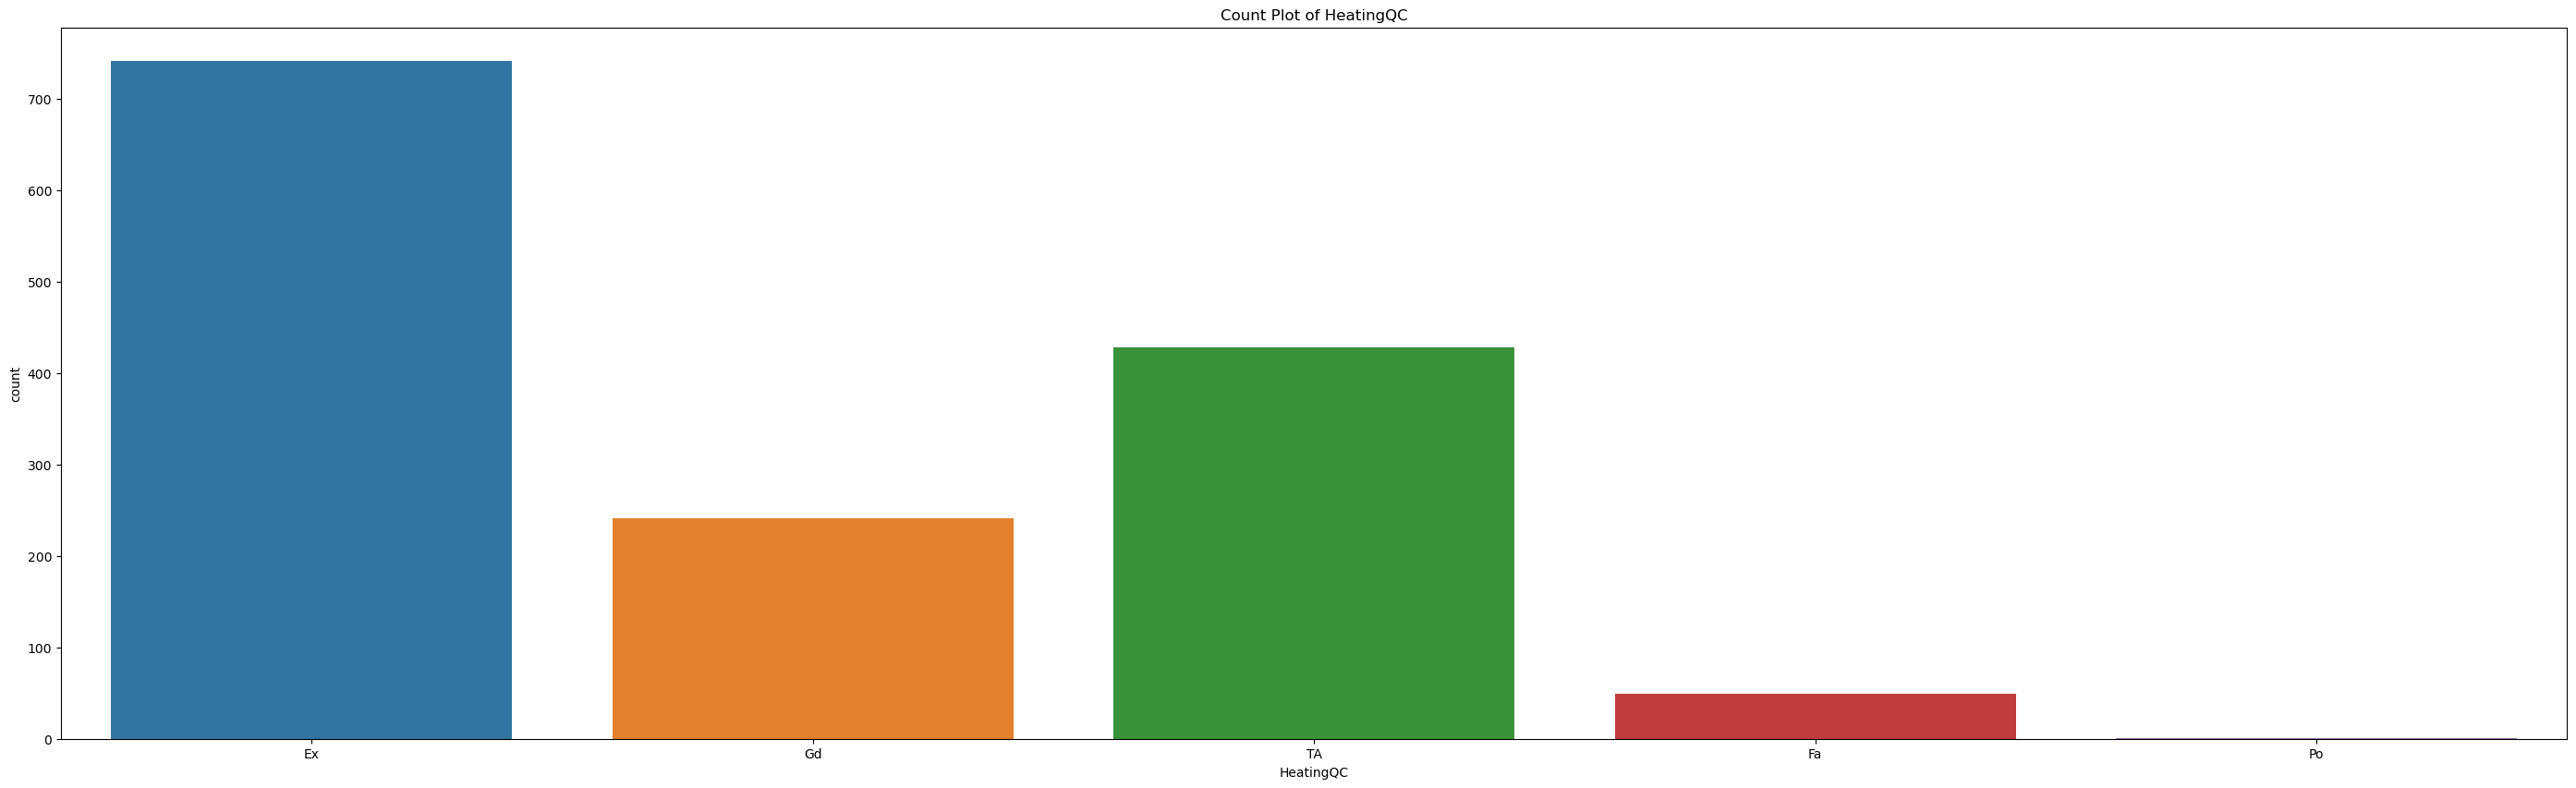

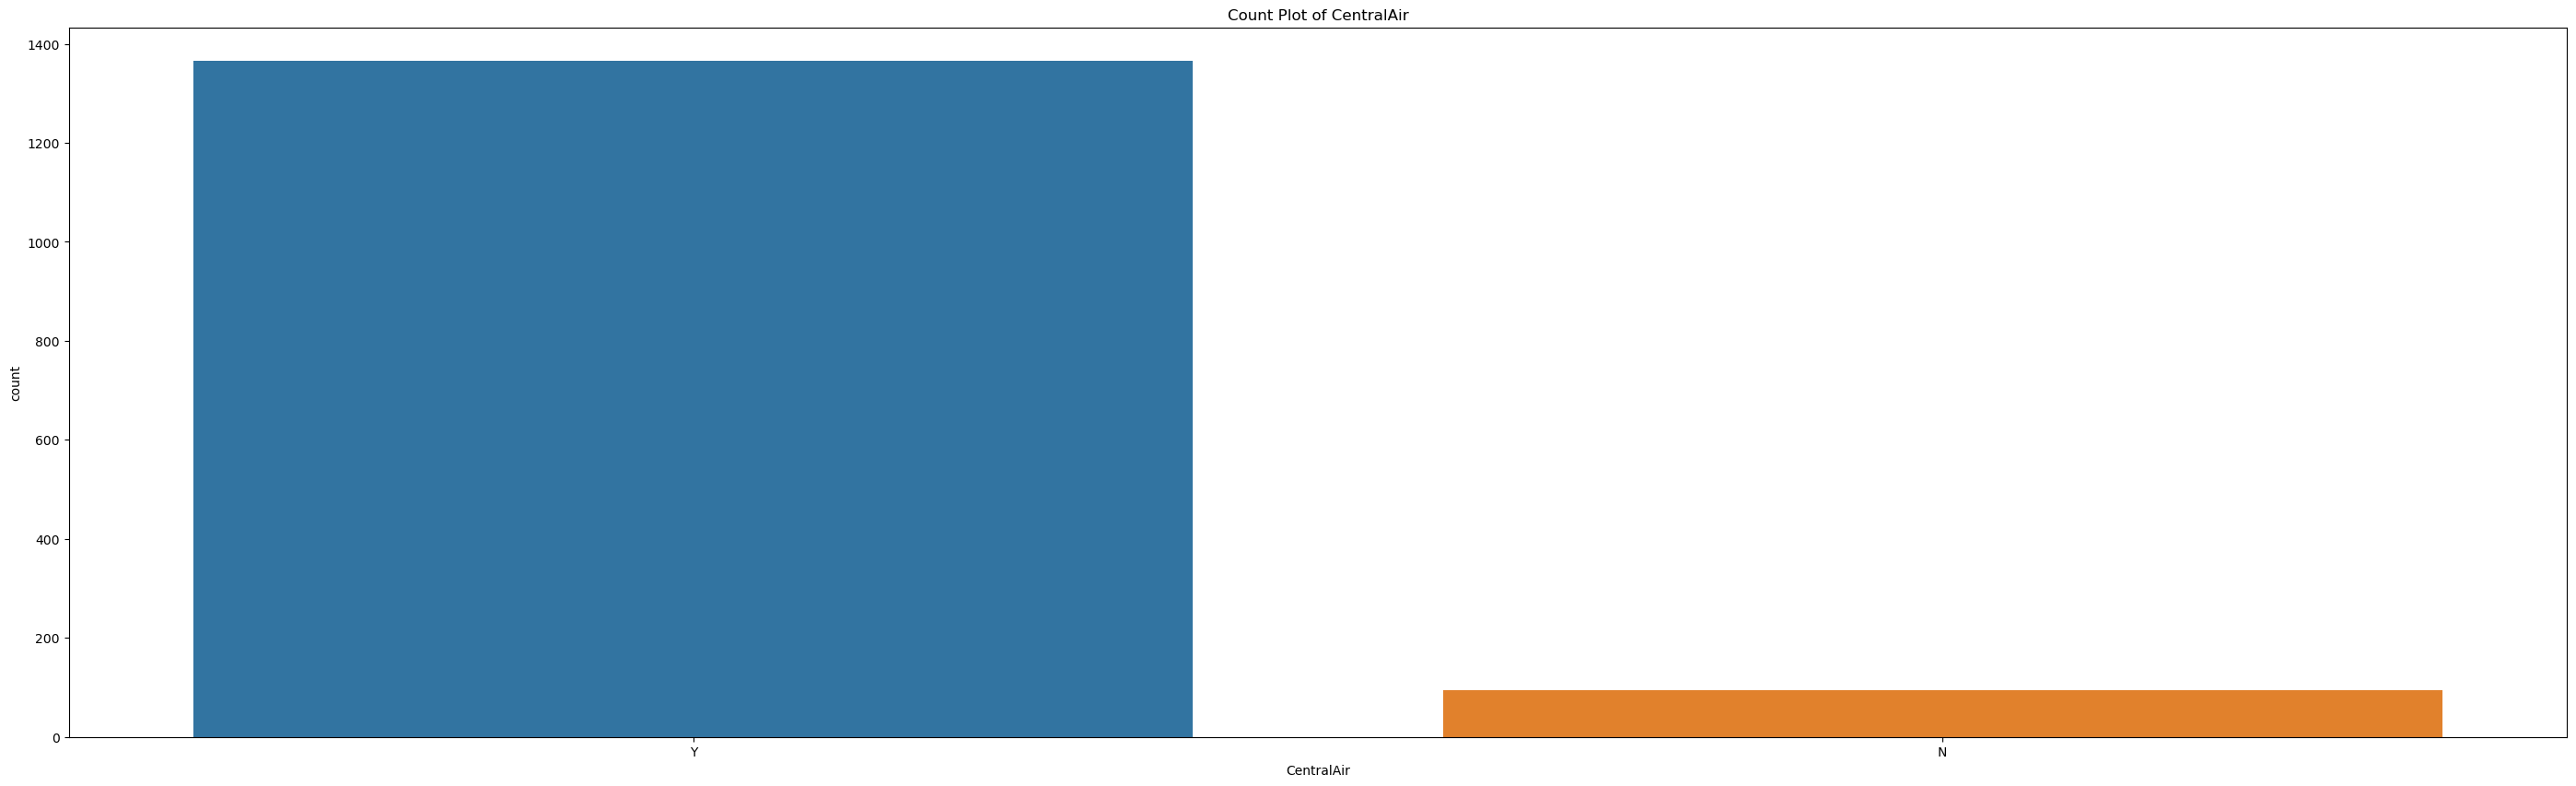

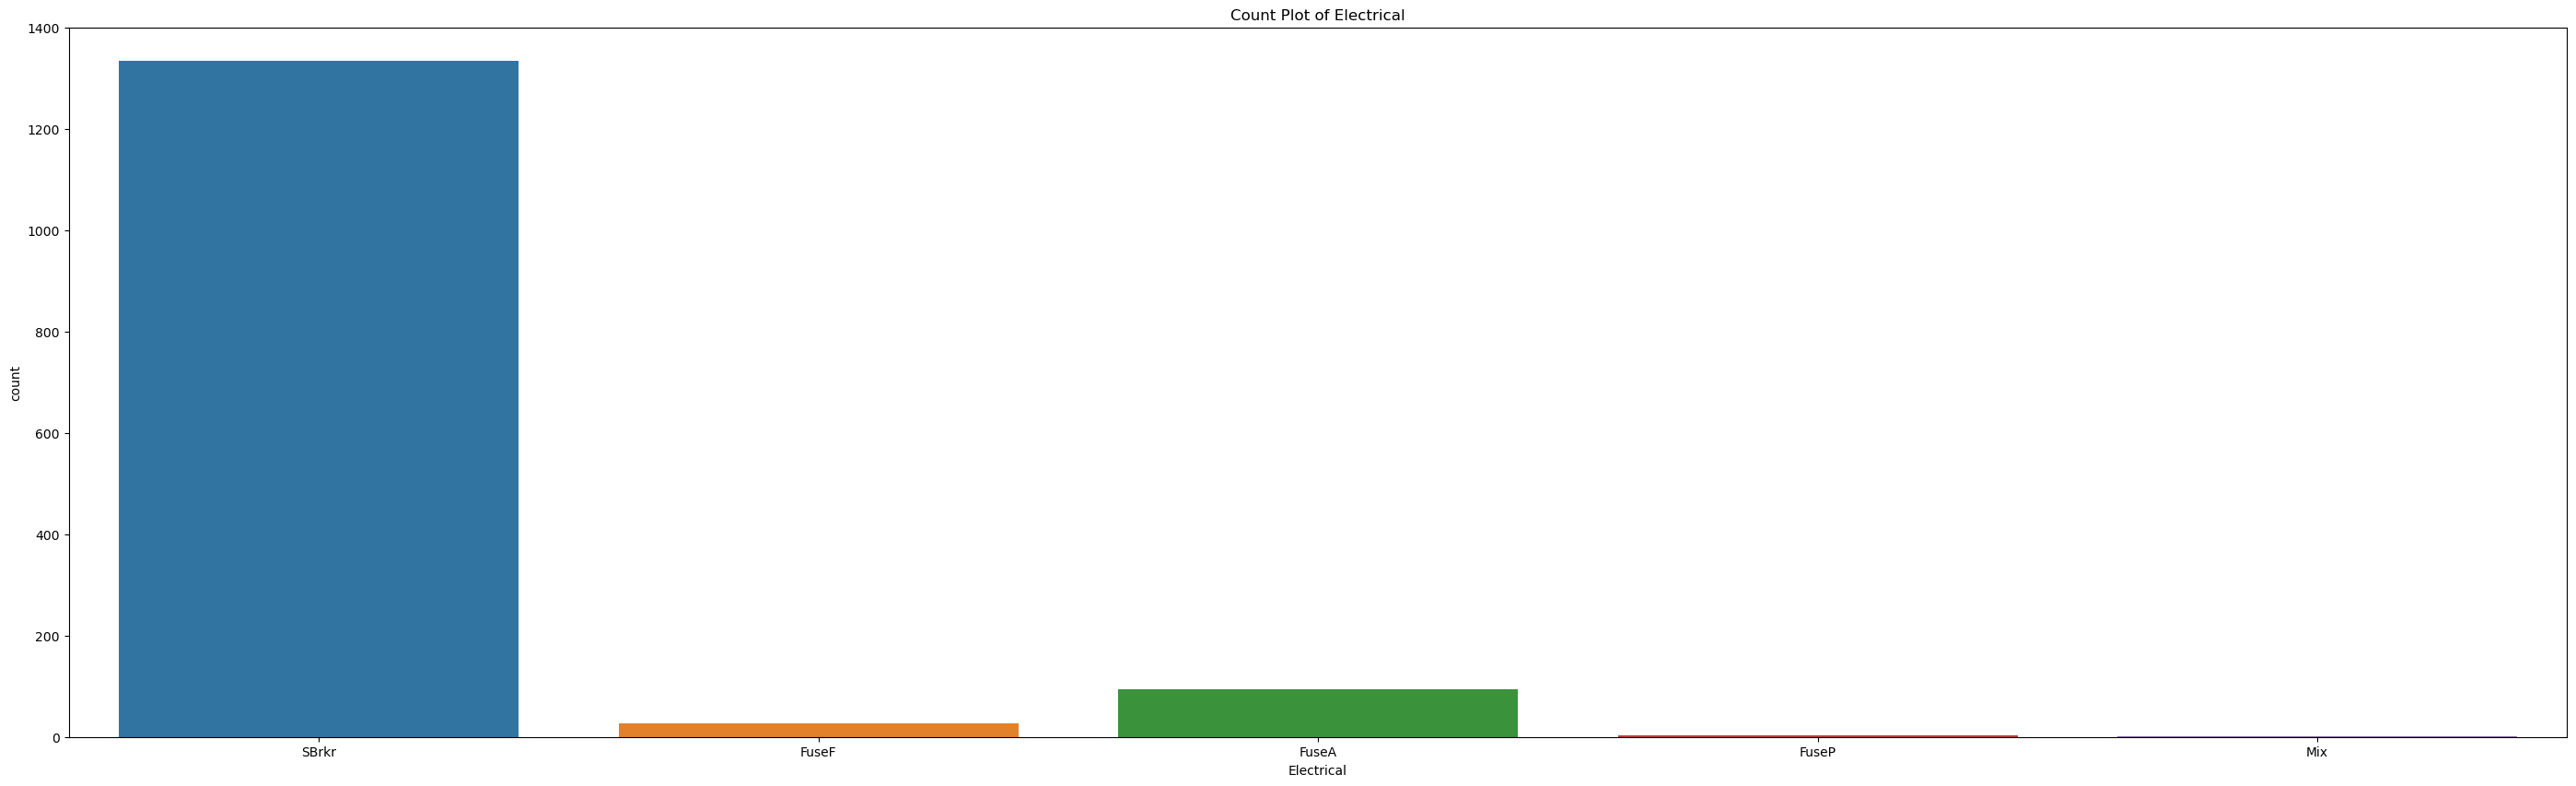

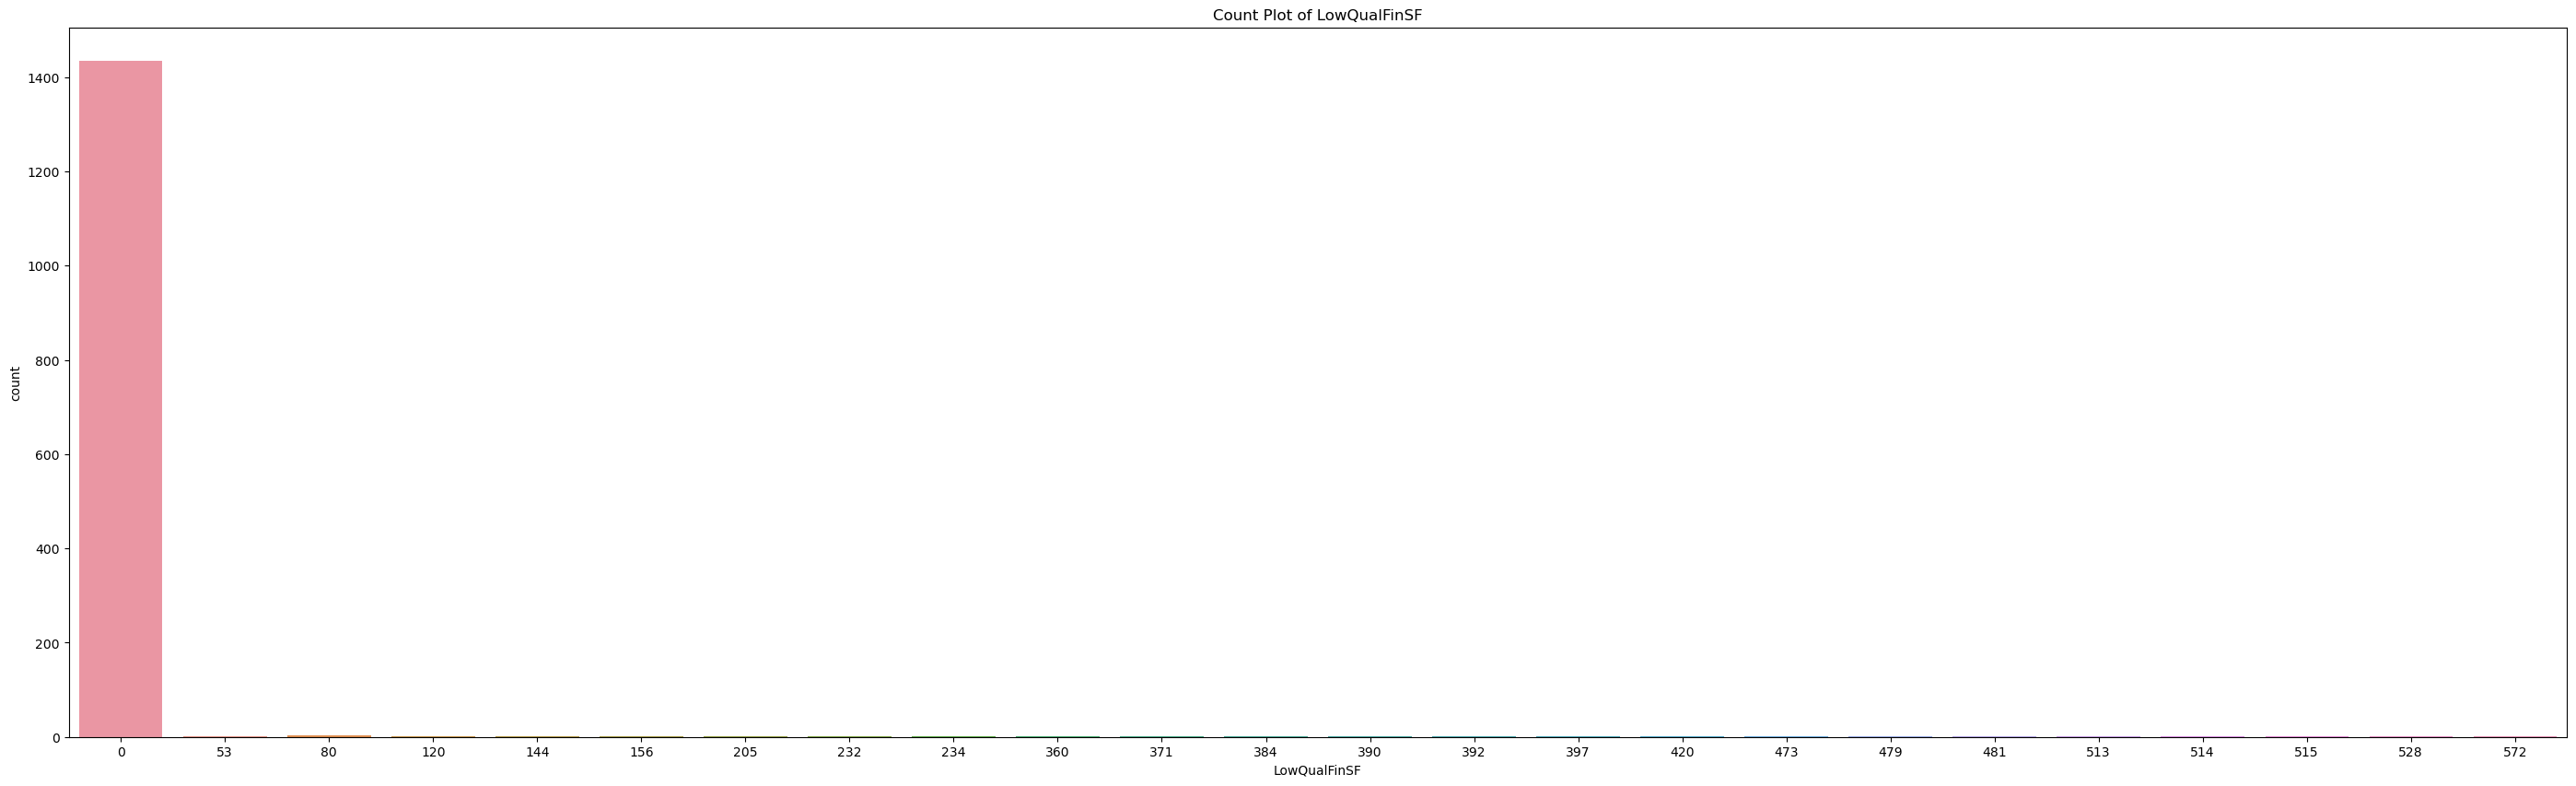

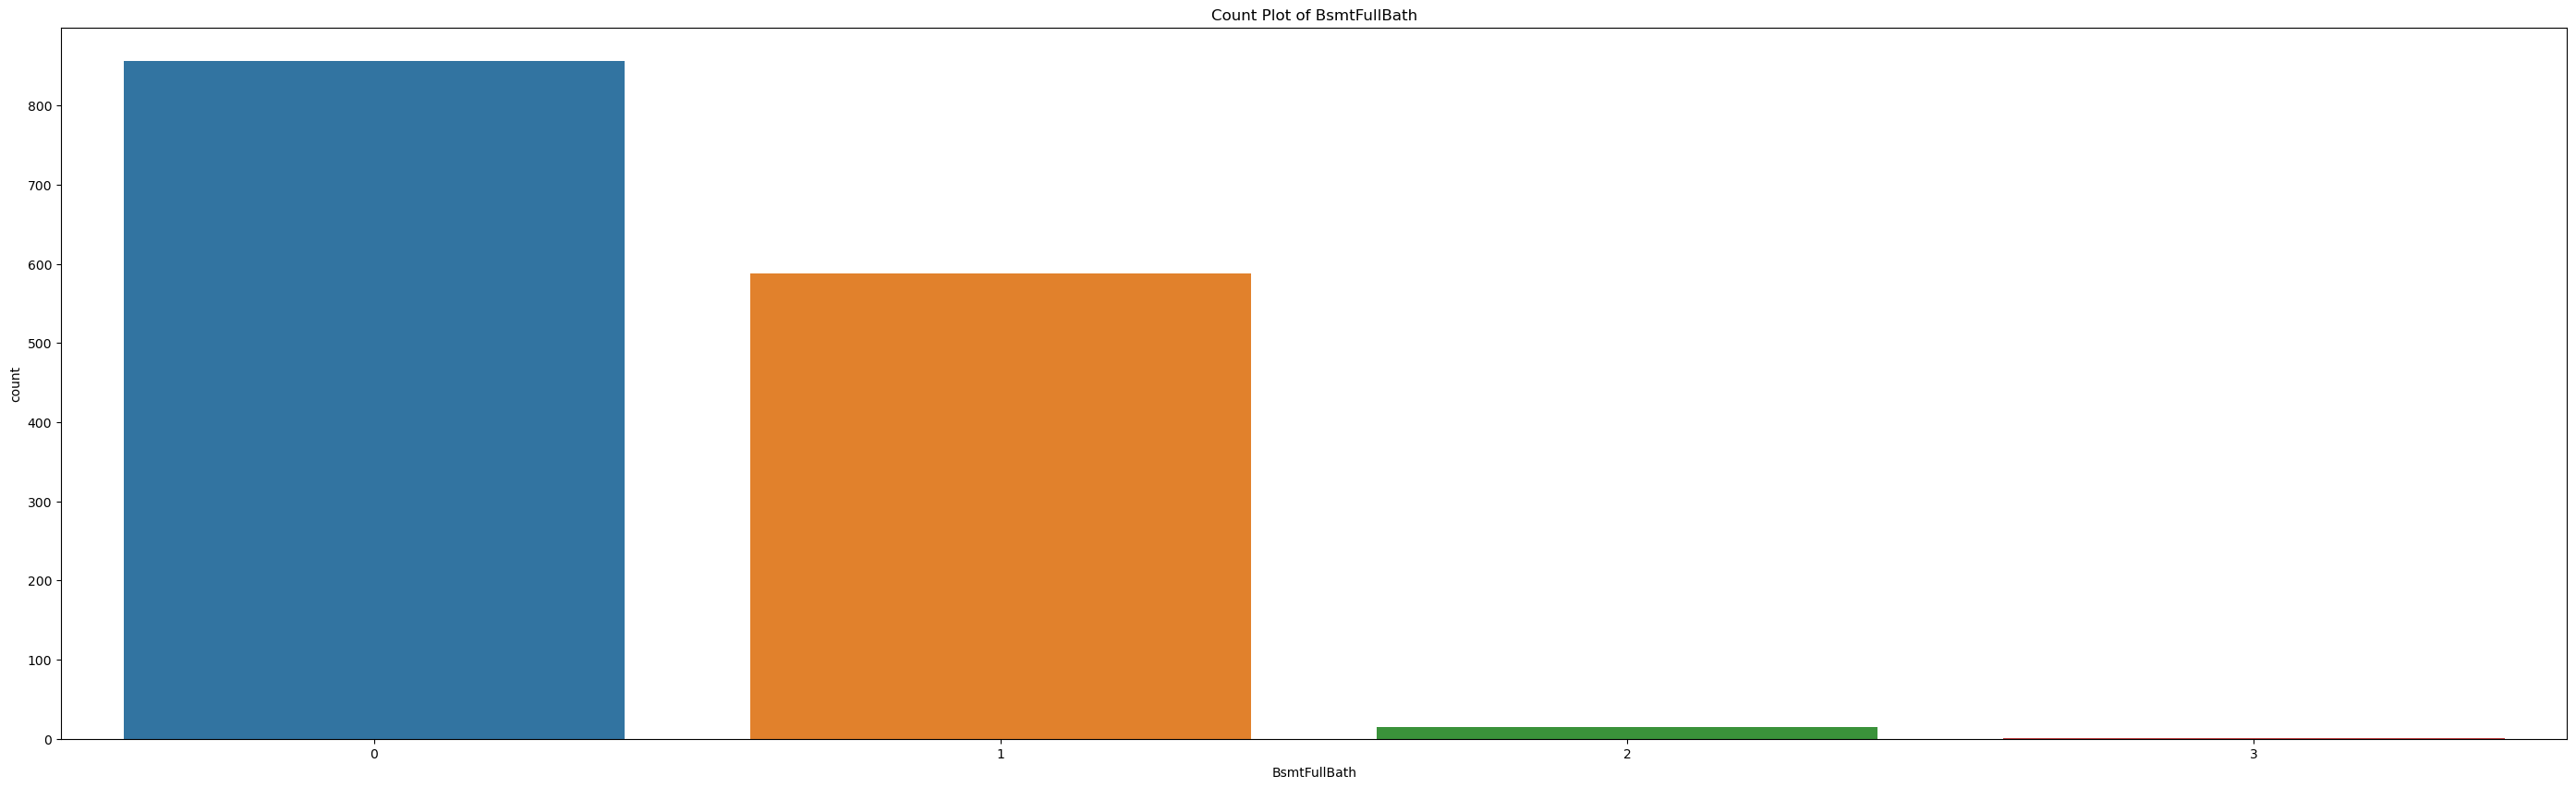

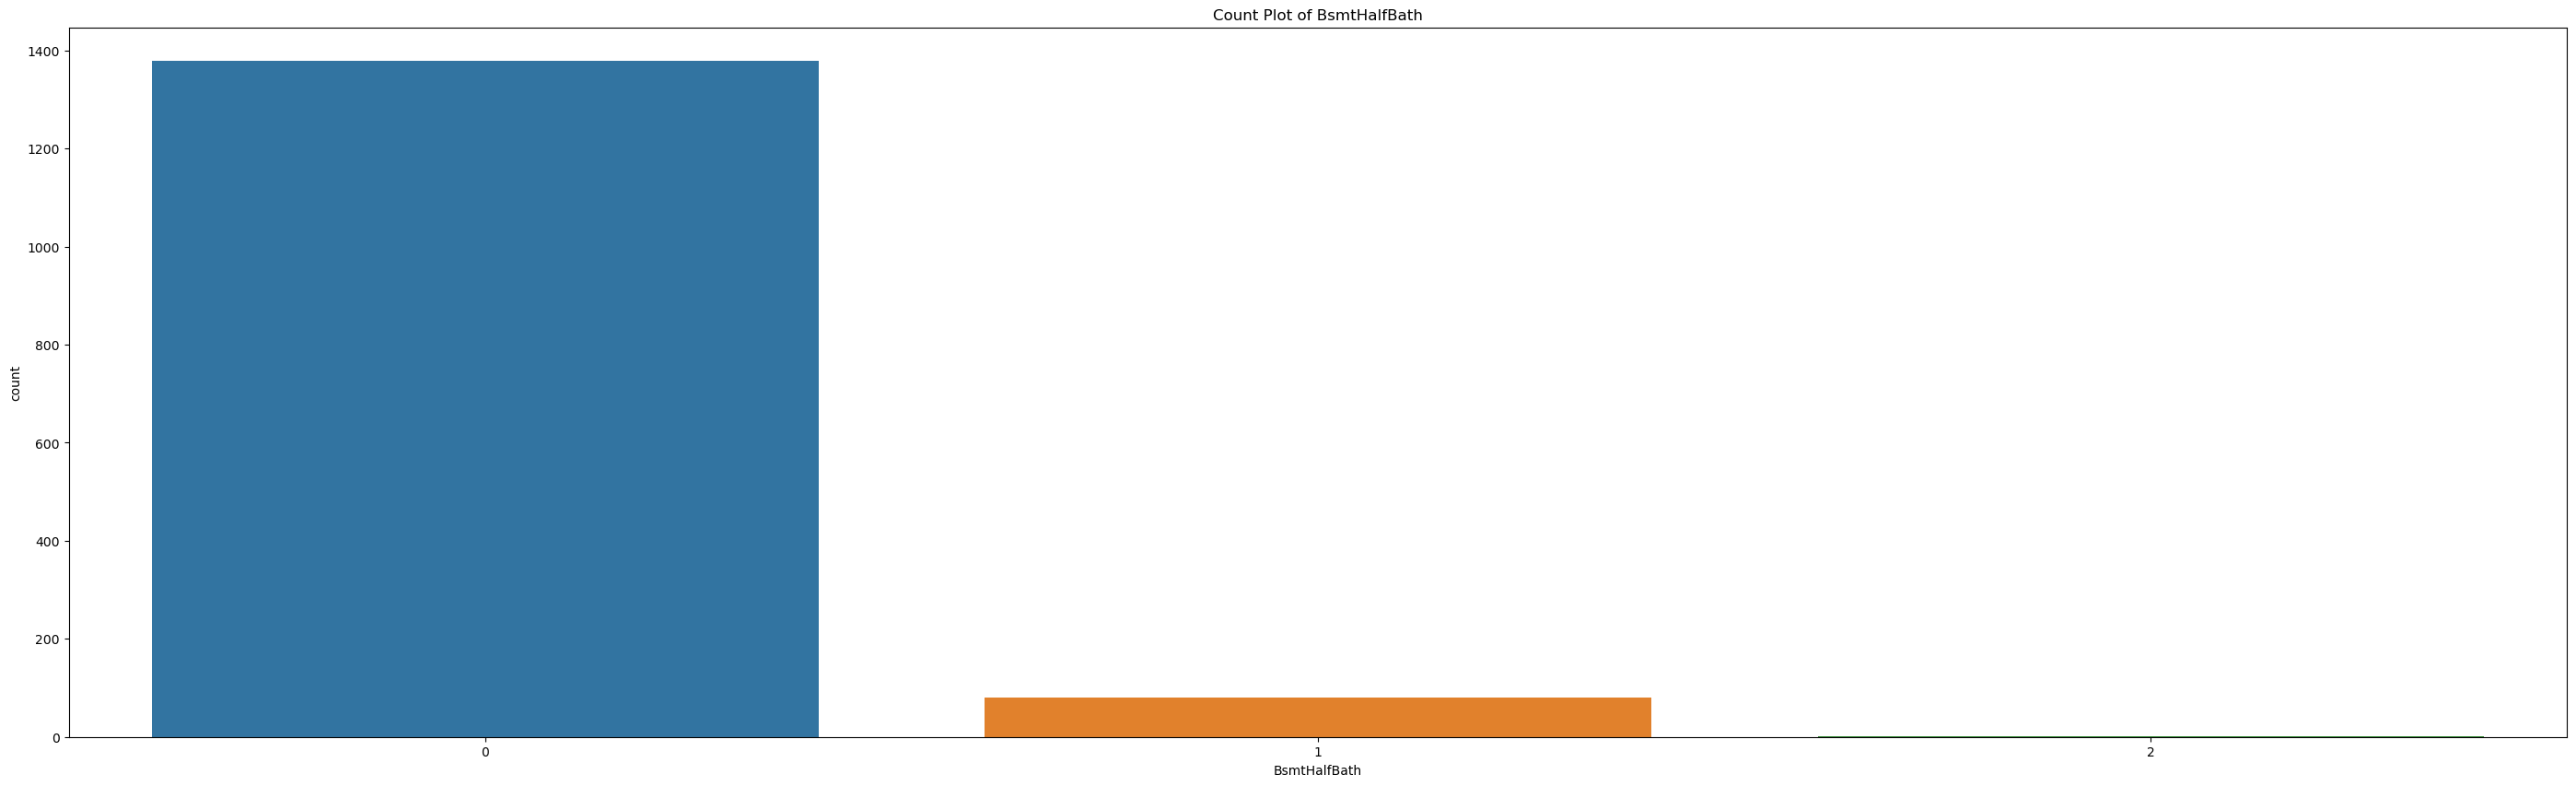

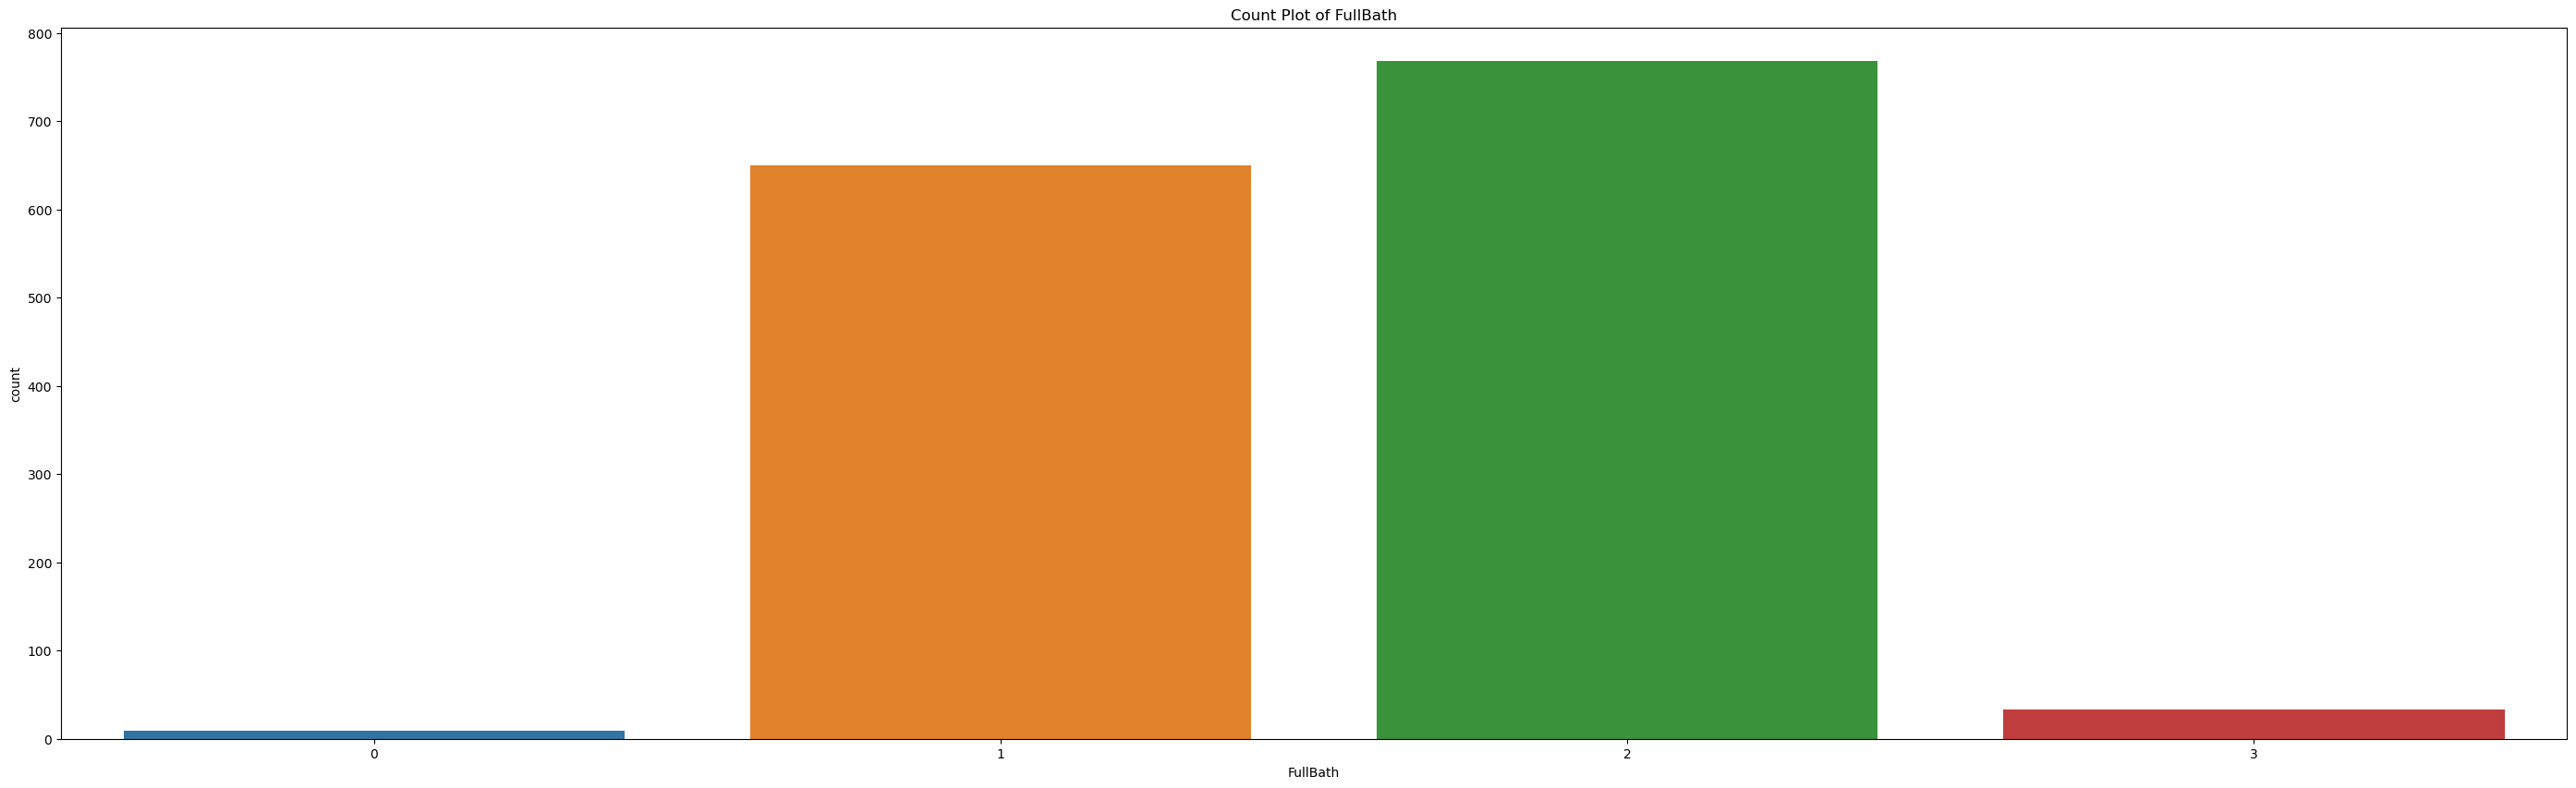

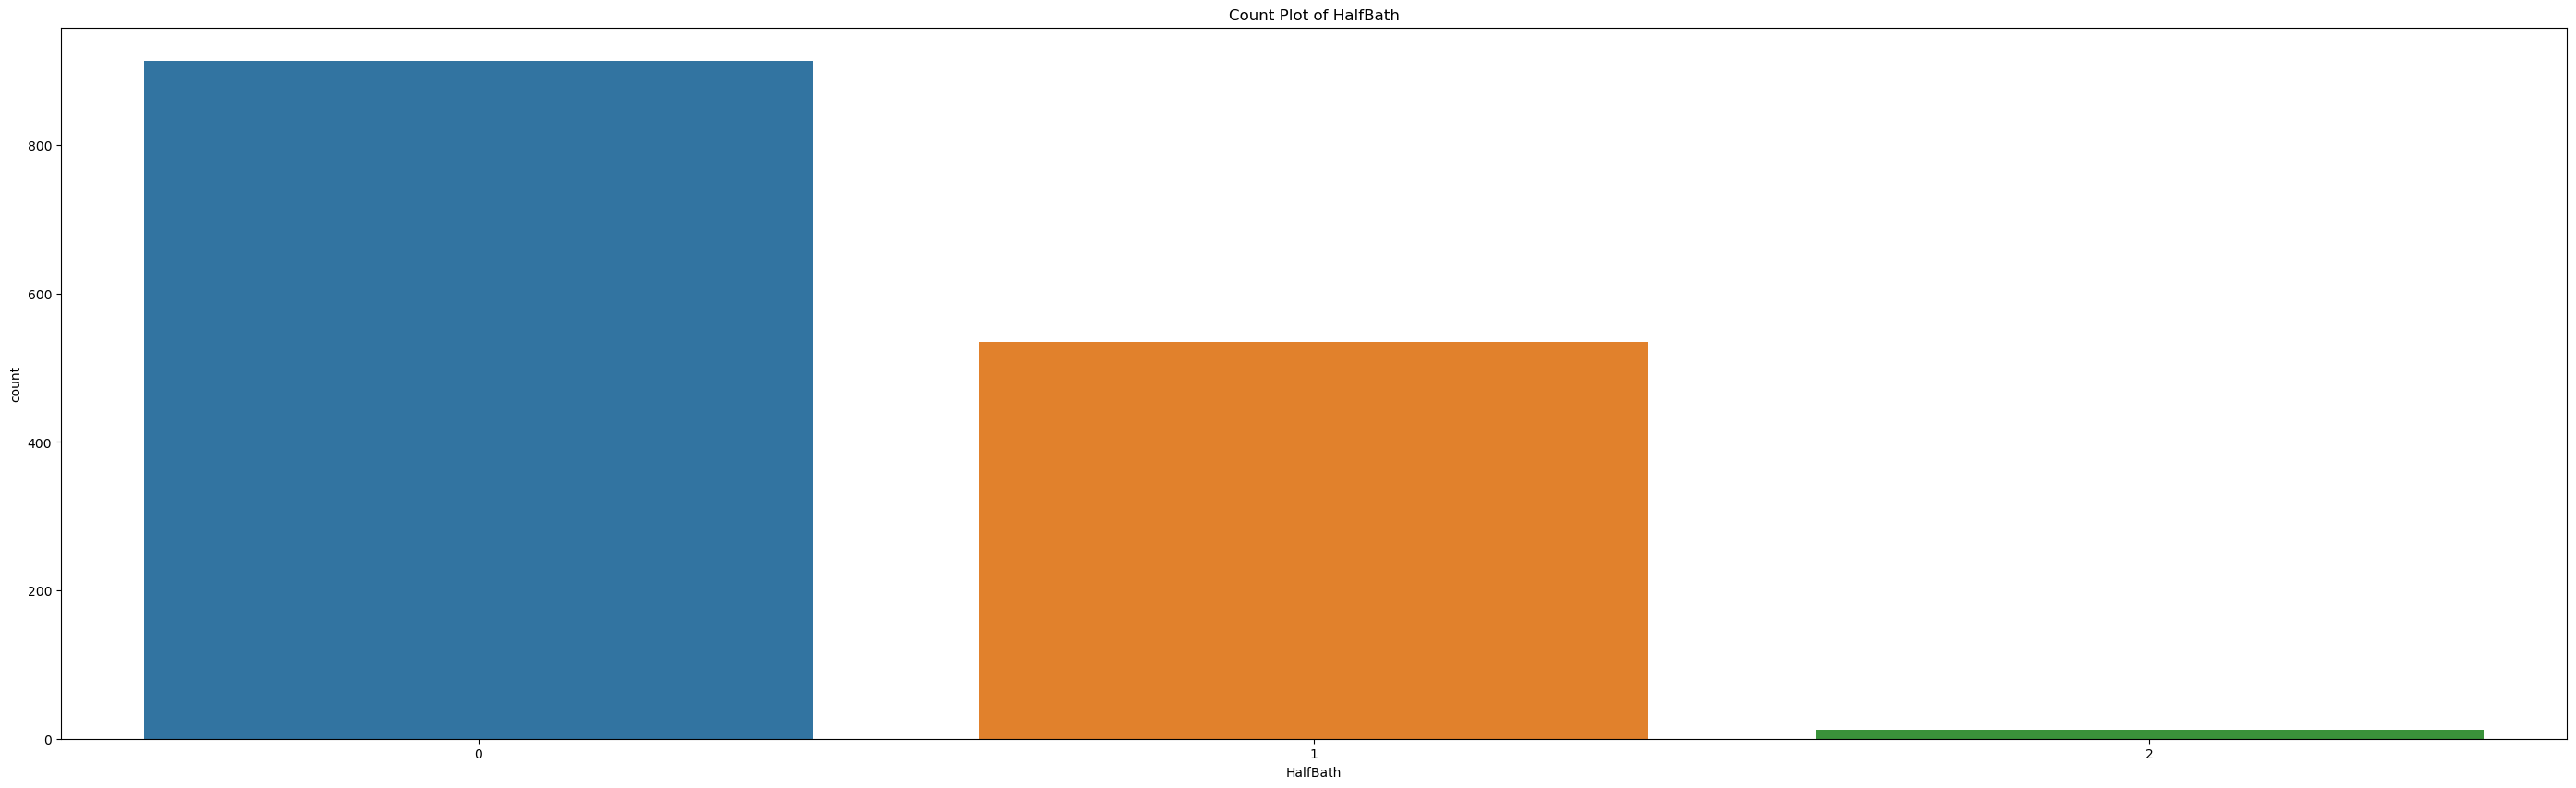

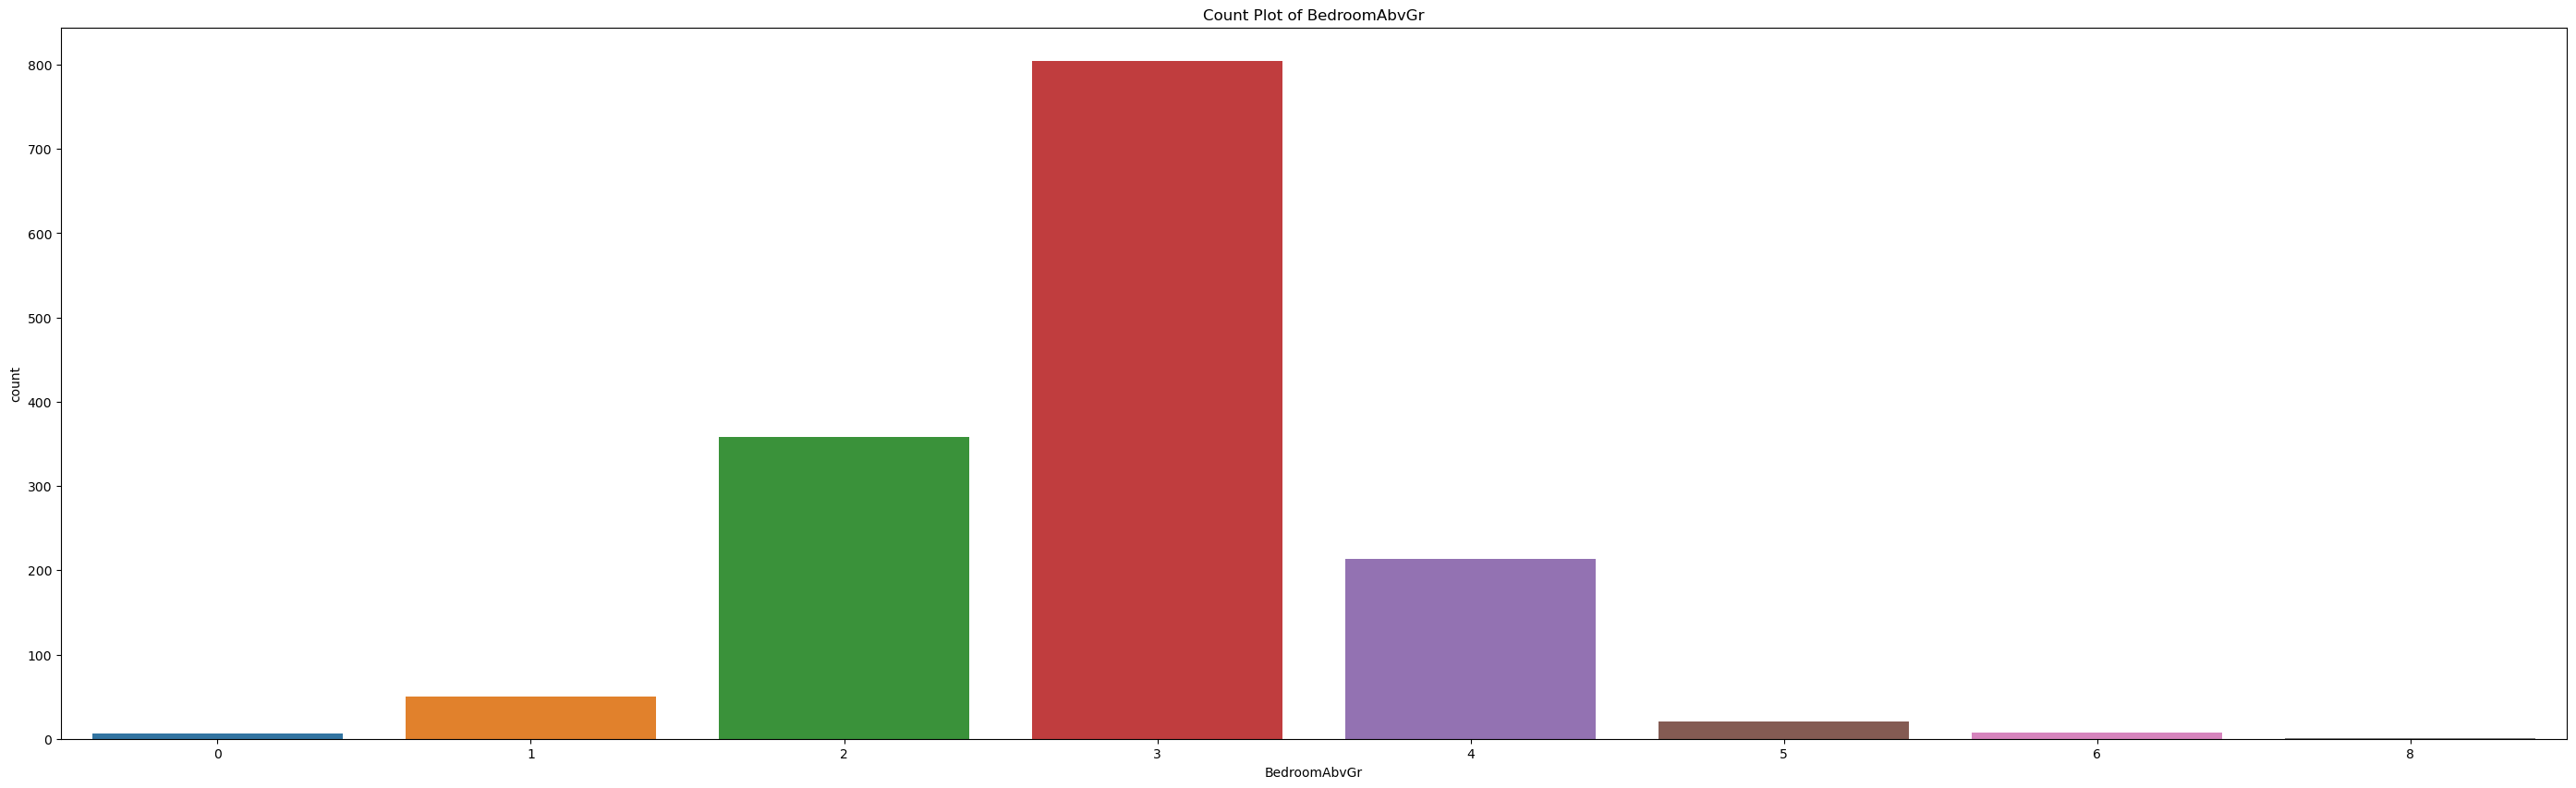

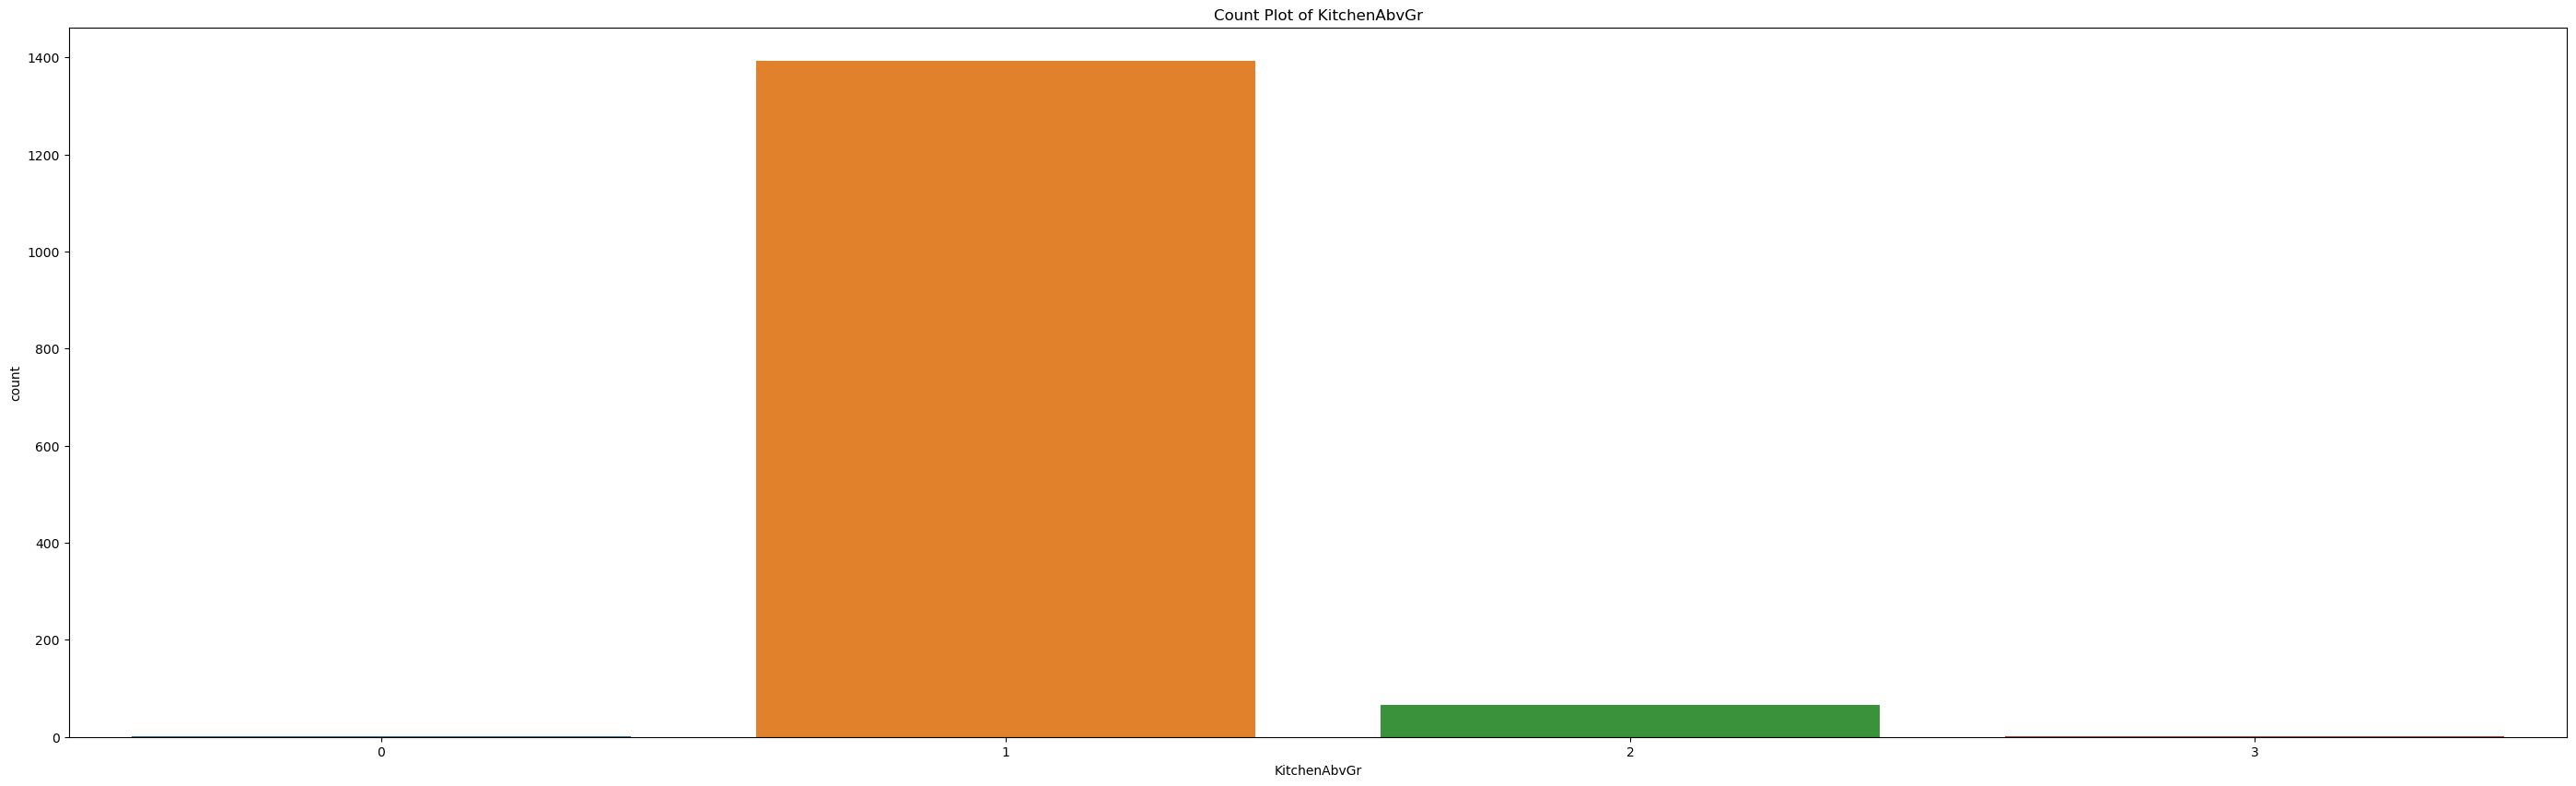

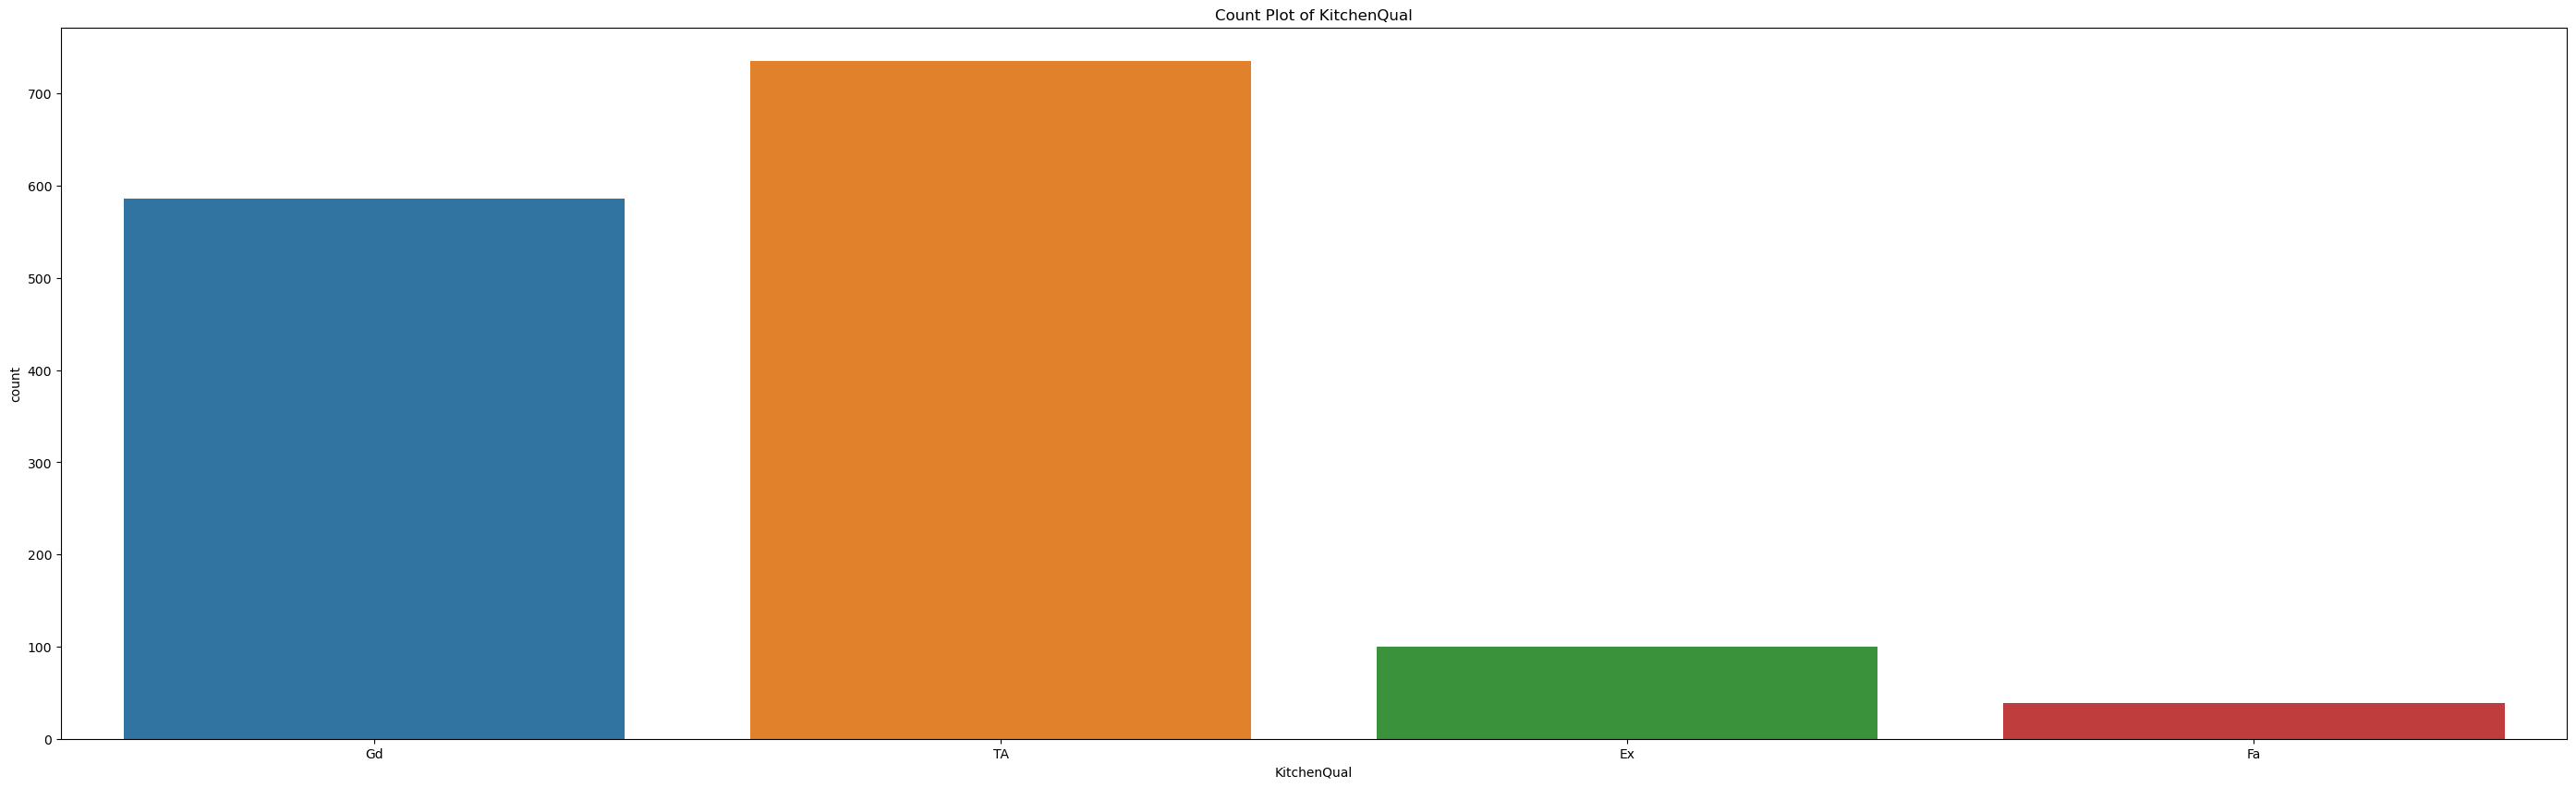

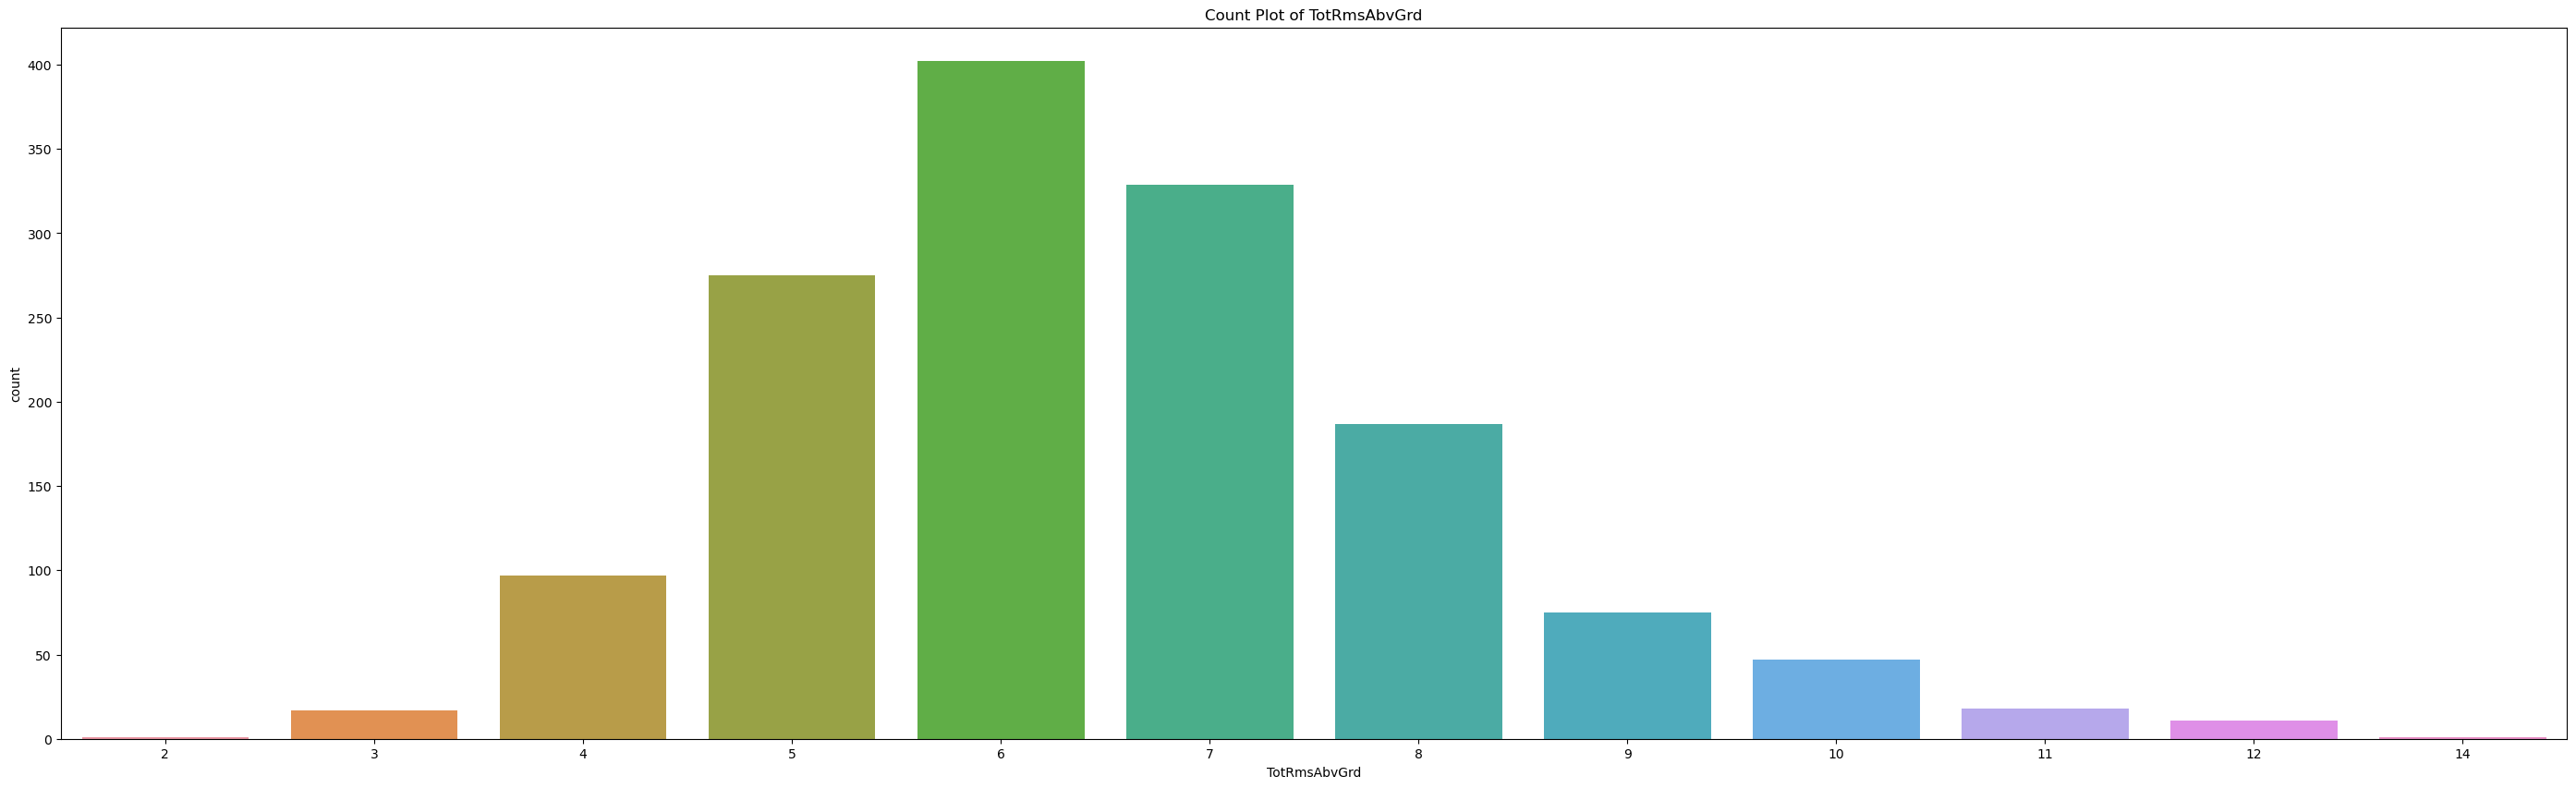

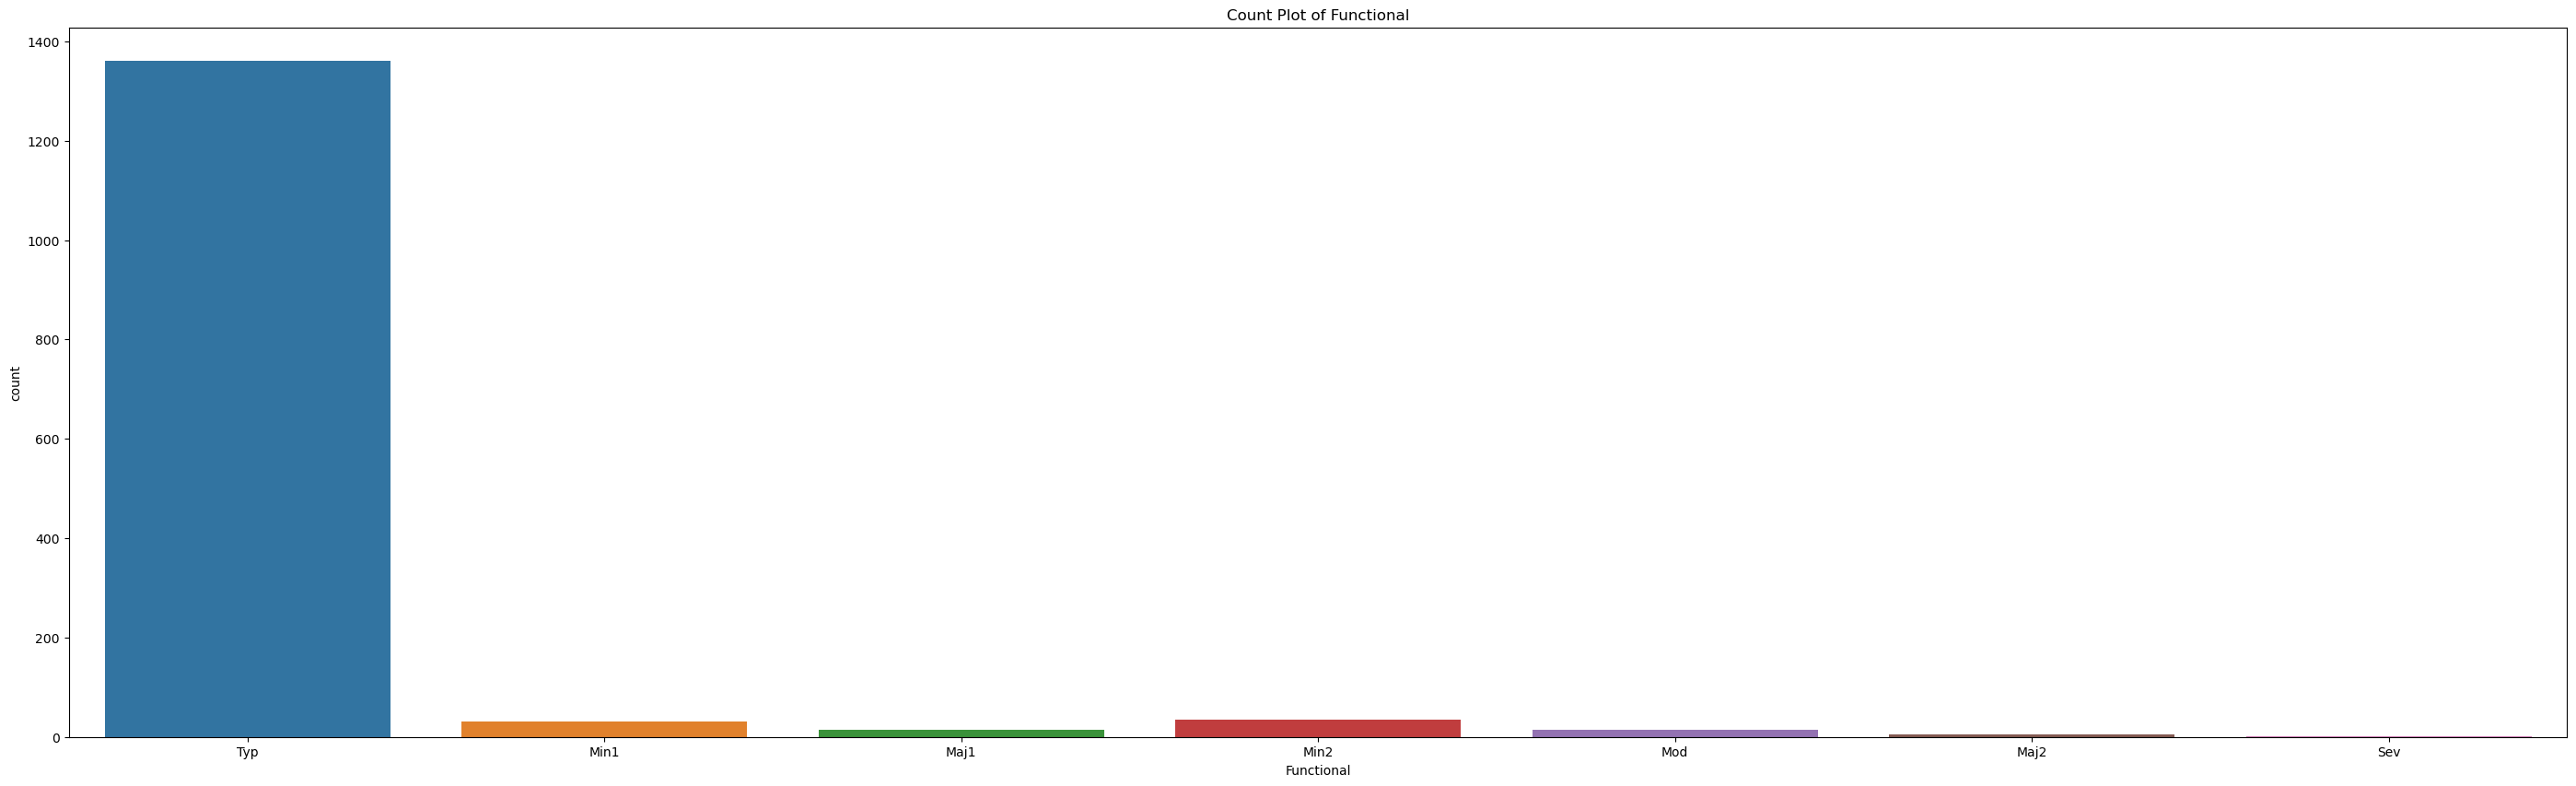

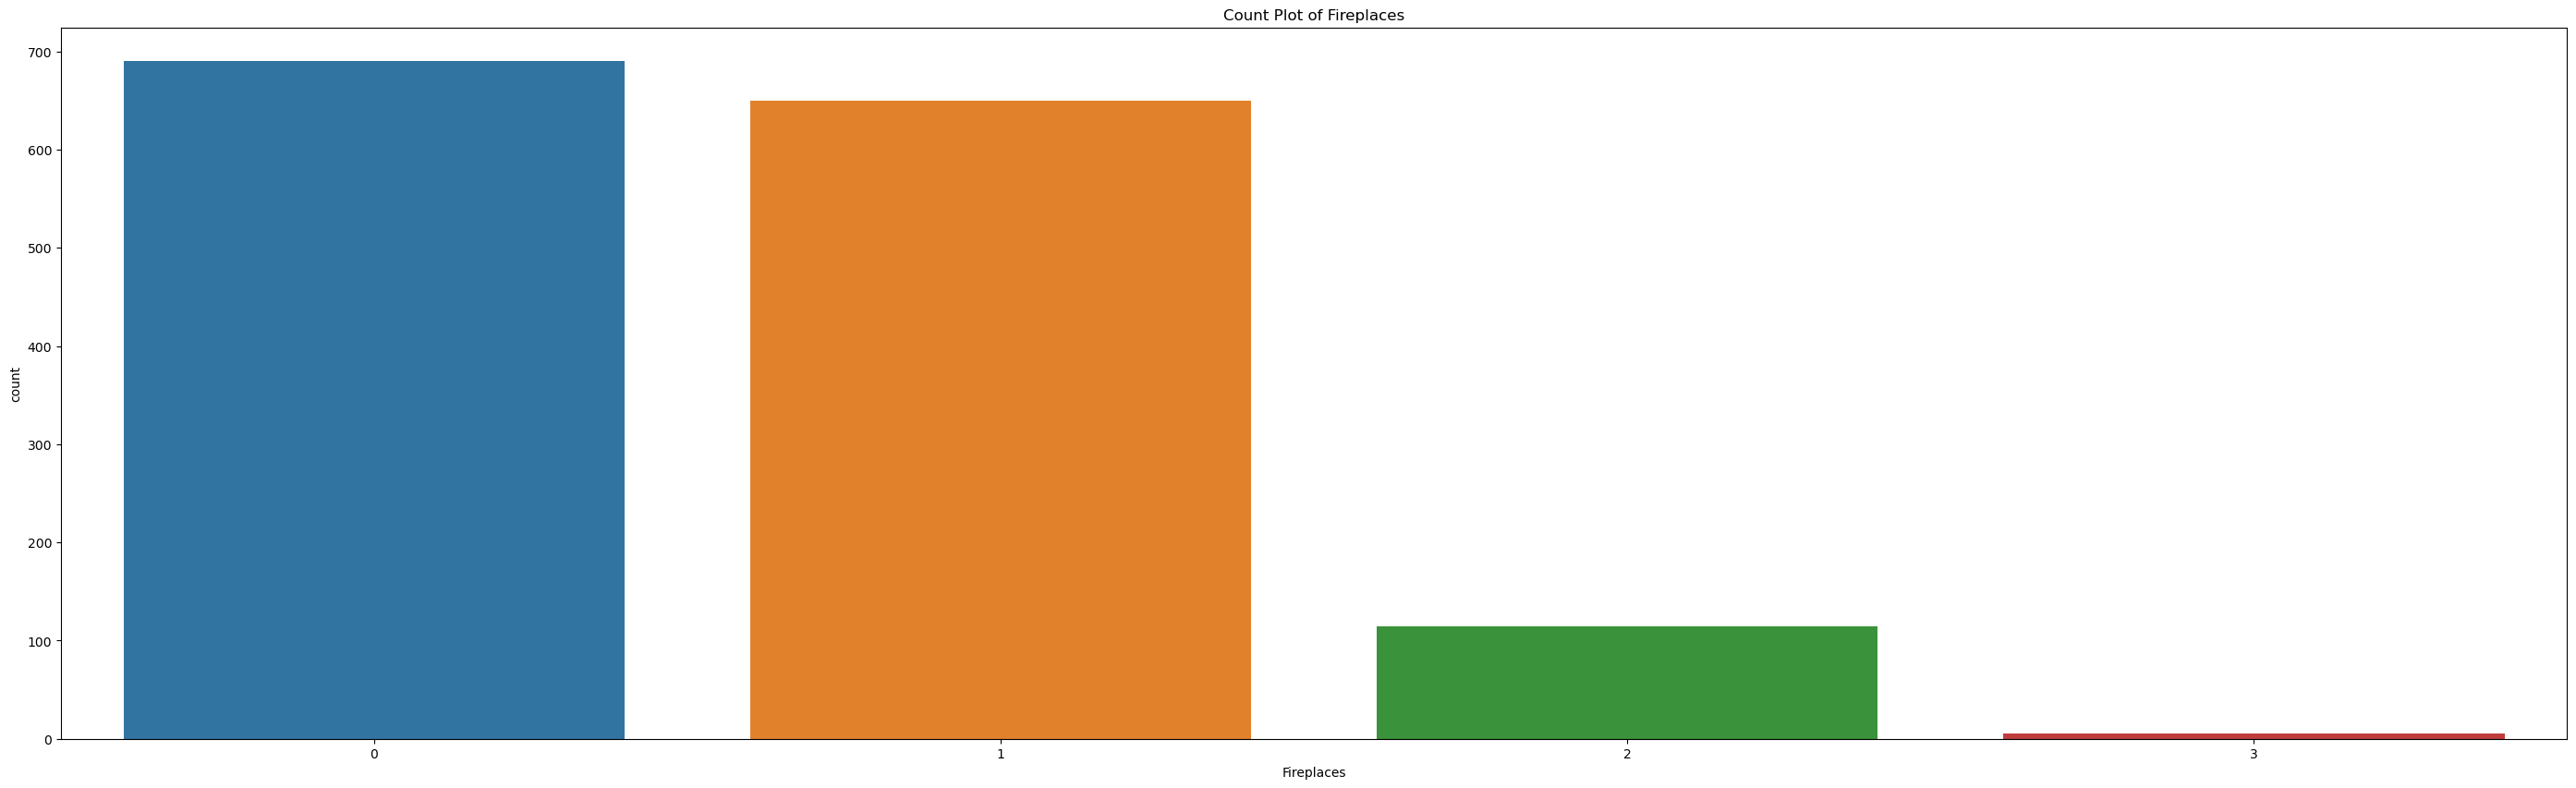

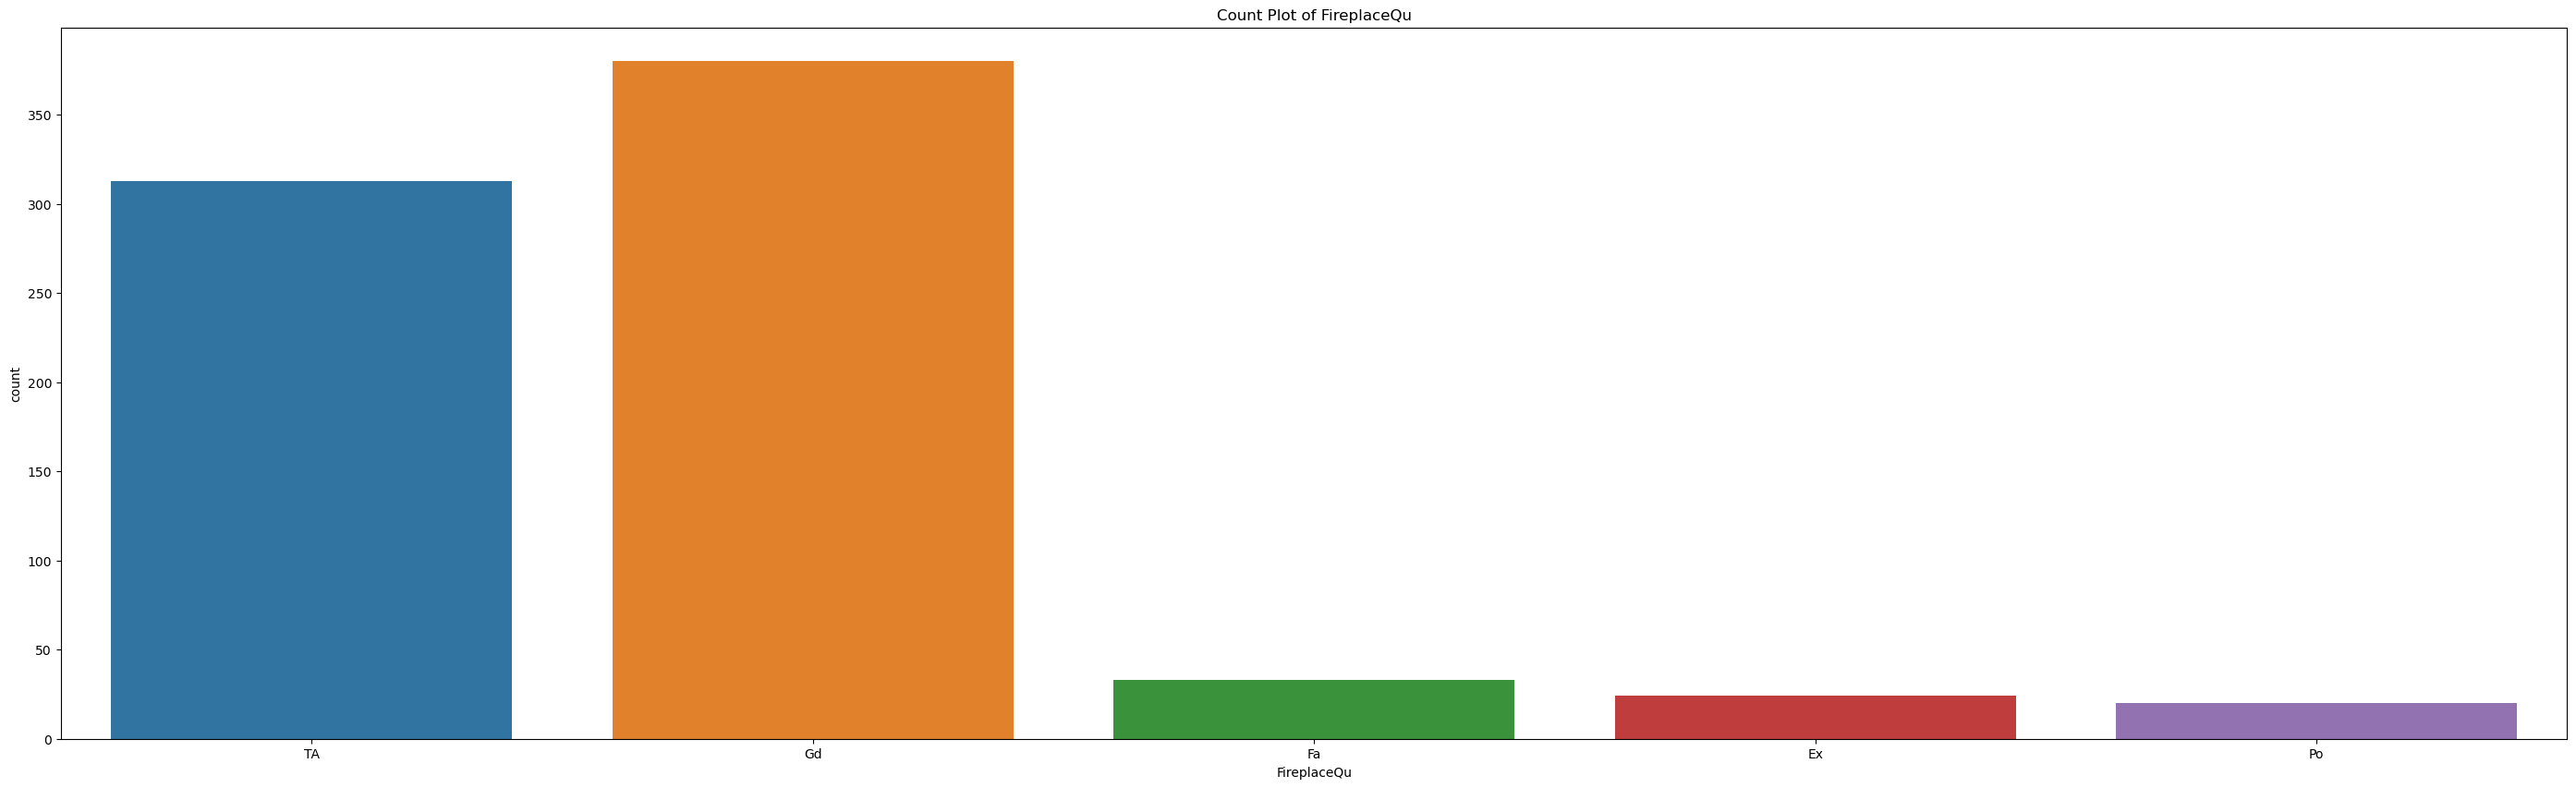

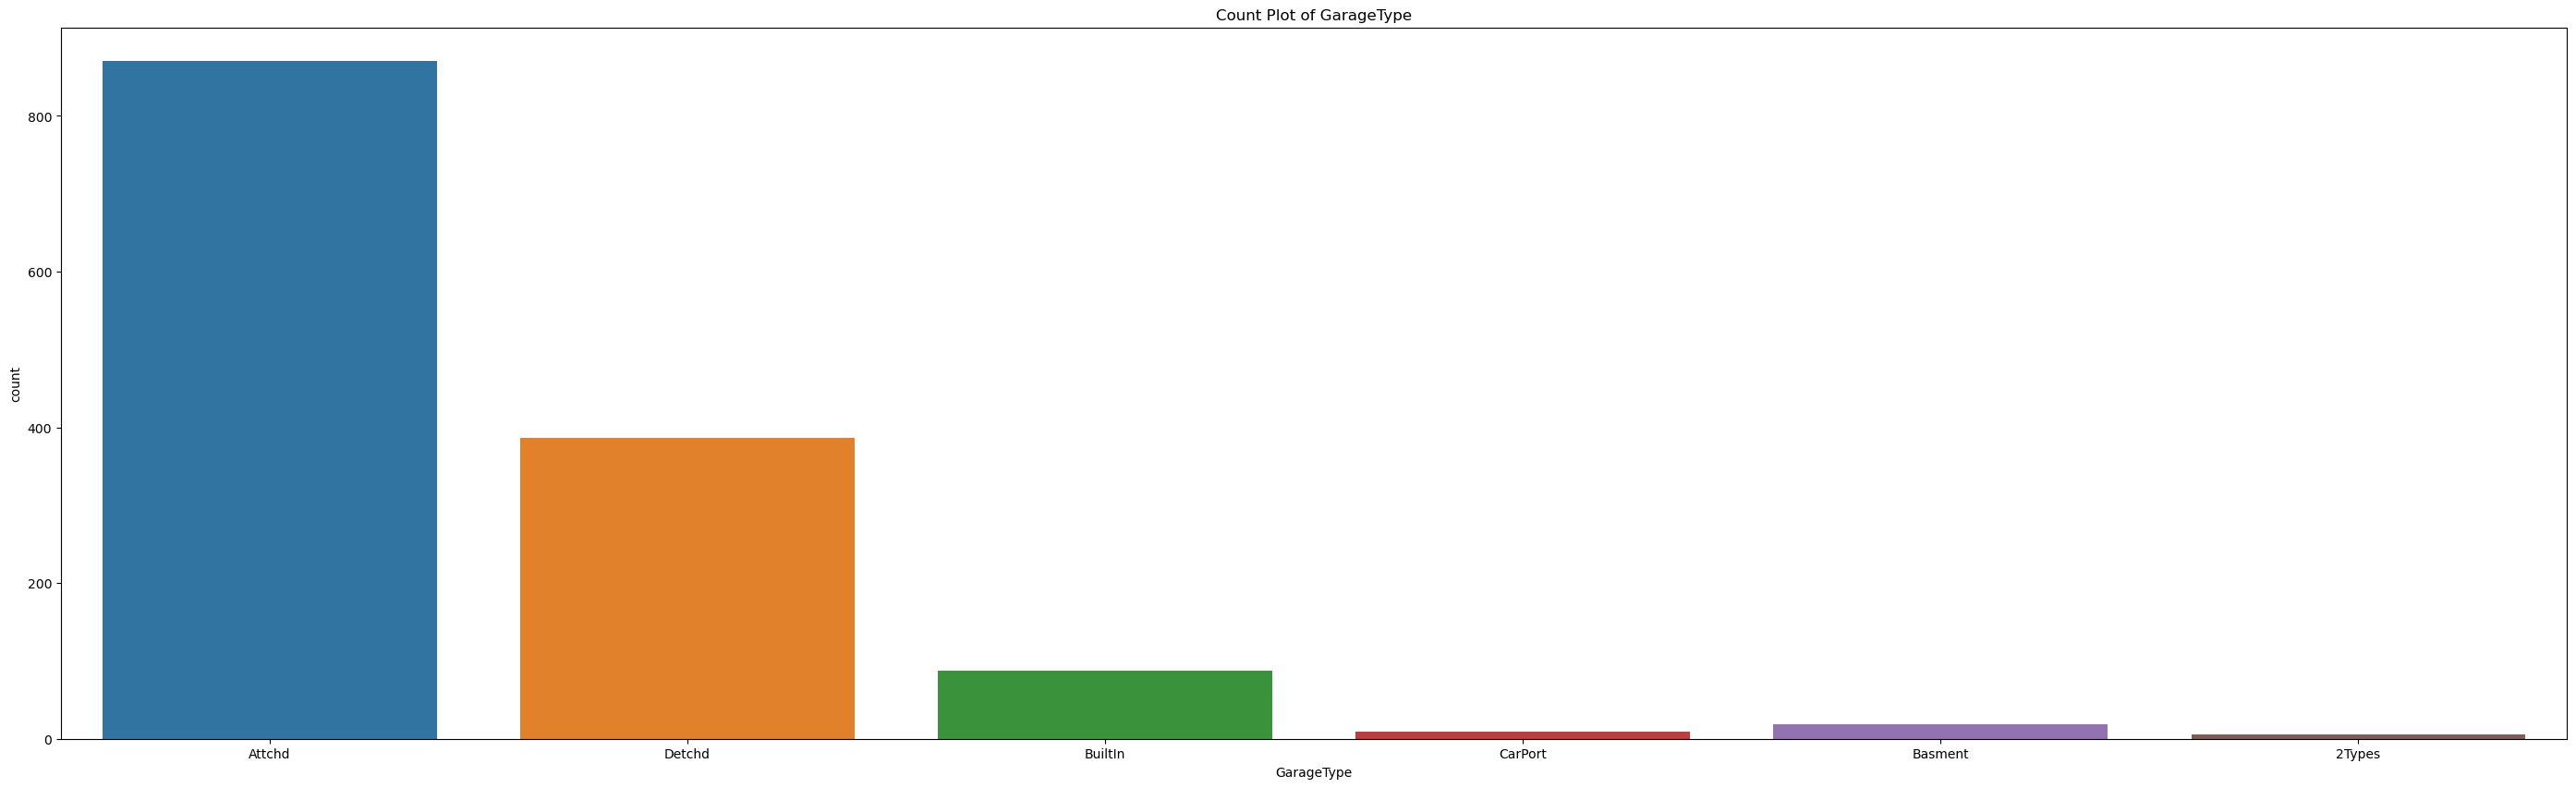

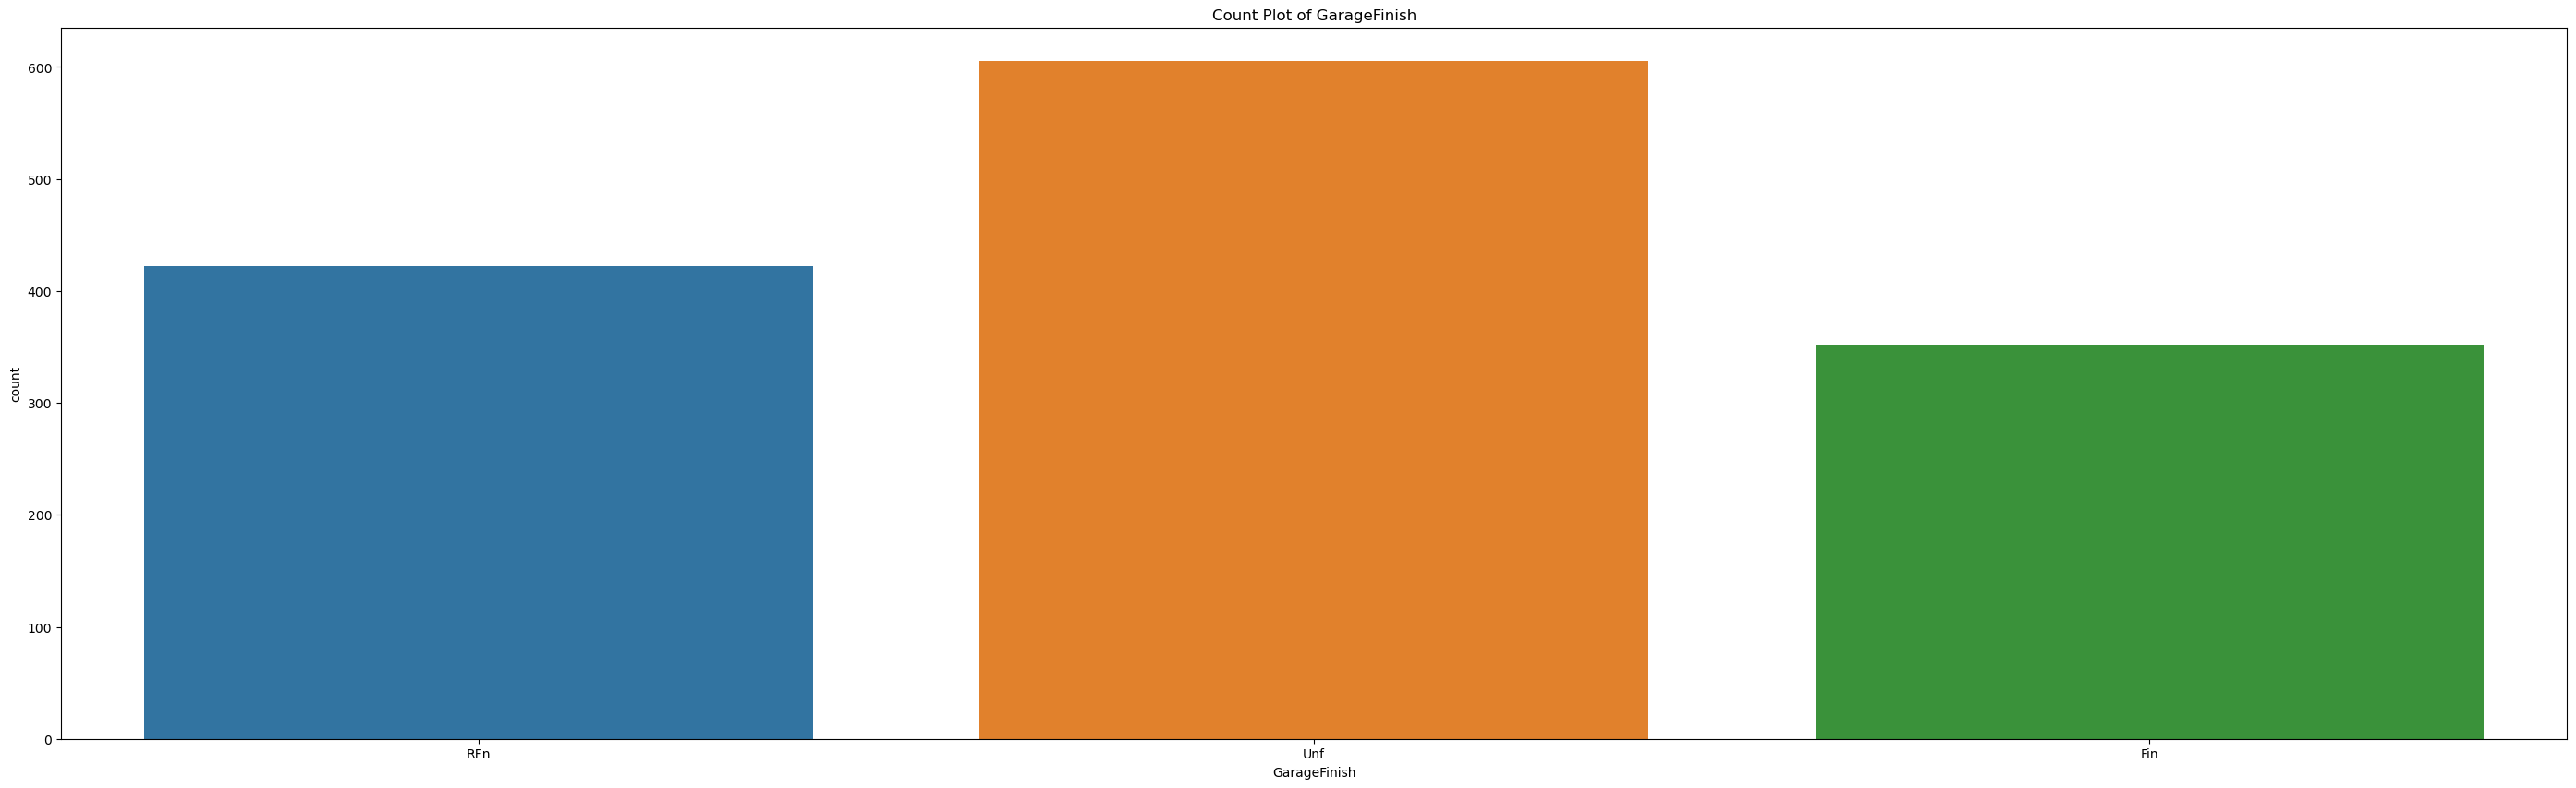

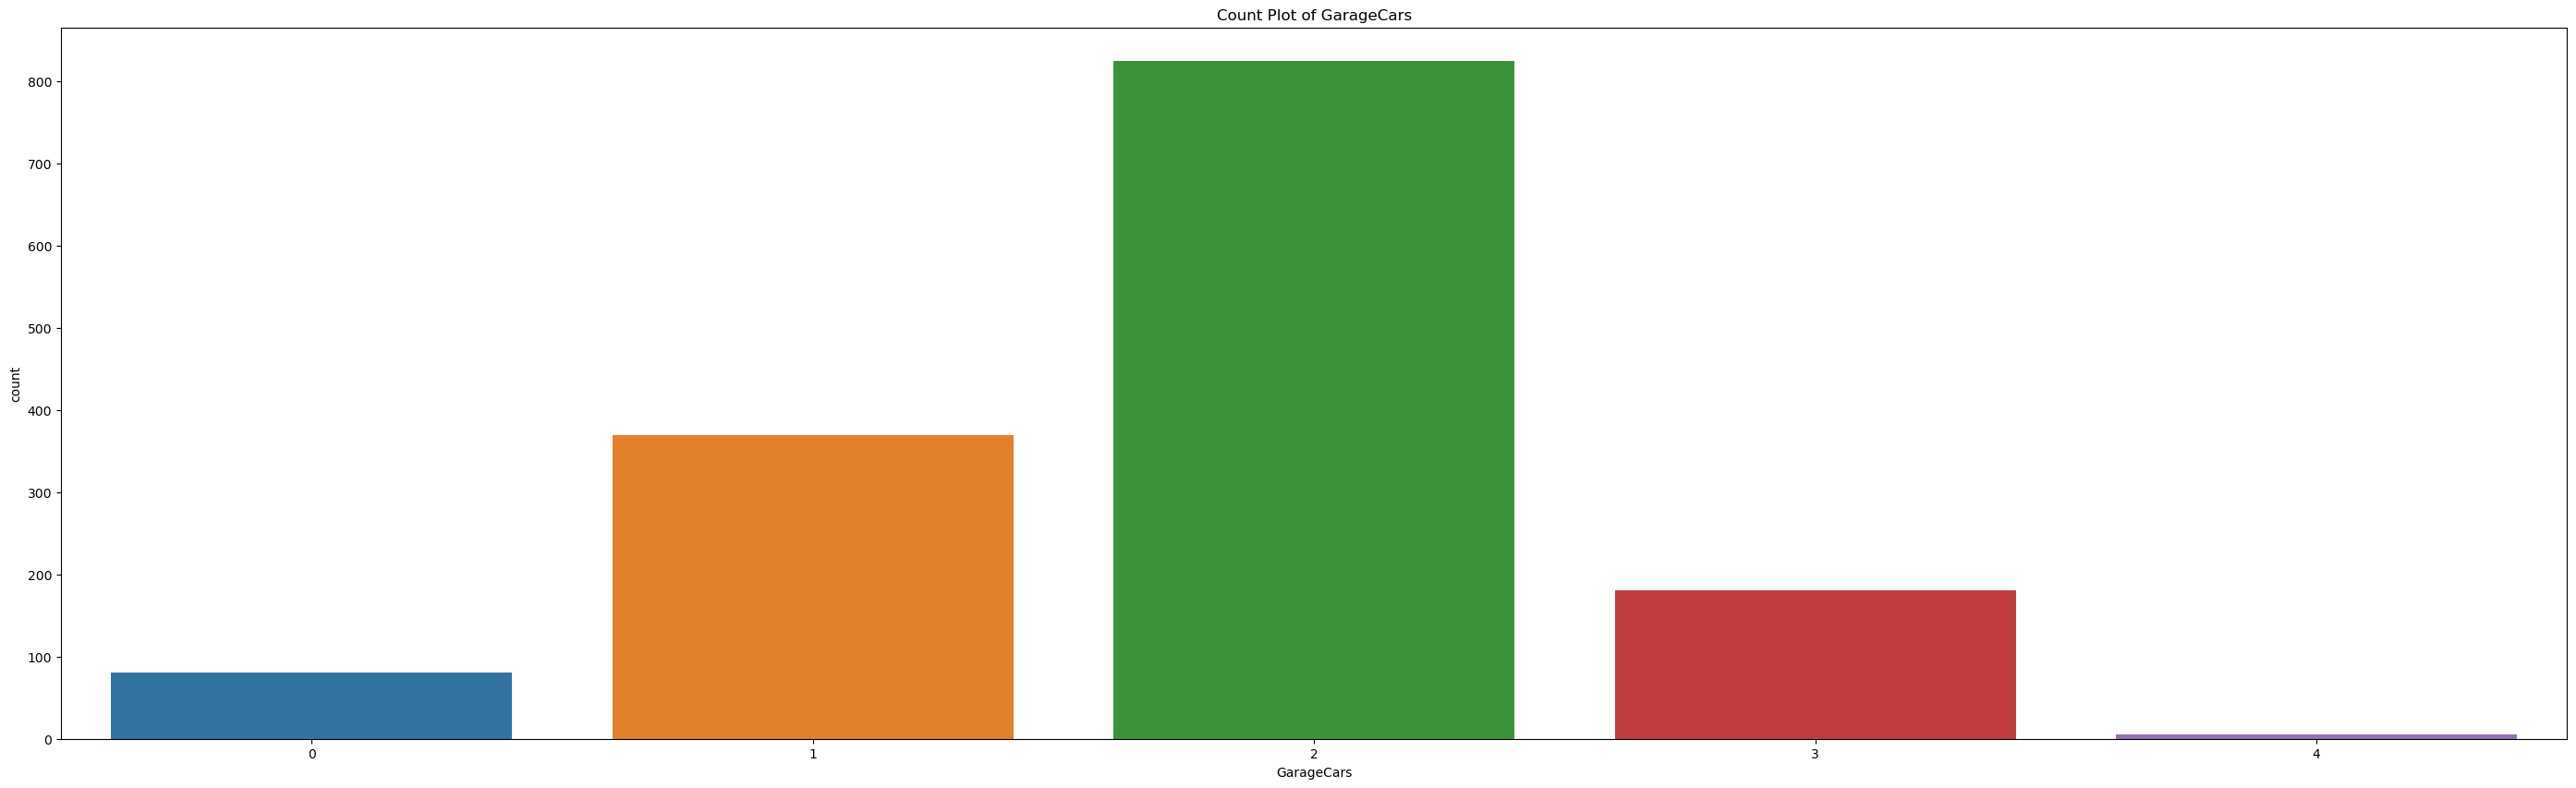

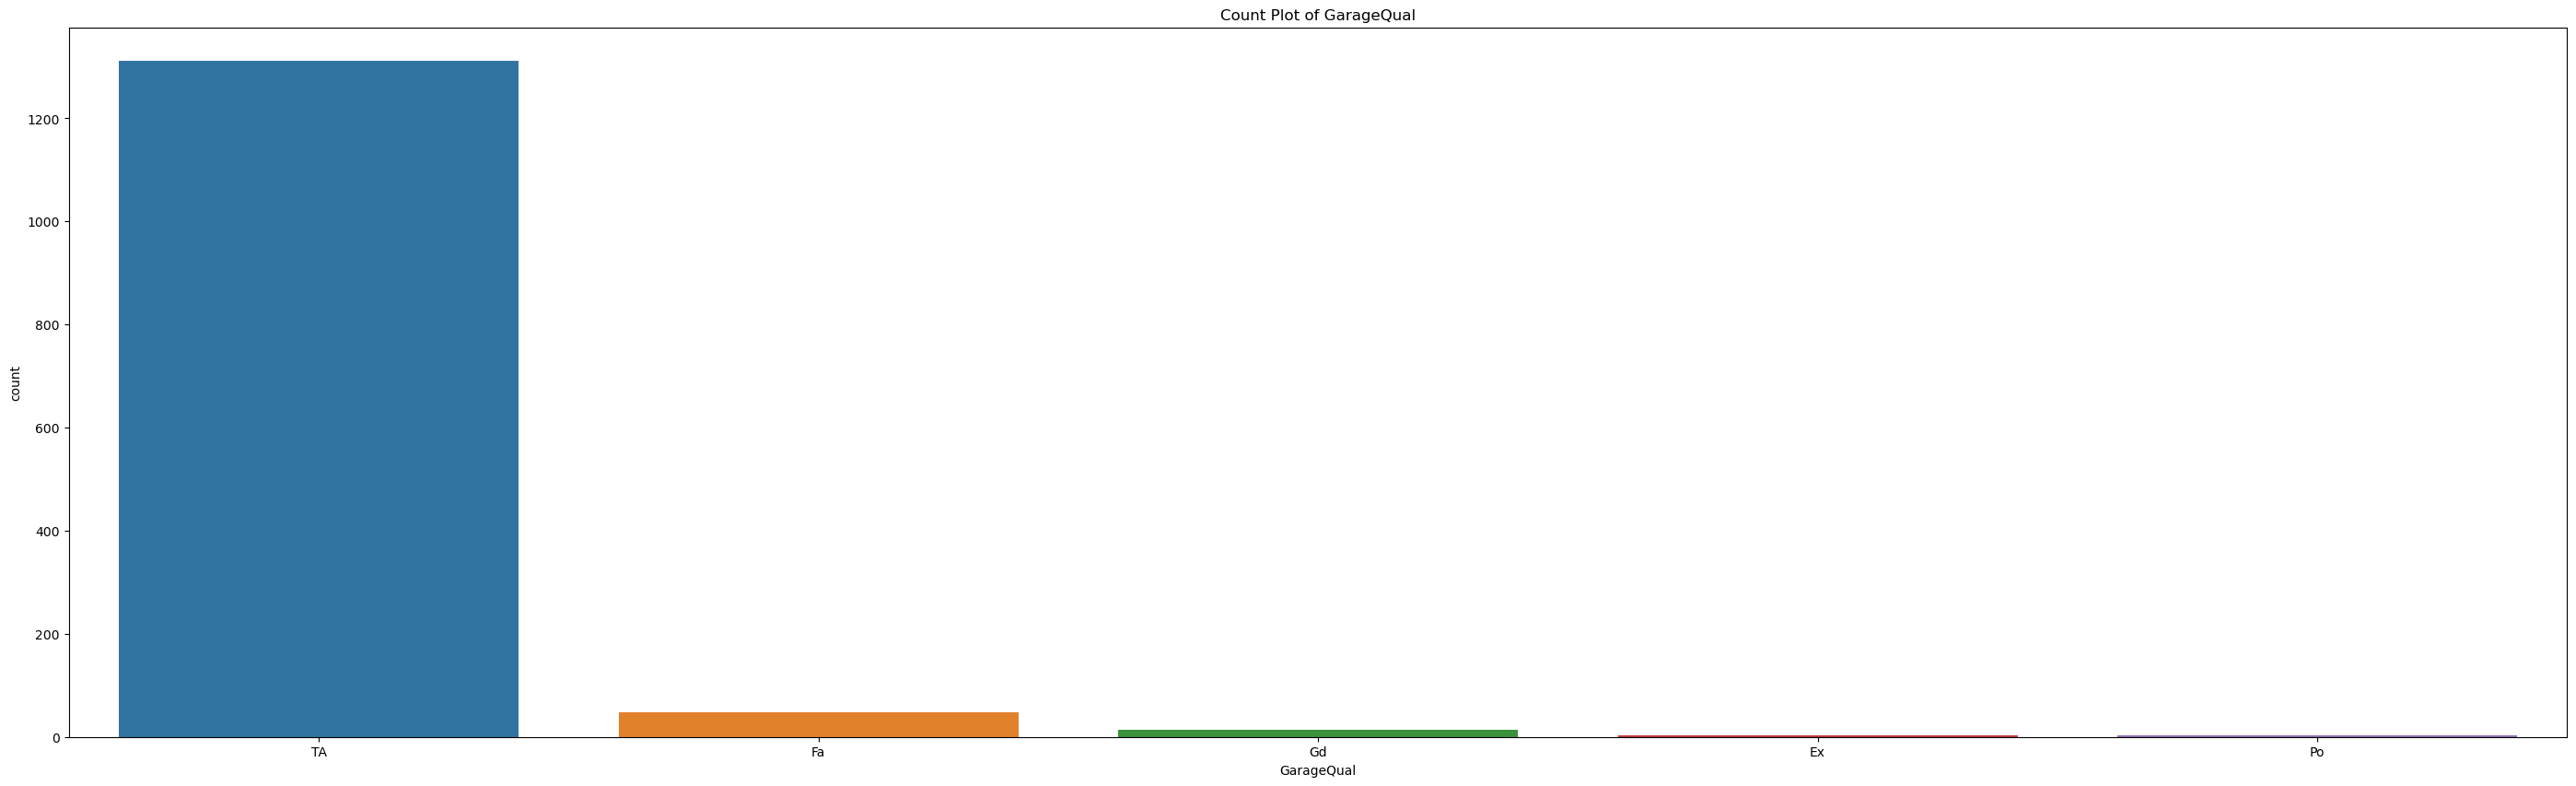

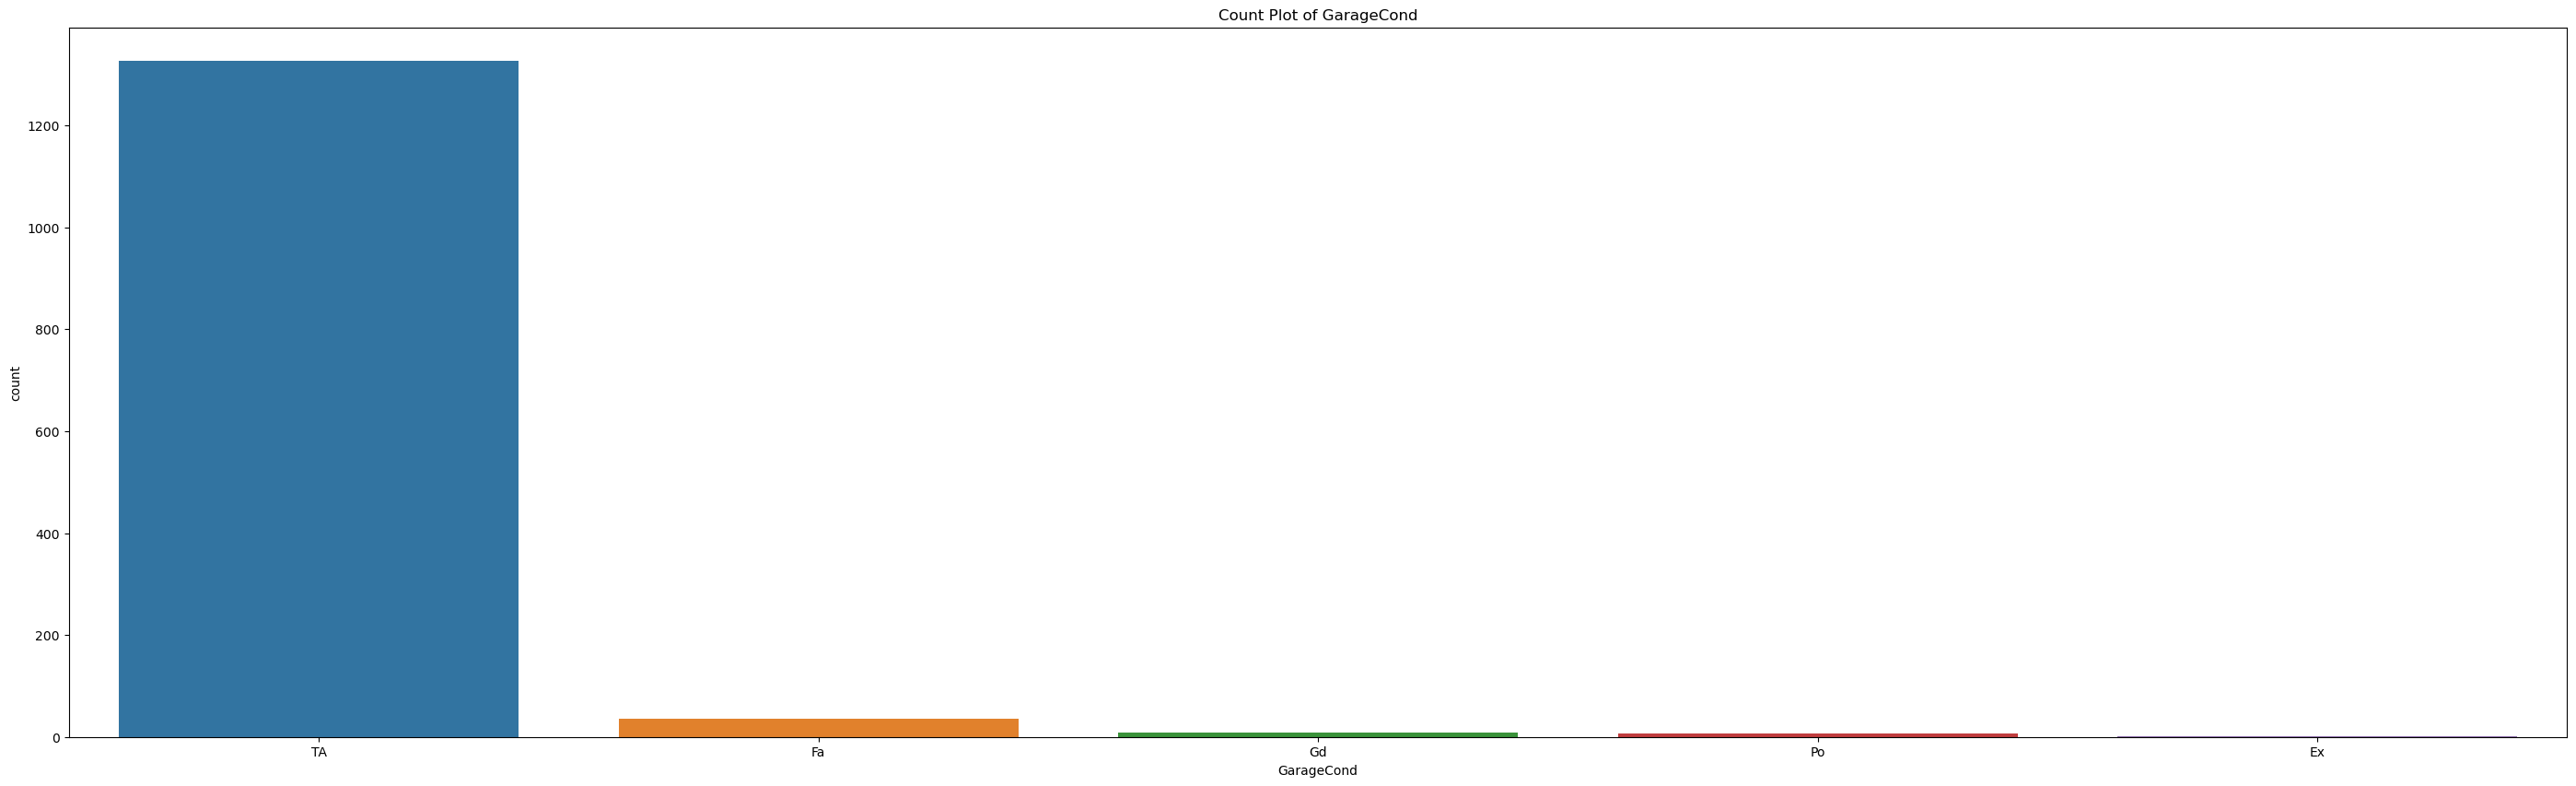

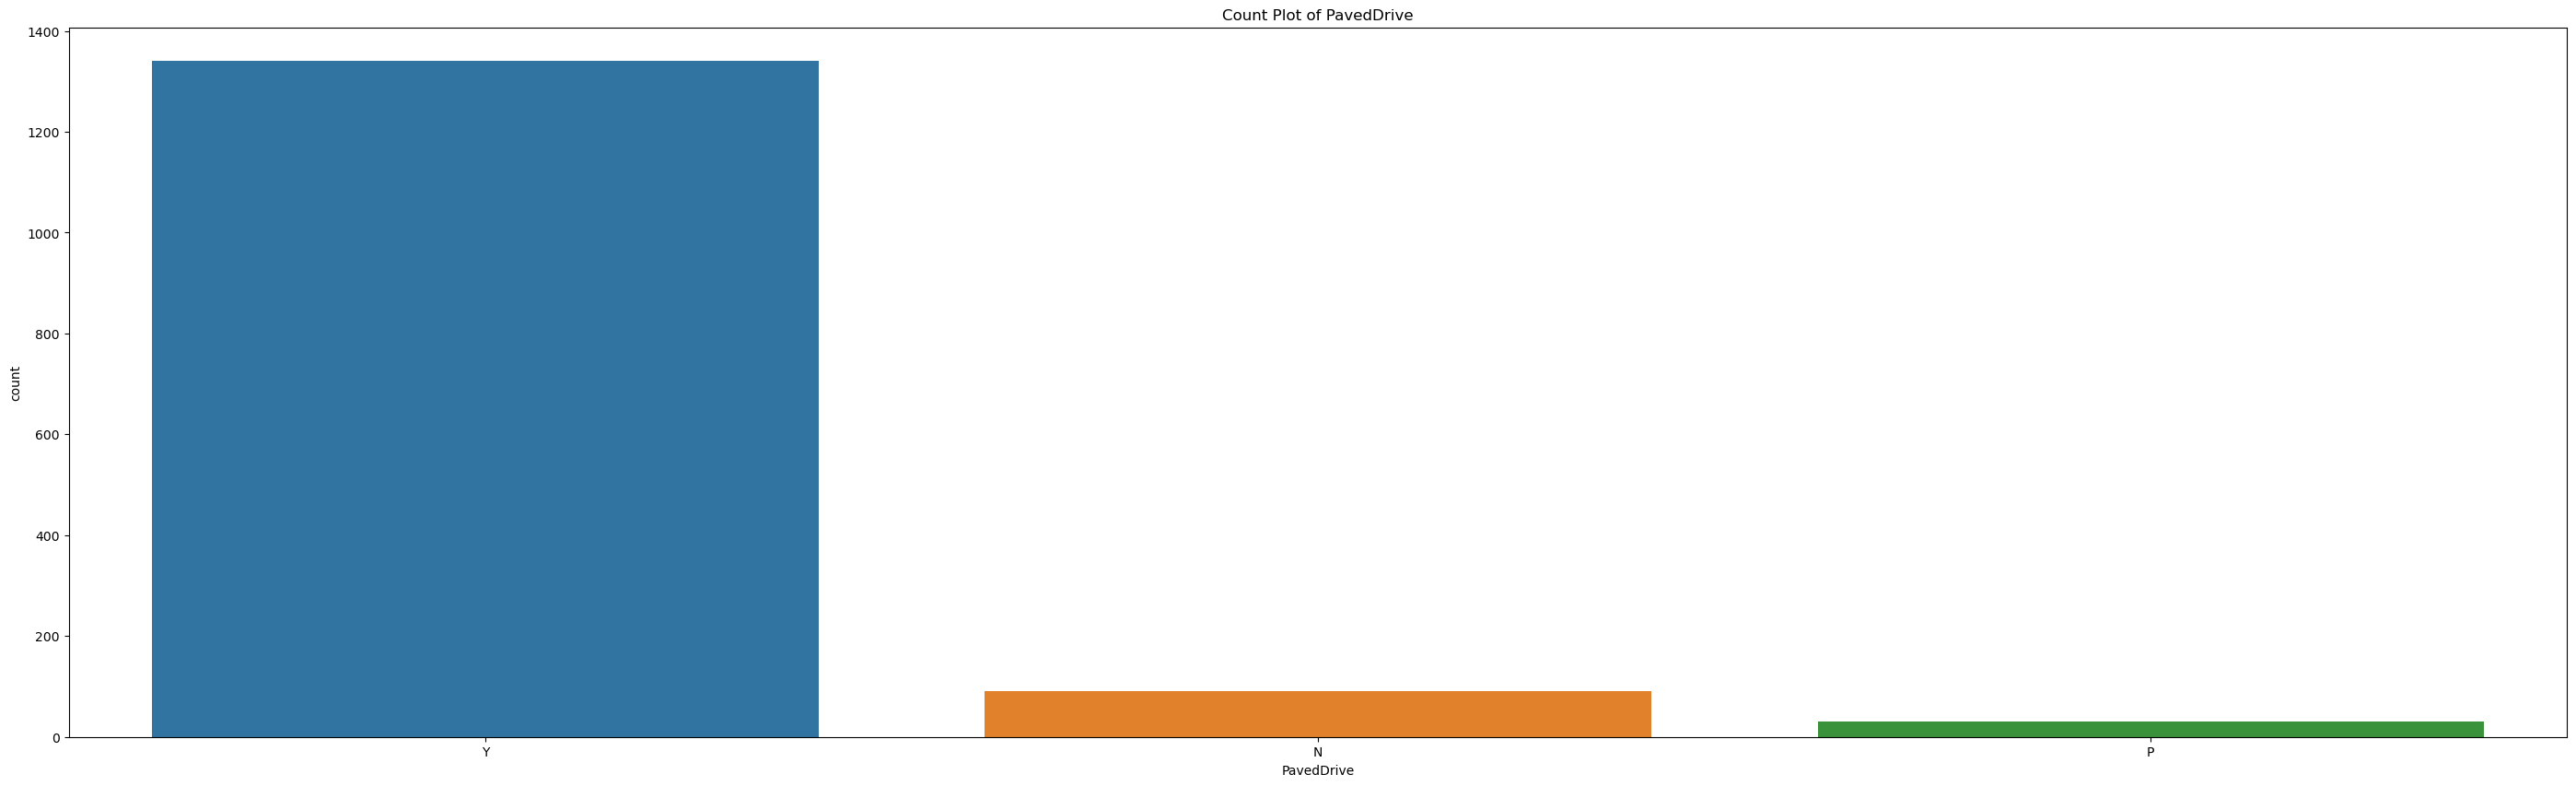

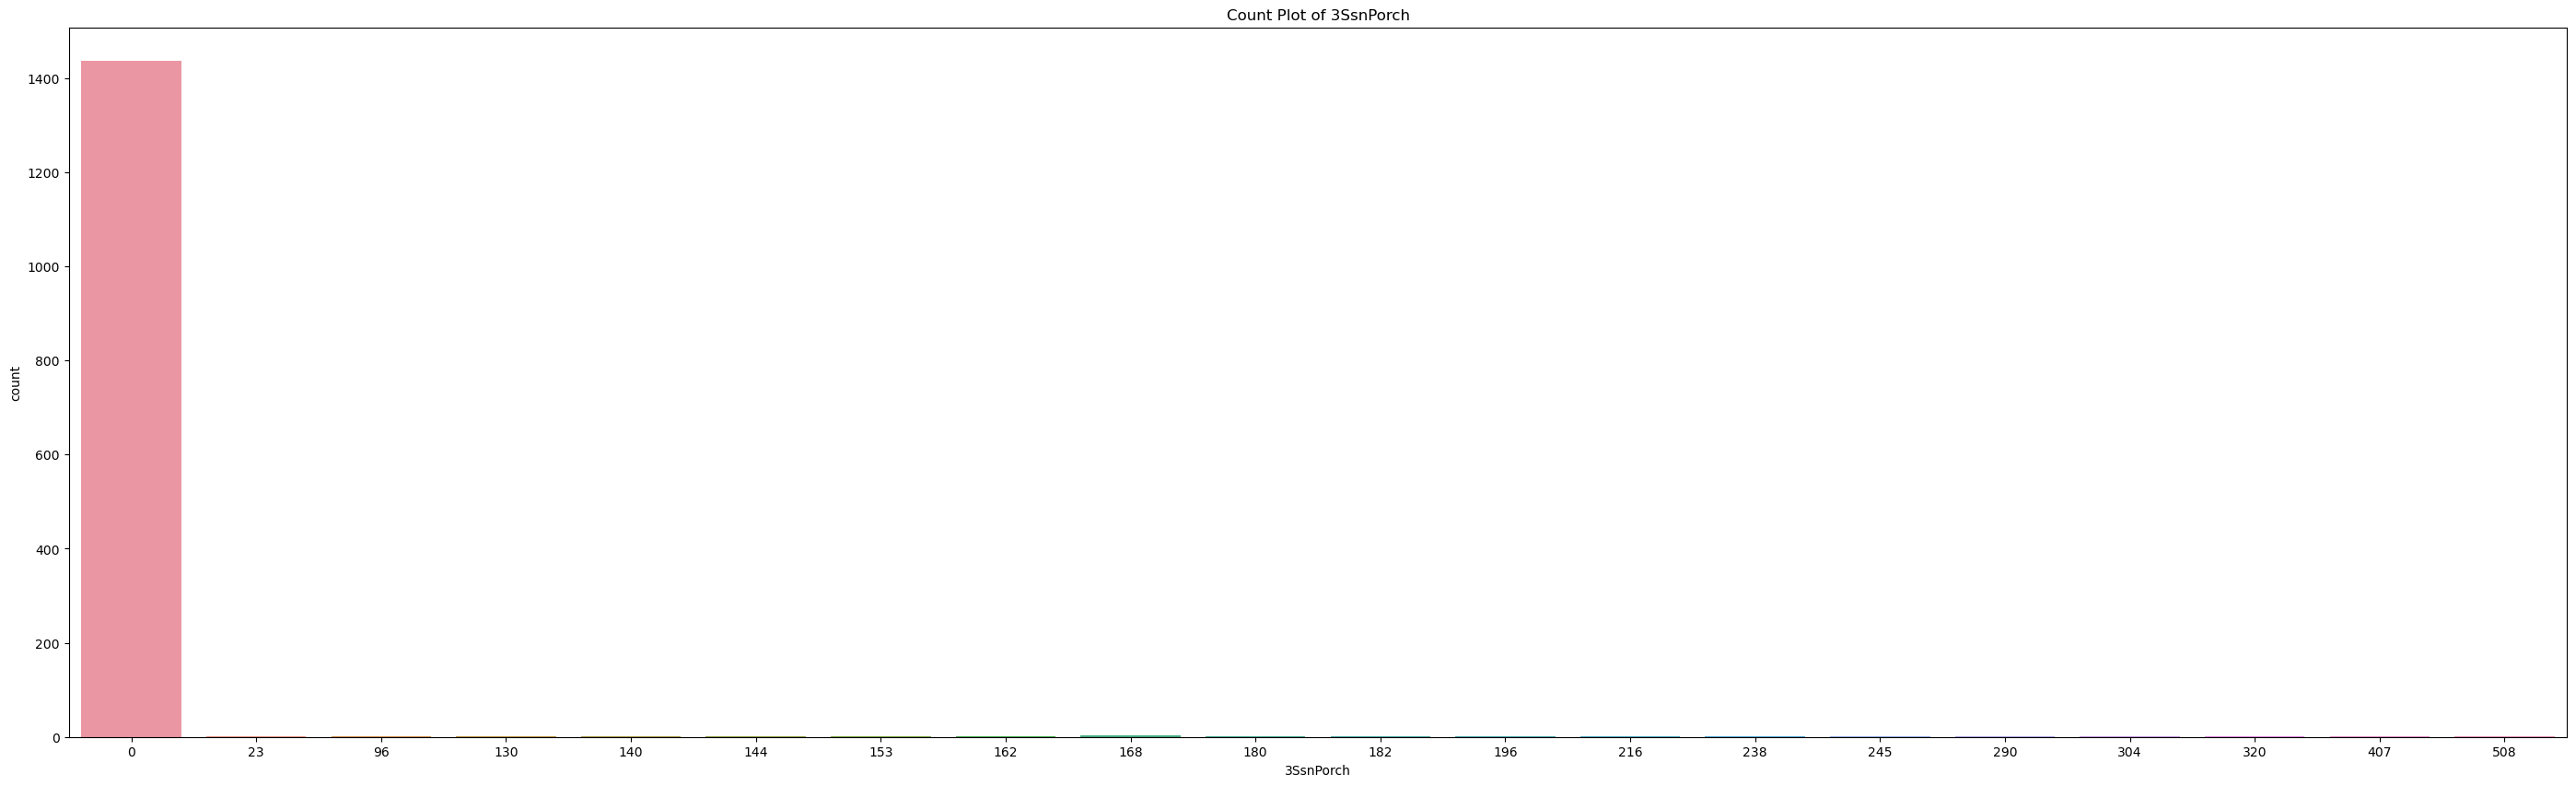

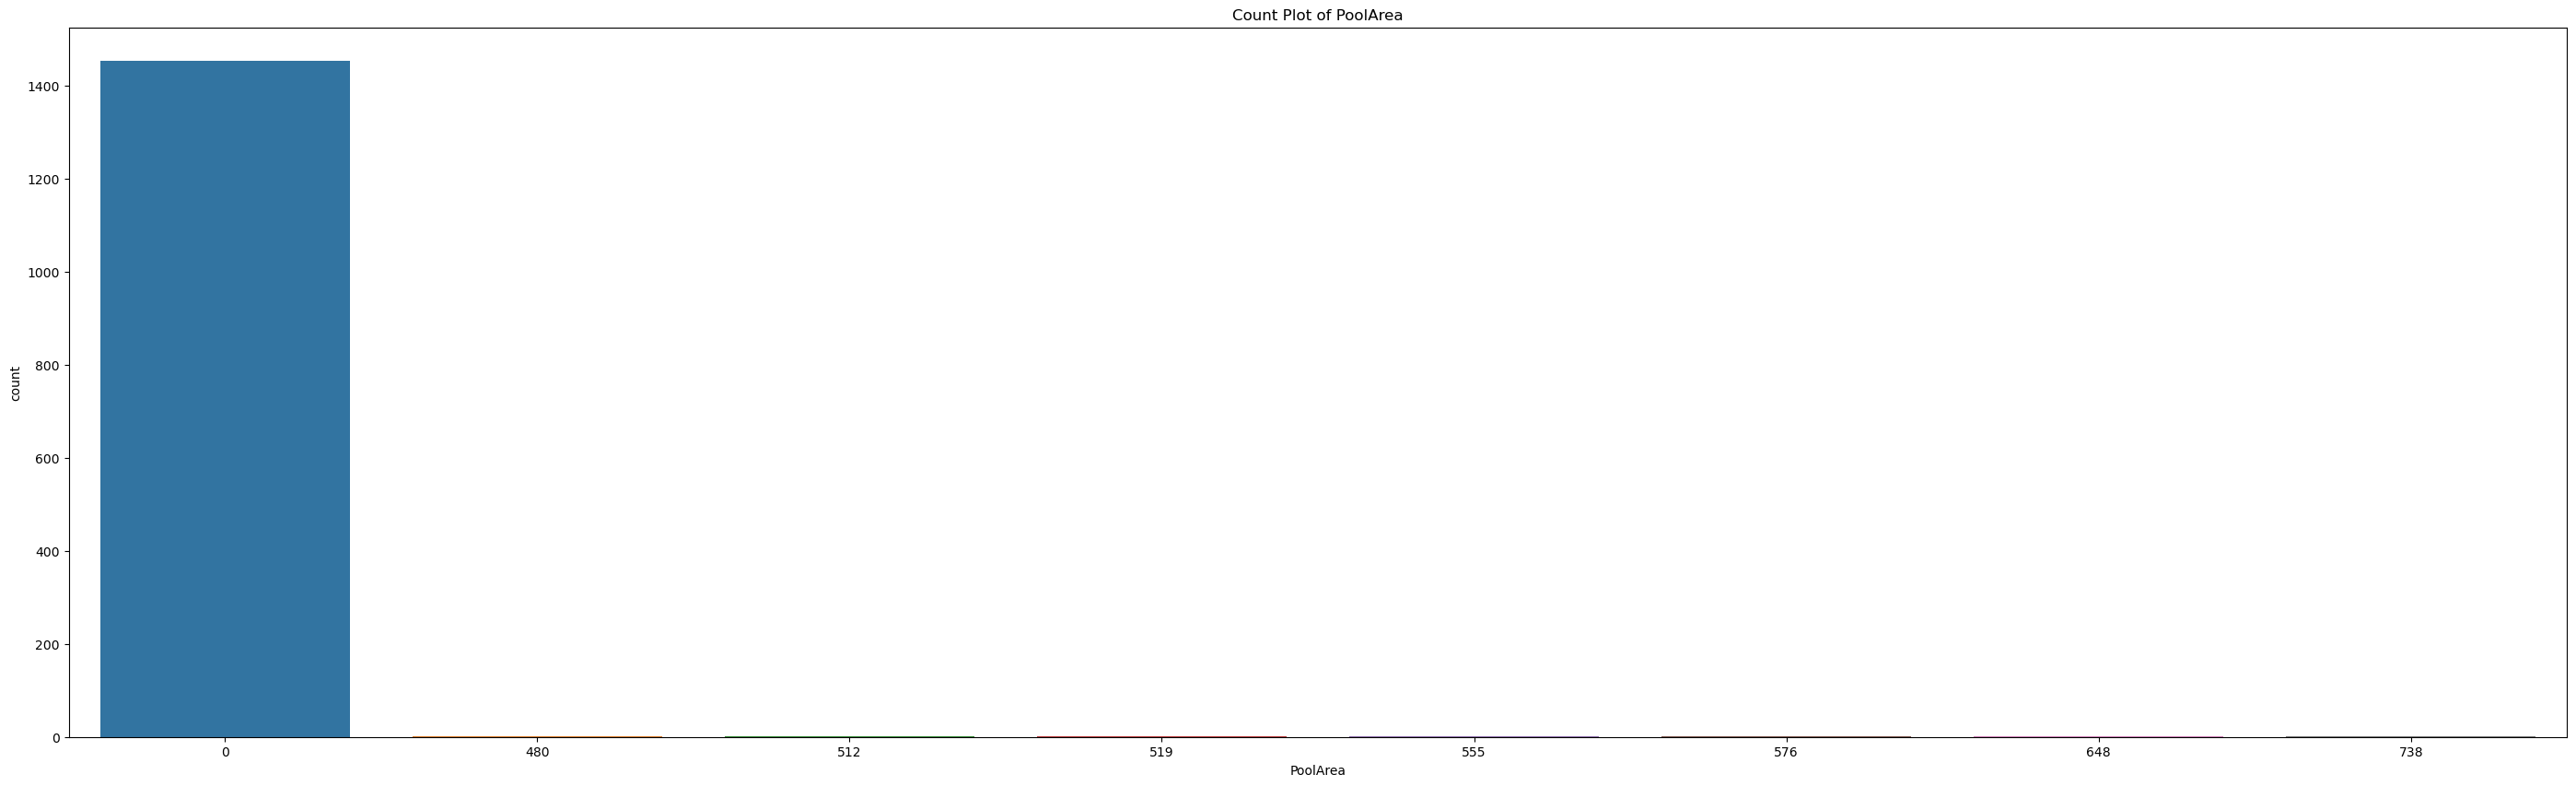

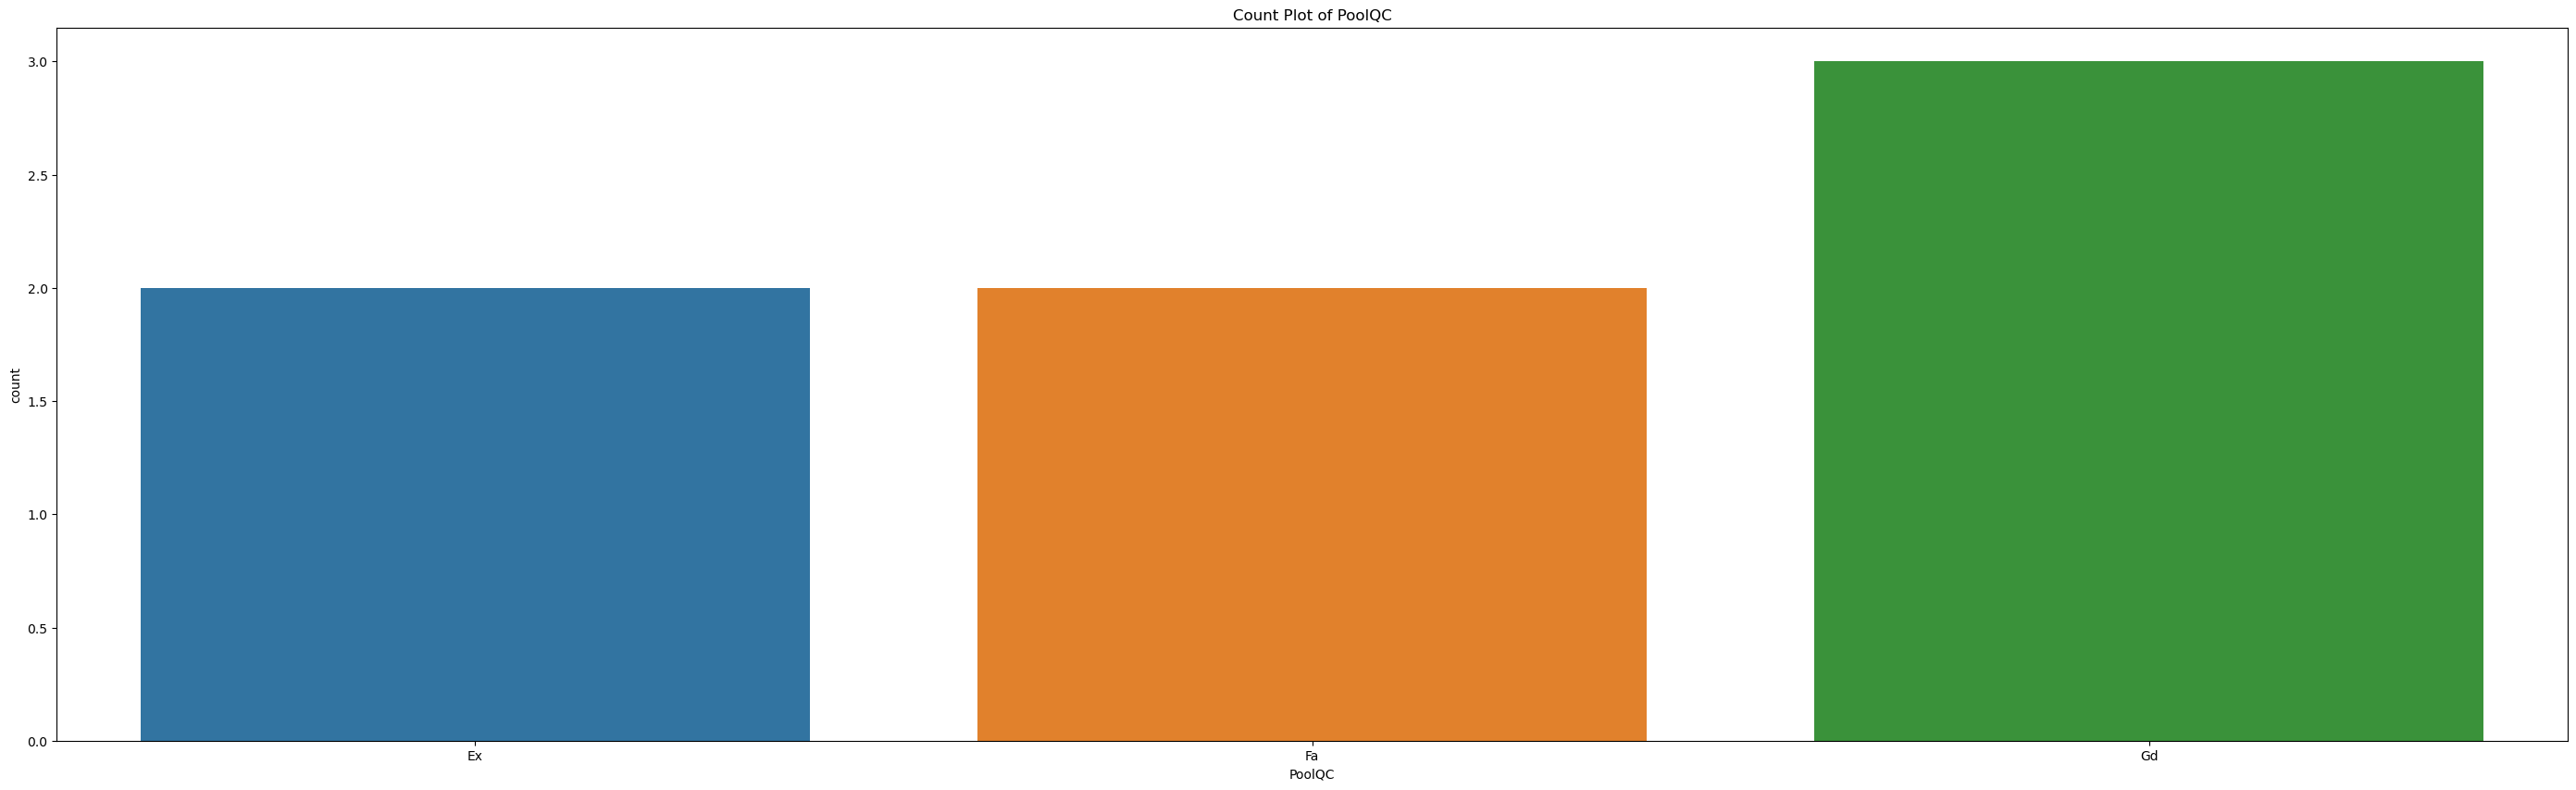

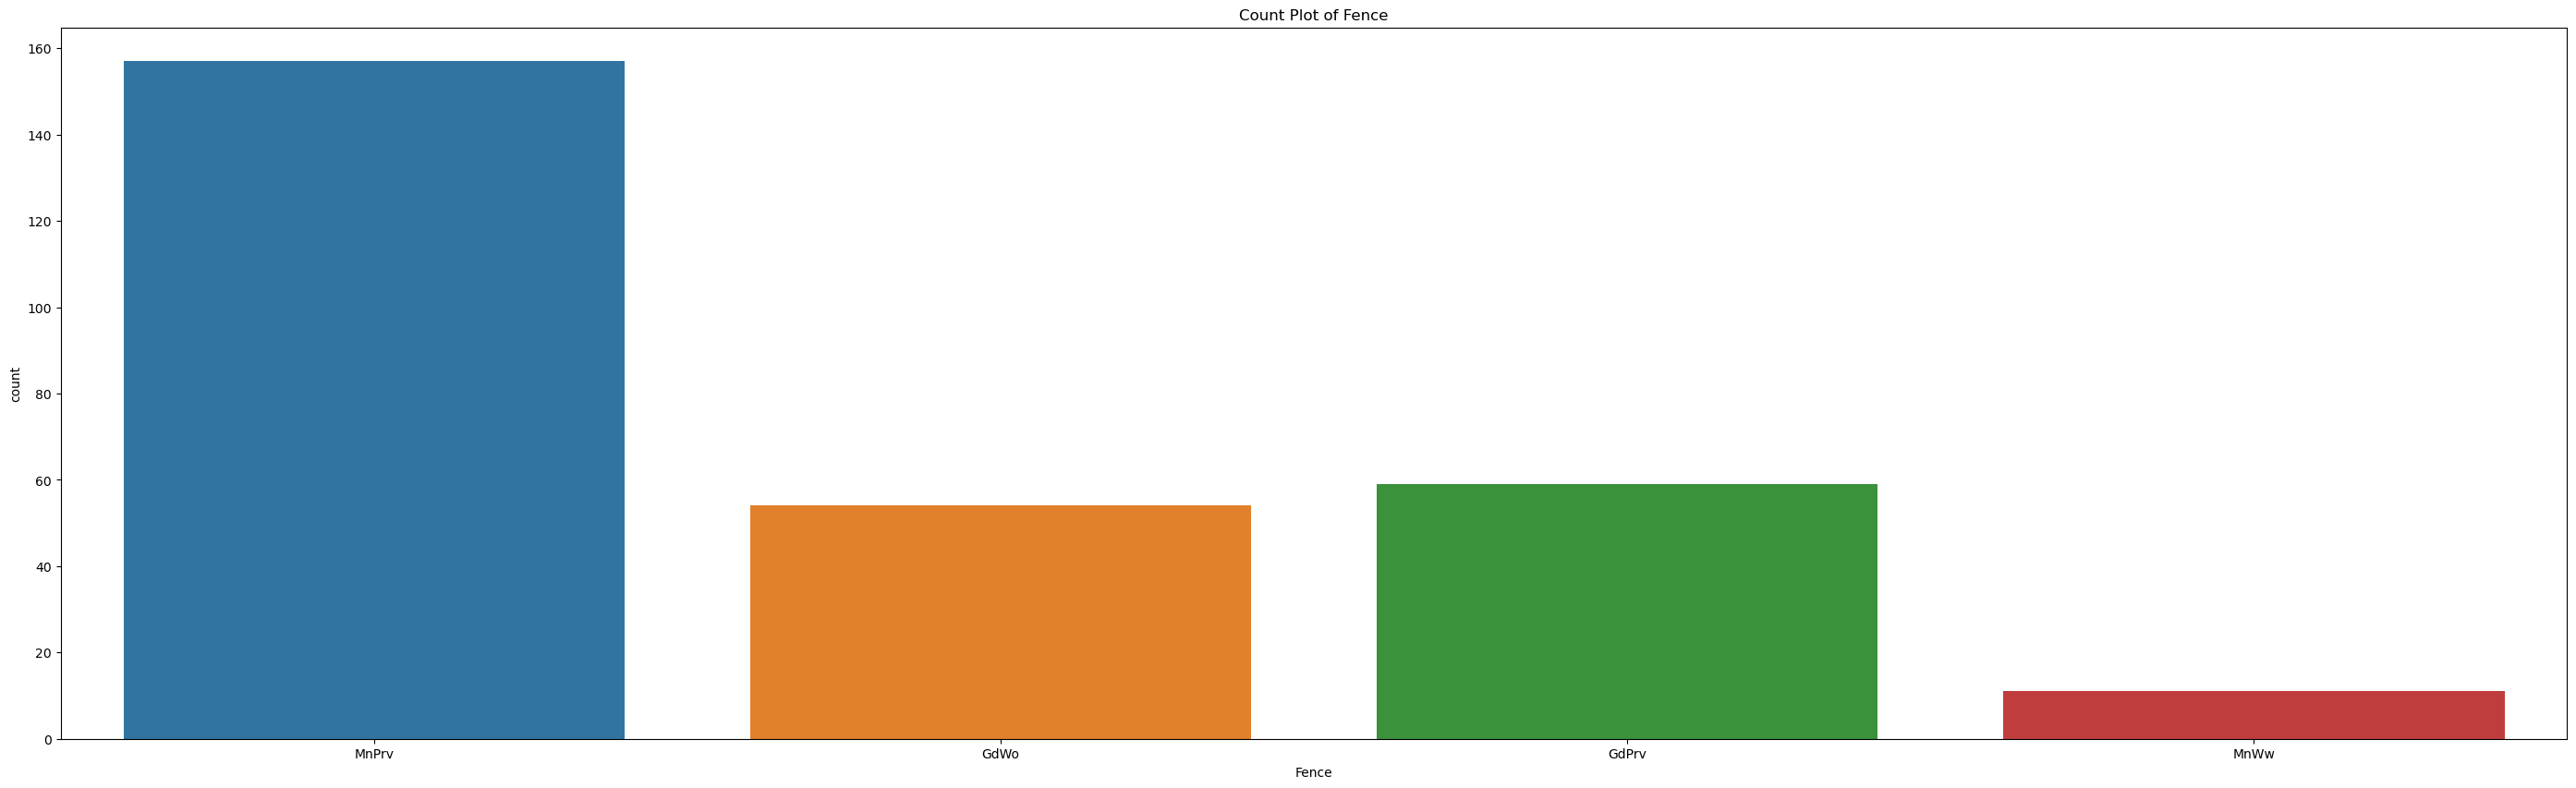

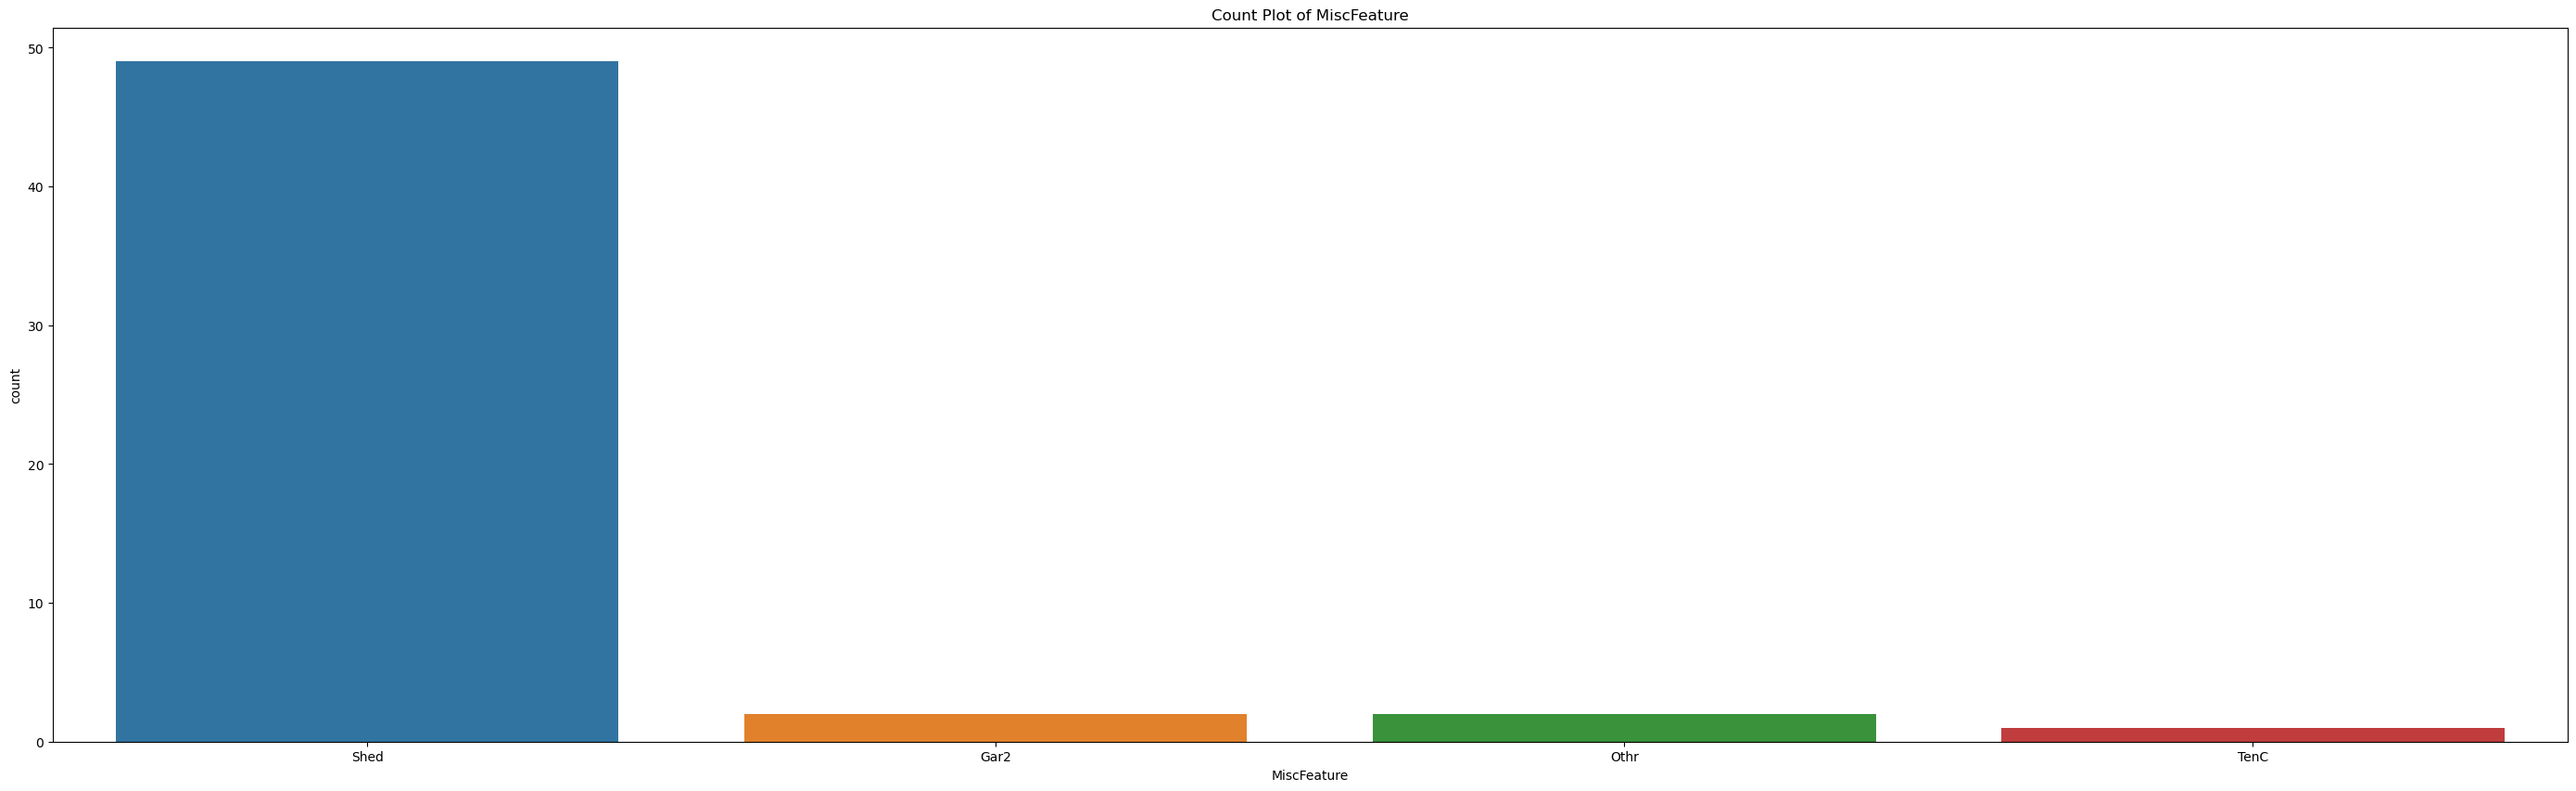

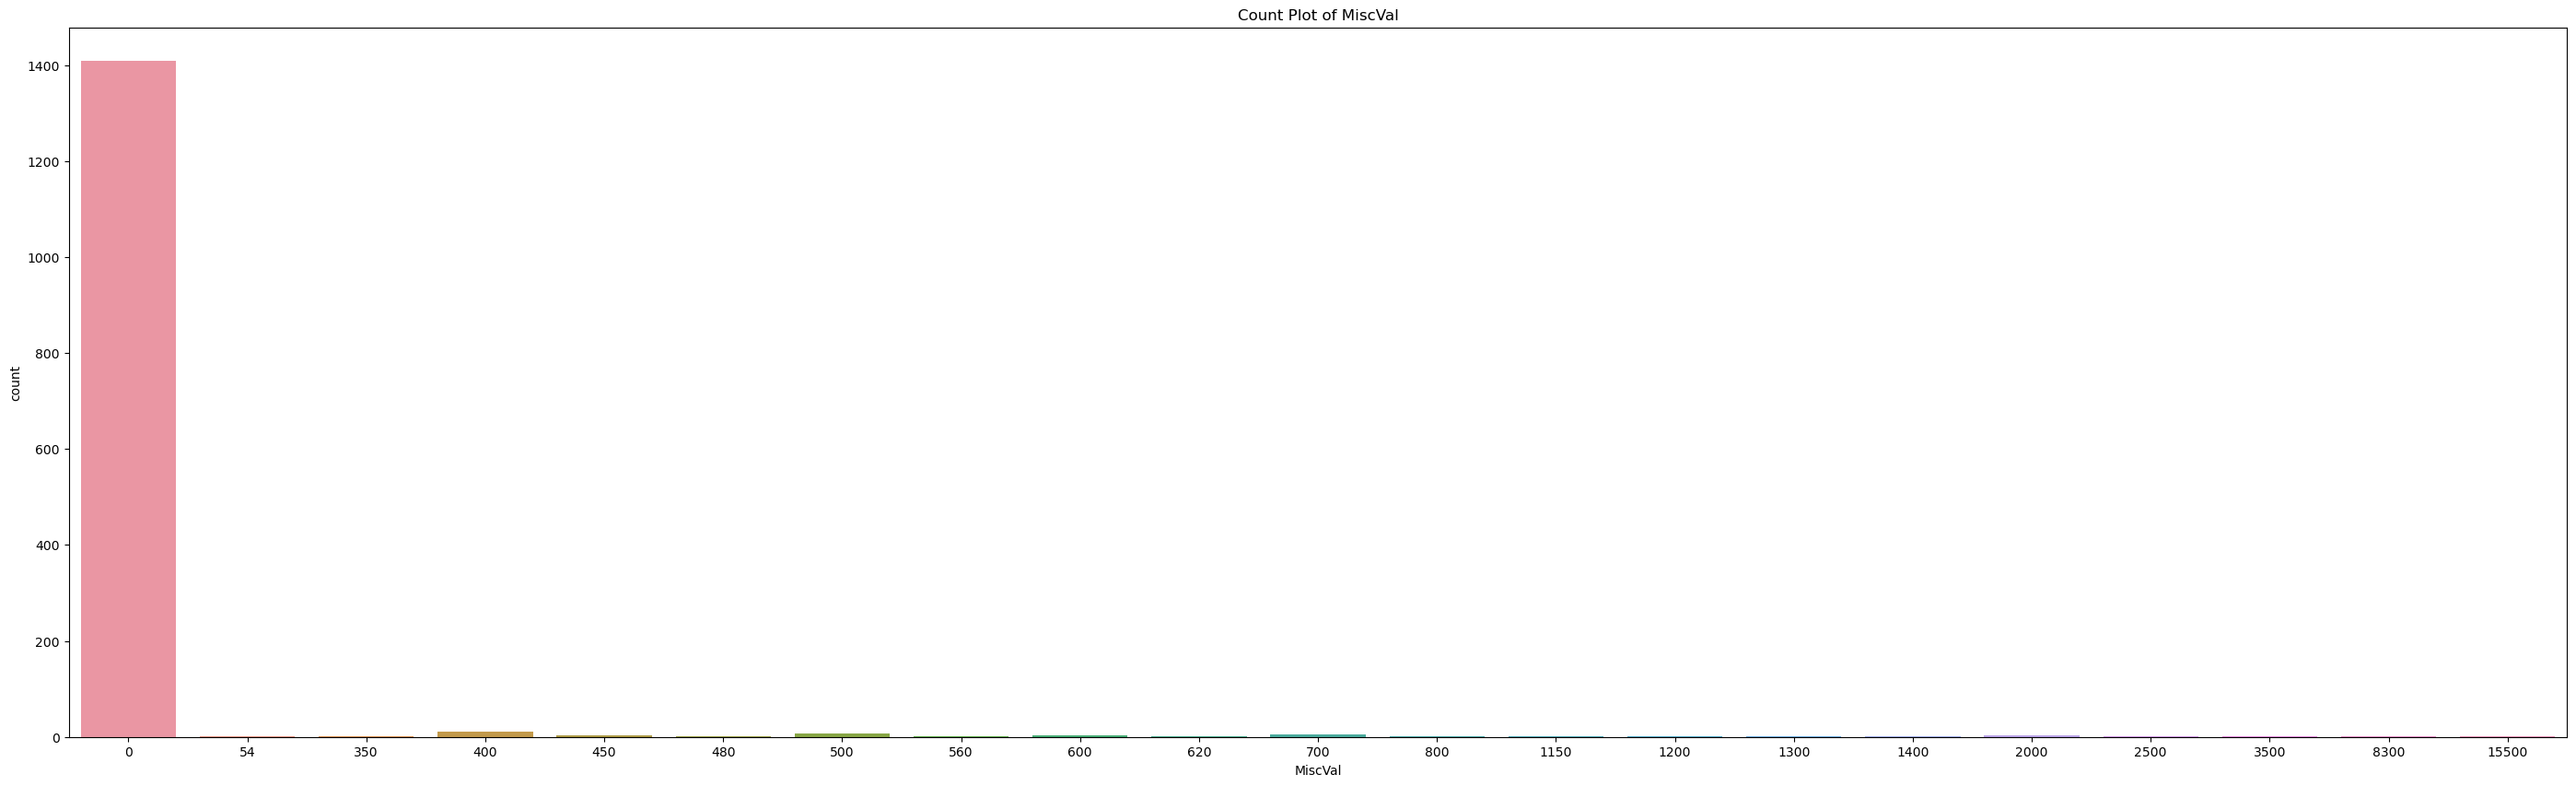

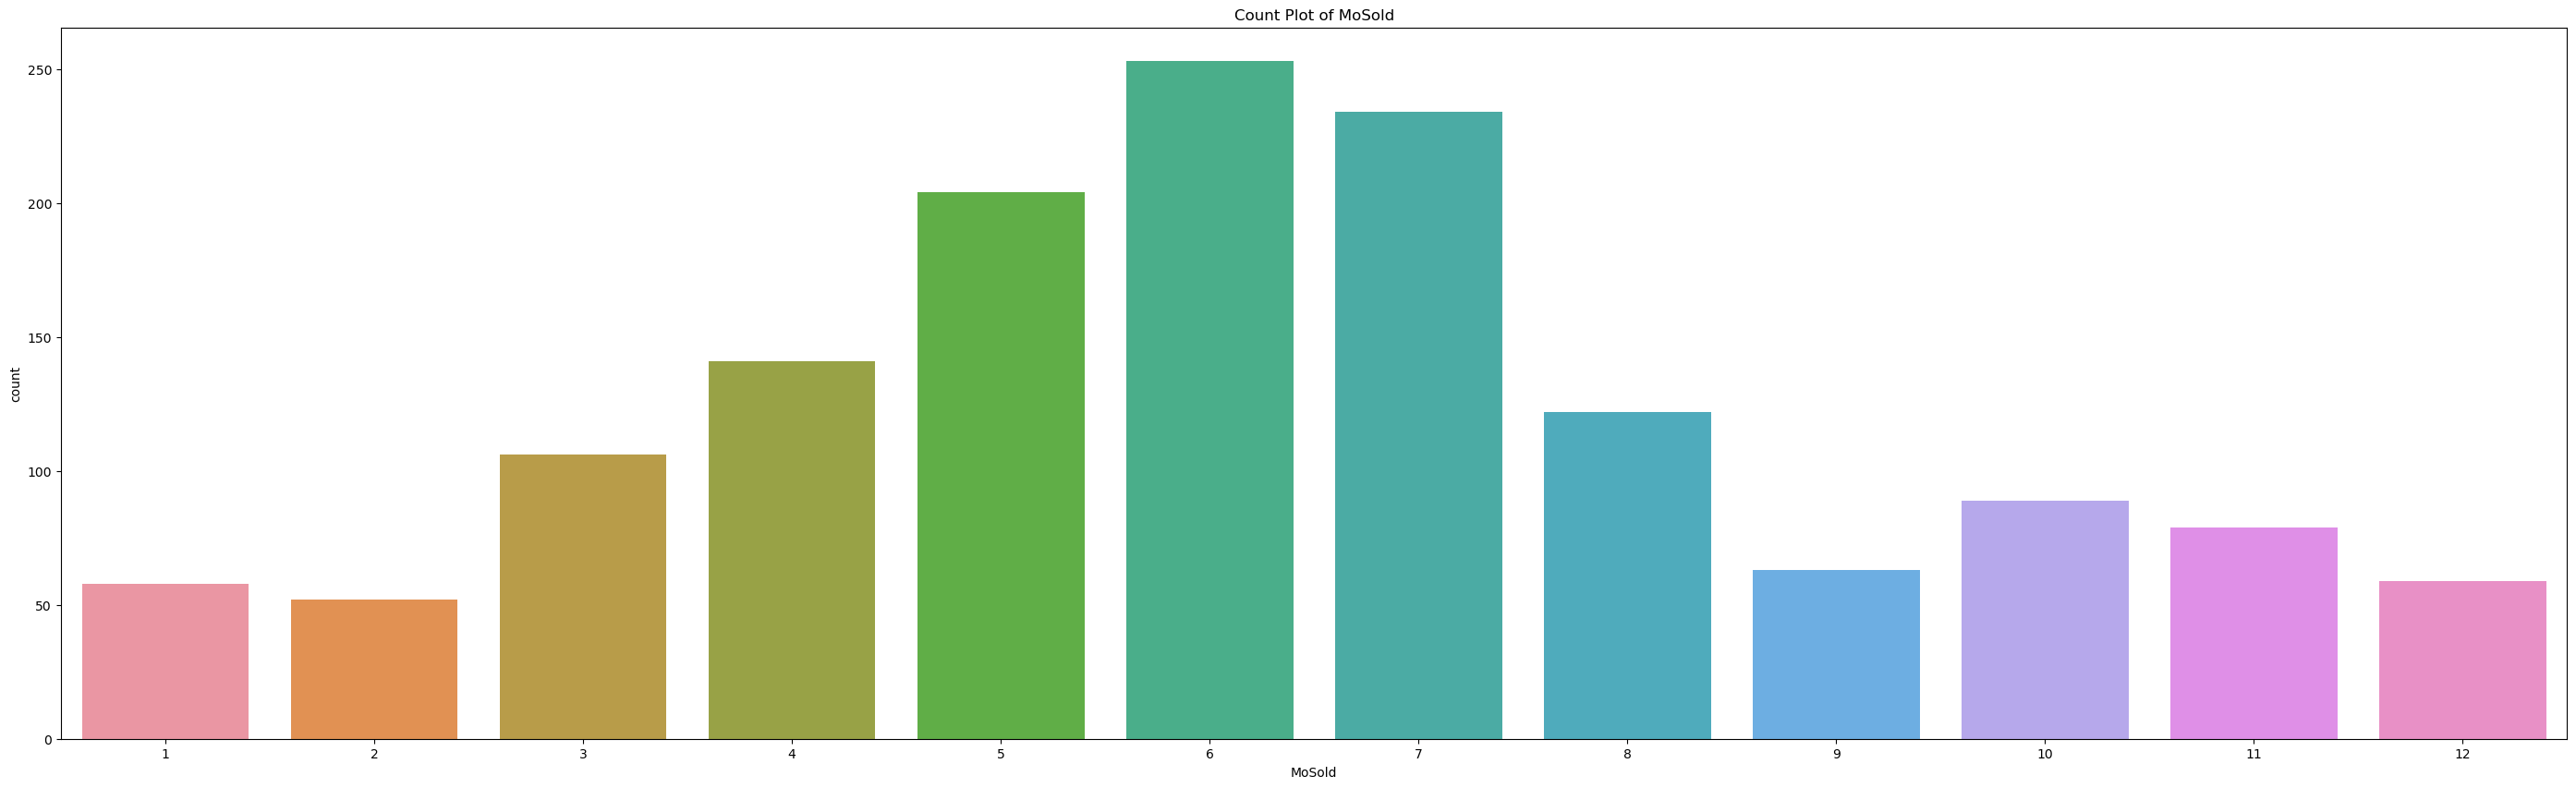

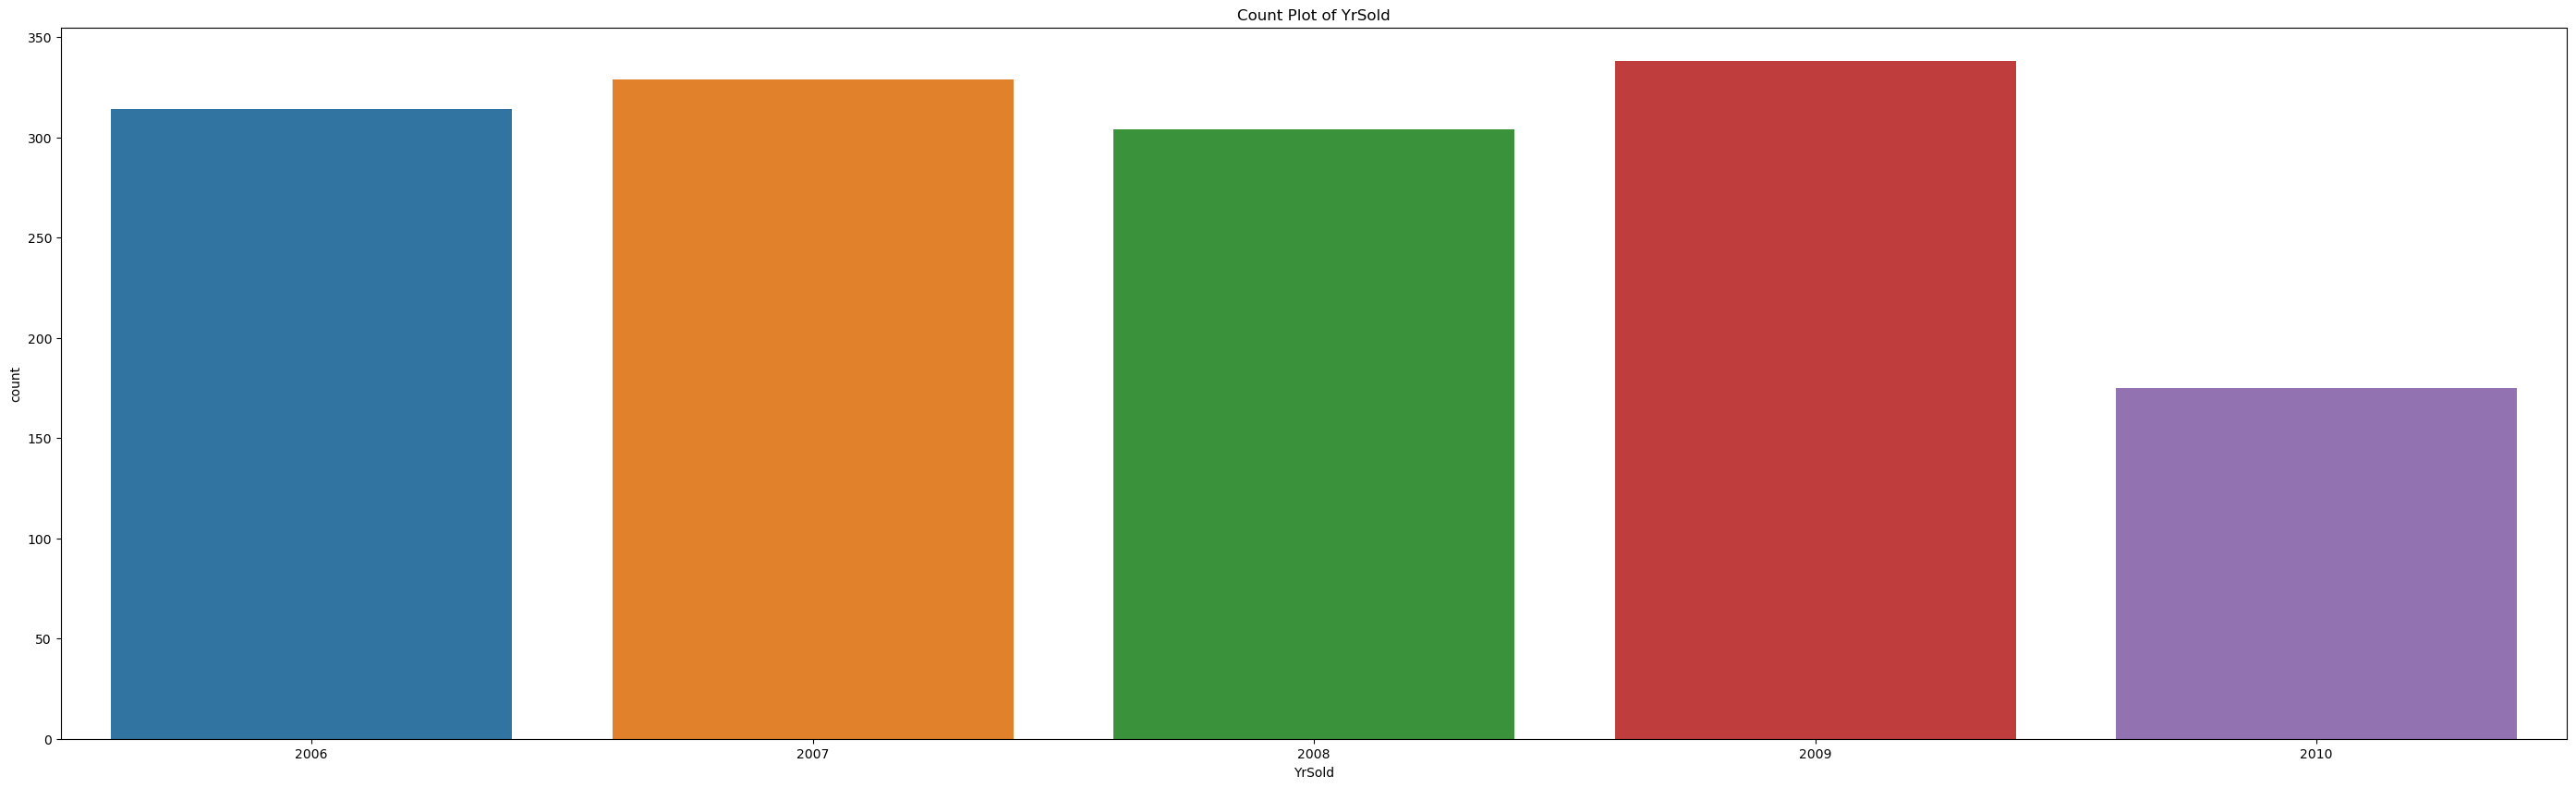

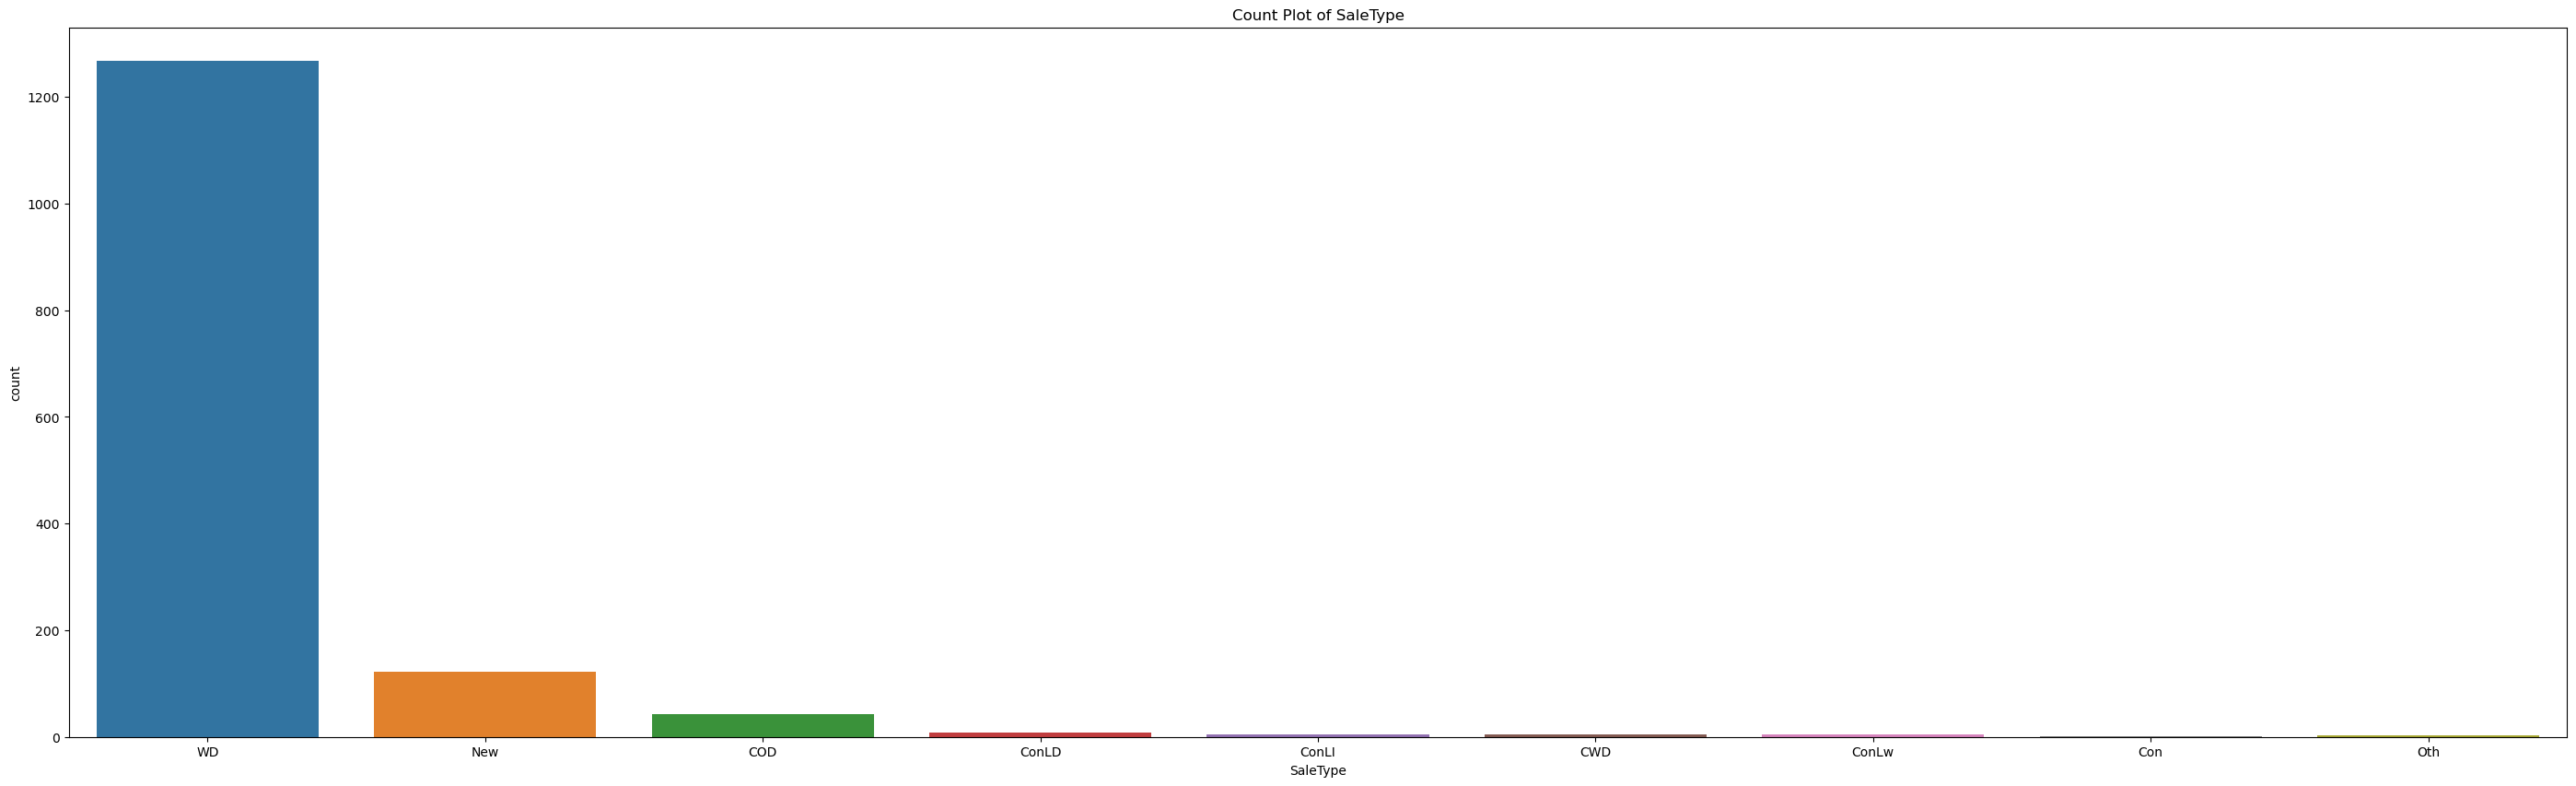

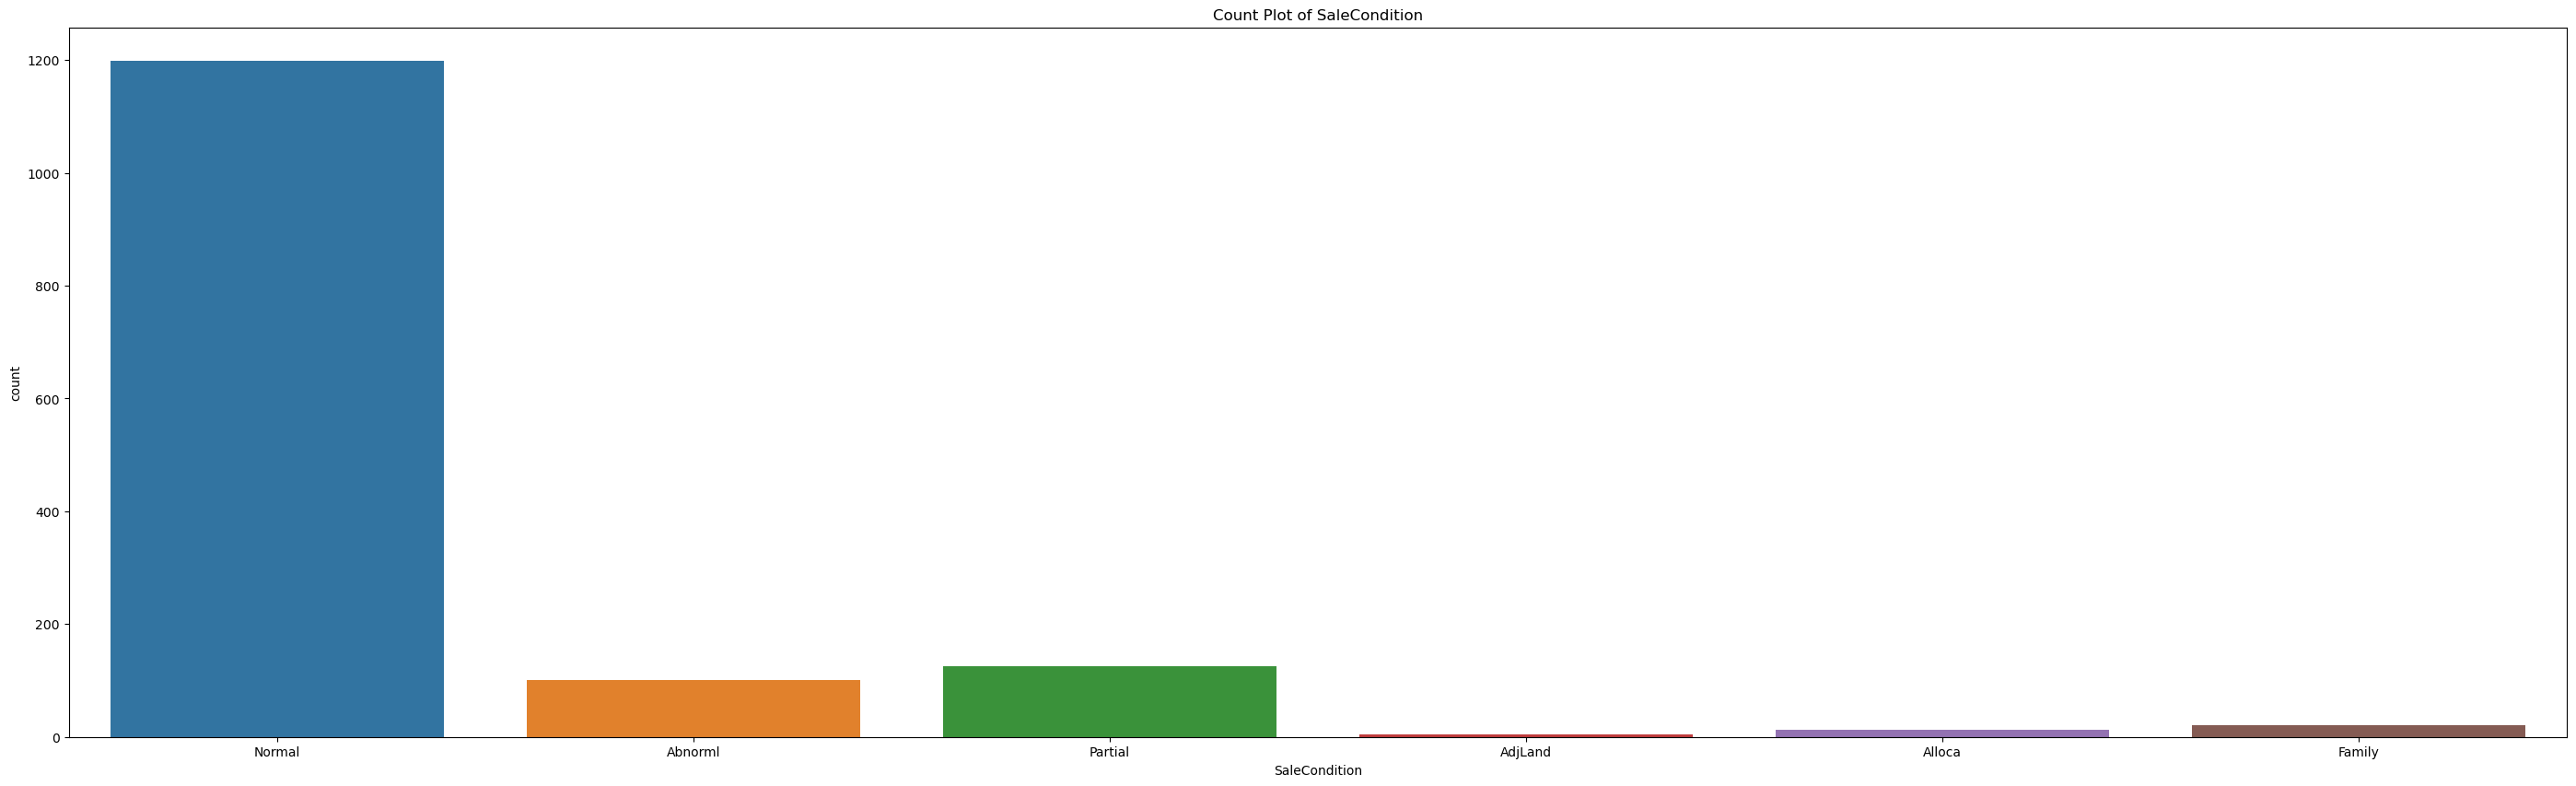

In [194]:
# Bar plot/Count Plot for visualizing categorical variables.
import seaborn as sns
import matplotlib.pyplot as plt

for col in categorical_columns:
    plt.figure(figsize=(35, 10))
    sns.countplot(x=col, data=df)
    plt.title(f'Count Plot of {col}')
    plt.show()


In [195]:
# Function to calculate dominant value percentage and other values' total percentage in each categorical coloumns.
def dominant_value_percentage(df):
    result = {}
    for col in categorical_columns:
        dominant_value_count = df[col].value_counts().iloc[0]
        total_count = df[col].count()
        dominant_value_percent = 100 * dominant_value_count / total_count
        other_values_percent = 100 * (total_count - dominant_value_count) / total_count
        result[col] = {'Dominant Value Percentage': dominant_value_percent, 'Other Values Percentage': other_values_percent}
    return pd.DataFrame(result).transpose()

# Calculate percentages
percentages_df = dominant_value_percentage(df)

# Display the result
print(percentages_df)

               Dominant Value Percentage  Other Values Percentage
MSSubClass                     36.712329                63.287671
MSZoning                       78.835616                21.164384
Street                         99.589041                 0.410959
Alley                          54.945055                45.054945
LotShape                       63.356164                36.643836
...                                  ...                      ...
MiscVal                        96.438356                 3.561644
MoSold                         17.328767                82.671233
YrSold                         23.150685                76.849315
SaleType                       86.780822                13.219178
SaleCondition                  82.054795                17.945205

[62 rows x 2 columns]


In [197]:
#Finding the list of the categorical columns having dominant value more than 80%
def columns_with_high_dominance(df, threshold=80):
    result = {}
    for col in categorical_columns:
        value_counts = df[col].value_counts(normalize=True)
        dominant_value_percent = value_counts.iloc[0] * 100
        if dominant_value_percent > threshold:
            result[col] = dominant_value_percent
    return result

# Find columns with more than 80% dominant value percentage
dominant_columns = columns_with_high_dominance(df, threshold=80)

# Display the result
print(dominant_columns)

{'Street': 99.58904109589041, 'LandContour': 89.7945205479452, 'Utilities': 99.93150684931507, 'LandSlope': 94.65753424657535, 'Condition1': 86.3013698630137, 'Condition2': 98.97260273972603, 'BldgType': 83.56164383561644, 'RoofMatl': 98.21917808219179, 'ExterCond': 87.8082191780822, 'BsmtCond': 92.12930428671821, 'BsmtFinType2': 88.32630098452883, 'Heating': 97.80821917808218, 'CentralAir': 93.4931506849315, 'Electrical': 91.43248800548321, 'LowQualFinSF': 98.21917808219179, 'BsmtHalfBath': 94.3835616438356, 'KitchenAbvGr': 95.34246575342465, 'Functional': 93.15068493150685, 'GarageQual': 95.06889050036258, 'GarageCond': 96.15663524292965, 'PavedDrive': 91.78082191780823, '3SsnPorch': 98.35616438356163, 'PoolArea': 99.52054794520548, 'MiscFeature': 90.74074074074075, 'MiscVal': 96.43835616438356, 'SaleType': 86.78082191780821, 'SaleCondition': 82.05479452054794}


There are few categorical columns having more than 80% of the entries having sigle value dominance.Means, It can be considered not giving muh significance in the model. So those categorical columns can be dropped.

In [66]:
dominant_columns.keys()

dict_keys(['Street', 'LandContour', 'Utilities', 'LandSlope', 'Condition1', 'Condition2', 'BldgType', 'RoofMatl', 'ExterCond', 'BsmtCond', 'BsmtFinType2', 'Heating', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtHalfBath', 'KitchenAbvGr', 'Functional', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch', 'PoolArea', 'MiscFeature', 'MiscVal', 'SaleType', 'SaleCondition'])

In [55]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Numerical Variables Visualization

In [198]:
df_numeric = df.select_dtypes(include=['float64','int64'])
df_numeric.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [199]:
df_numeric.drop(columns =numerical_categorical,inplace = True)

In [200]:
df_numeric = df_numeric.drop(['Id'],axis = 1)
df_numeric.head()

,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
0,65.0,8450,2003,196.0,706,0,150,856,856,854,1710,2003.0,548,0,61,0,0,208500
1,80.0,9600,1976,0.0,978,0,284,1262,1262,0,1262,1976.0,460,298,0,0,0,181500
2,68.0,11250,2001,162.0,486,0,434,920,920,866,1786,2001.0,608,0,42,0,0,223500
3,60.0,9550,1915,0.0,216,0,540,756,961,756,1717,1998.0,642,0,35,272,0,140000
4,84.0,14260,2000,350.0,655,0,490,1145,1145,1053,2198,2000.0,836,192,84,0,0,250000


In [201]:
df_numeric.shape

(1460, 18)

In [202]:
# correlation matrix
df_numeric.corr()

,LotFrontage,LotArea,YearBuilt,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,SalePrice
LotFrontage,1.000000,0.426095,0.123349,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.402797,0.070250,0.344997,0.088521,0.151972,0.010700,0.041383,0.351799
LotArea,0.426095,1.000000,0.014228,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.263116,-0.024947,0.180403,0.171698,0.084774,-0.018340,0.043160,0.263843
YearBuilt,0.123349,0.014228,1.000000,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,0.199010,0.825667,0.478954,0.224880,0.188686,-0.387268,-0.050364,0.522897
MasVnrArea,0.193458,0.104160,0.315707,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,0.390857,0.252691,0.373066,0.159718,0.125703,-0.110204,0.061466,0.477493
BsmtFinSF1,0.233633,0.214103,0.249503,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,0.208171,0.153484,0.296970,0.204306,0.111761,-0.102303,0.062021,0.386420
BsmtFinSF2,0.049900,0.111170,-0.049107,-0.072319,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,-0.009640,-0.088011,-0.018227,0.067898,0.003093,0.036543,0.088871,-0.011378
BsmtUnfSF,0.132644,-0.002618,0.149040,0.114442,-0.495251,-0.209294,1.000000,0.415360,0.317987,0.004469,0.240257,0.190708,0.183303,-0.005316,0.129005,-0.002538,-0.012579,0.214479
TotalBsmtSF,0.392075,0.260833,0.391452,0.363936,0.522396,0.104810,0.415360,1.000000,0.819530,-0.174512,0.454868,0.322445,0.486665,0.232019,0.247264,-0.095478,0.084489,0.613581
1stFlrSF,0.457181,0.299475,0.281986,0.344501,0.445863,0.097117,0.317987,0.819530,1.000000,-0.202646,0.566024,0.233449,0.489782,0.235459,0.211671,-0.065292,0.088758,0.605852
2ndFlrSF,0.080177,0.050986,0.010308,0.174561,-0.137079,-0.099260,0.004469,-0.174512,-0.202646,1.000000,0.687501,0.070832,0.138347,0.092165,0.208026,0.061989,0.040606,0.319334


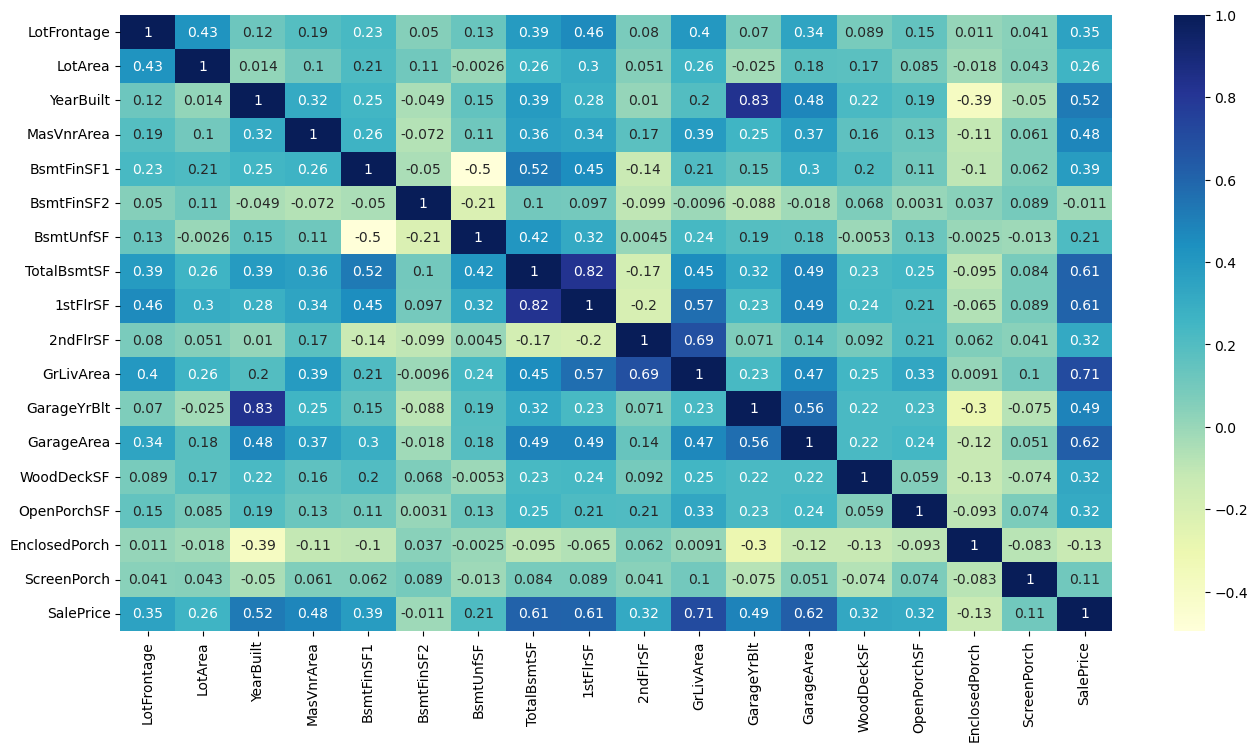

In [203]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(df_numeric.corr(), cmap="YlGnBu", annot = True)
plt.show()

##### The Heatmap shows some useful insights:

Correlation of SalePrice with independent variables:
- SalePrice is highly correlated with
TotalBsmtSF,1stFlrSF,GrLivArea,GaarageArea

Correlation among independent variables:
- YearBuilt & GarageYrBlt
- TotalBsmtSF & 1stFlrSF
- 1stFlrSF & GrLivArea
- 2ndFlrSF & GrLivArea
- GaarageArea & GarageYrBlt

As per the analysis, (1stFlrSF , 2ndFlrSF & GarageYrBlt) can be dropped.


##### Ordinal Type Categories can be encoded with label type encoding
- LotShape 
- LandContour  
- LandSlope
- OverallQual
- OverallCond
- ExterQual
- ExterCond
- BsmtQual
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- HeatingQC
- KitchenQual
- Functional
- FireplaceQu
- GarageFinish
- GarageQual
- GarageCond
- PoolQC
- Fence


## 2. Data Cleaning

In [205]:
missing_percentage = 100*df.isnull().mean()
sorted_missing_percentage = missing_percentage.sort_values(ascending=False)
sorted_missing_percentage

PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
MasVnrType     59.726027
                 ...    
ExterQual       0.000000
Exterior2nd     0.000000
Exterior1st     0.000000
RoofMatl        0.000000
SalePrice       0.000000
Length: 81, dtype: float64

###### Columns having more than or equal to 40% having null values can be dropped.

In [206]:
cols_to_drop = missing_percentage[missing_percentage >= 40].index
cols_to_drop

Index(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature'], dtype='object')

In [ ]:
df.drop(columns = cols_to_drop,inplace=True)
df.shape

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

In [210]:
missing_percentage_rows = 100*df.isnull().mean(axis=1)
rows_to_drop = missing_percentage_rows[missing_percentage_rows >=40].index
df.drop(rows_to_drop,inplace=True)
df.shape

(1460, 75)

In [211]:
missing_percentage_rows.max()

13.333333333333334

###### Drop the categorical columns whose single value dominating more than 80%.This is because such columns typically do not contribute to distinguish between different classes or outcomes in meaningful way.

In [212]:
# Threshold to determine if a numeric column is categorical based on unique values
unique_threshold = 0.05 * len(df)  # 5% of the number of rows

# Initialize lists for continuous and categorical columns
continuous_columns = []
categorical_columns = []

for column in df.columns:
    if df[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        # Check the number of unique values
        num_unique_values = df[column].nunique()
        if num_unique_values <= unique_threshold:
            categorical_columns.append(column)
        else:
            continuous_columns.append(column)

print("Continuous columns:", continuous_columns)
print("Categorical columns:", categorical_columns)

Continuous columns: ['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Categorical columns: ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond', 'PavedDrive', '3SsnPorch', 'Po

In [213]:
#Finding the list of the categorical columns having dominant value more than 80%
def columns_with_high_dominance(df, threshold=80):
    result = {}
    for col in categorical_columns:
        value_counts = df[col].value_counts(normalize=True)
        dominant_value_percent = value_counts.iloc[0] * 100
        if dominant_value_percent > threshold:
            result[col] = dominant_value_percent
    return result

# Find columns with more than 80% dominant value percentage
dominant_columns = columns_with_high_dominance(df, threshold=80)

# Display the result
print(dominant_columns)

{'Street': 99.58904109589041, 'LandContour': 89.7945205479452, 'Utilities': 99.93150684931507, 'LandSlope': 94.65753424657535, 'Condition1': 86.3013698630137, 'Condition2': 98.97260273972603, 'BldgType': 83.56164383561644, 'RoofMatl': 98.21917808219179, 'ExterCond': 87.8082191780822, 'BsmtCond': 92.12930428671821, 'BsmtFinType2': 88.32630098452883, 'Heating': 97.80821917808218, 'CentralAir': 93.4931506849315, 'Electrical': 91.43248800548321, 'LowQualFinSF': 98.21917808219179, 'BsmtHalfBath': 94.3835616438356, 'KitchenAbvGr': 95.34246575342465, 'Functional': 93.15068493150685, 'GarageQual': 95.06889050036258, 'GarageCond': 96.15663524292965, 'PavedDrive': 91.78082191780823, '3SsnPorch': 98.35616438356163, 'PoolArea': 99.52054794520548, 'MiscVal': 96.43835616438356, 'SaleType': 86.78082191780821, 'SaleCondition': 82.05479452054794}


In [214]:
df.drop(columns = dominant_columns.keys(),inplace=True)
df.shape

(1460, 49)

##### Impute the missing values with mean or mode depends on the type column.

In [215]:
impute_missing = lambda col: col.fillna(col.mean()) if col.dtype!= 'object' else col.fillna(col.mode()[0])
df = df.apply(impute_missing)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 49 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   int64  
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  RoofStyle      1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  MasVnrArea     1460 non-null   float64
 17  ExterQual      1460 non-null   object 
 18  Foundati

In [216]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
LotShape         0
LotConfig        0
Neighborhood     0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
Exterior1st      0
Exterior2nd      0
MasVnrArea       0
ExterQual        0
Foundation       0
BsmtQual         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
HeatingQC        0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
BsmtFullBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenQual      0
TotRmsAbvGrd     0
Fireplaces       0
GarageType       0
GarageYrBlt      0
GarageFinish     0
GarageCars       0
GarageArea       0
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
ScreenPorch      0
MoSold           0
YrSold           0
SalePrice        0
dtype: int64

## 3. Data Preperation

- Ordinal Categorical Columns are going to be encoded with Label encoding.
- Nominal Categorical Columns are going to be spread as dummy variables.
- Covert the numerical categories in to category type and then spread them as dummy variables.
- Train and Test data split as well as applying sclaing for them.

In [217]:
df.shape

(1460, 49)

In [218]:
# Threshold to determine if a numeric column is categorical based on unique values
unique_threshold = 0.05 * len(df)  # 5% of the number of rows

# Initialize lists for continuous and categorical columns
continuous_columns = []
categorical_columns = []

for column in df.columns:
    if df[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        # Check the number of unique values
        num_unique_values = df[column].nunique()
        if num_unique_values <= unique_threshold:
            categorical_columns.append(column)
        else:
            continuous_columns.append(column)

print("Continuous columns:", continuous_columns)
print("Categorical columns:", categorical_columns)

Continuous columns: ['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']
Categorical columns: ['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'GarageType', 'GarageFinish', 'GarageCars', 'MoSold', 'YrSold']


In [219]:
categorical_columns

['MSSubClass',
 'MSZoning',
 'LotShape',
 'LotConfig',
 'Neighborhood',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'ExterQual',
 'Foundation',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'BsmtFullBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageType',
 'GarageFinish',
 'GarageCars',
 'MoSold',
 'YrSold']

In [220]:
ordinal_cat_cols = [
 'LotShape',
 'LandContour',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence'
]

In [221]:
ordinal_cat_cols

['LotShape',
 'LandContour',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'HeatingQC',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence']

In [222]:
invalid_ordinal_cat_cols = list(set(ordinal_cat_cols) - set(categorical_columns))
invalid_ordinal_cat_cols

['LandSlope',
 'ExterCond',
 'FireplaceQu',
 'PoolQC',
 'BsmtFinType2',
 'BsmtCond',
 'Fence',
 'Functional',
 'LandContour',
 'GarageQual',
 'GarageCond']

In [224]:
ordinal_cat_cols = list(filter(lambda col: col not in invalid_ordinal_cat_cols, ordinal_cat_cols))
ordinal_cat_cols

['LotShape',
 'OverallQual',
 'OverallCond',
 'ExterQual',
 'BsmtQual',
 'BsmtExposure',
 'BsmtFinType1',
 'HeatingQC',
 'KitchenQual',
 'GarageFinish']

In [225]:
nominal_cat_cols = list(set(categorical_columns) - set(ordinal_cat_cols))
nominal_cat_cols

['GarageCars',
 'YrSold',
 'MSZoning',
 'LotConfig',
 'Exterior1st',
 'Neighborhood',
 'TotRmsAbvGrd',
 'Foundation',
 'BsmtFullBath',
 'HalfBath',
 'FullBath',
 'YearRemodAdd',
 'GarageType',
 'MSSubClass',
 'RoofStyle',
 'BedroomAbvGr',
 'Exterior2nd',
 'HouseStyle',
 'MoSold',
 'Fireplaces']

In [227]:
X = df.drop(columns=['SalePrice'])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 48 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LotConfig      1460 non-null   object 
 7   Neighborhood   1460 non-null   object 
 8   HouseStyle     1460 non-null   object 
 9   OverallQual    1460 non-null   int64  
 10  OverallCond    1460 non-null   int64  
 11  YearBuilt      1460 non-null   int64  
 12  YearRemodAdd   1460 non-null   int64  
 13  RoofStyle      1460 non-null   object 
 14  Exterior1st    1460 non-null   object 
 15  Exterior2nd    1460 non-null   object 
 16  MasVnrArea     1460 non-null   float64
 17  ExterQual      1460 non-null   object 
 18  Foundati

In [283]:
y = df['SalePrice']

In [229]:
X = X.drop(columns=['Id'])
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   LotShape       1460 non-null   object 
 5   LotConfig      1460 non-null   object 
 6   Neighborhood   1460 non-null   object 
 7   HouseStyle     1460 non-null   object 
 8   OverallQual    1460 non-null   int64  
 9   OverallCond    1460 non-null   int64  
 10  YearBuilt      1460 non-null   int64  
 11  YearRemodAdd   1460 non-null   int64  
 12  RoofStyle      1460 non-null   object 
 13  Exterior1st    1460 non-null   object 
 14  Exterior2nd    1460 non-null   object 
 15  MasVnrArea     1460 non-null   float64
 16  ExterQual      1460 non-null   object 
 17  Foundation     1460 non-null   object 
 18  BsmtQual

In [230]:
from sklearn.preprocessing import LabelEncoder

In [231]:
label_encoder = LabelEncoder()

In [232]:
for column in ordinal_cat_cols:
    X[column] = label_encoder.fit_transform(X[column])

In [233]:
X.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LotConfig', 'Neighborhood', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrArea', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       'ScreenPorch', 'MoSold', 'YrSold'],
      dtype='object')

In [234]:
X.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,HouseStyle,OverallQual,OverallCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MoSold,YrSold
0,60,RL,65.0,8450,3,Inside,CollgCr,2Story,6,4,...,2003.0,1,2,548,0,61,0,0,2,2008
1,20,RL,80.0,9600,3,FR2,Veenker,1Story,5,7,...,1976.0,1,2,460,298,0,0,0,5,2007
2,60,RL,68.0,11250,0,Inside,CollgCr,2Story,6,4,...,2001.0,1,2,608,0,42,0,0,9,2008
3,70,RL,60.0,9550,0,Corner,Crawfor,2Story,6,4,...,1998.0,2,3,642,0,35,272,0,2,2006
4,60,RL,84.0,14260,0,FR2,NoRidge,2Story,7,4,...,2000.0,1,3,836,192,84,0,0,12,2008


In [241]:
X_dummies = pd.get_dummies(X[nominal_cat_cols],drop_first=True)
X_dummies.head()

,GarageCars,YrSold,TotRmsAbvGrd,BsmtFullBath,HalfBath,FullBath,YearRemodAdd,MSSubClass,BedroomAbvGr,MoSold,...,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,2,2008,8,1,1,2,2003,60,3,2,...,True,False,False,False,False,False,False,True,False,False
1,2,2007,6,0,0,2,1976,20,3,5,...,False,False,False,False,True,False,False,False,False,False
2,2,2008,6,1,1,2,2002,60,3,9,...,True,False,False,False,False,False,False,True,False,False
3,3,2006,7,1,0,1,1970,70,3,2,...,False,False,True,False,False,False,False,True,False,False
4,3,2008,9,1,1,2,2000,60,4,12,...,True,False,False,False,False,False,False,True,False,False


In [242]:
X_dummies.columns

Index(['GarageCars', 'YrSold', 'TotRmsAbvGrd', 'BsmtFullBath', 'HalfBath',
       'FullBath', 'YearRemodAdd', 'MSSubClass', 'BedroomAbvGr', 'MoSold',
       'Fireplaces', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL',
       'MSZoning_RM', 'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_N

In [243]:
X_dummies_not_impacted_cols = list(set(nominal_cat_cols) - set(X_dummies.columns))
X_dummies_not_impacted_cols

['Foundation',
 'Exterior2nd',
 'MSZoning',
 'HouseStyle',
 'LotConfig',
 'GarageType',
 'RoofStyle',
 'Exterior1st',
 'Neighborhood']

In [244]:
X_dummies = X_dummies.apply(lambda x: x.map({True:1,False:0}))
X_dummies.head()

,GarageCars,YrSold,TotRmsAbvGrd,BsmtFullBath,HalfBath,FullBath,YearRemodAdd,MSSubClass,BedroomAbvGr,MoSold,...,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,1,0,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,1,0,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,1,0,0,0,0,1,0,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1,0,0,0,0,0,0,1,0,0


In [245]:
X_dummies.shape

(1460, 94)

In [246]:
X_dummies = X_dummies.dropna(axis=1,how='all')
X_dummies.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Exterior1st_AsphShn,Exterior1st_BrkComm,...,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
1,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,1,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
4,0,0,1,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0


In [247]:
X_dummies.columns

Index(['MSZoning_FV', 'MSZoning_RH', 'MSZoning_RL', 'MSZoning_RM',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3',
       'LotConfig_Inside', 'Exterior1st_AsphShn', 'Exterior1st_BrkComm',
       'Exterior1st_BrkFace', 'Exterior1st_CBlock', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing',
       'Neighborhood_Blueste', 'Neighborhood_BrDale', 'Neighborhood_BrkSide',
       'Neighborhood_ClearCr', 'Neighborhood_CollgCr', 'Neighborhood_Crawfor',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Neighborhood_OldTown', 'Neighborhood_SWISU',
       'Neighborhood_Sawyer', '

In [248]:
X = X.drop(columns = X_dummies_not_impacted_cols)

In [250]:
X = pd.concat([X,X_dummies],axis = 1)

In [251]:
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'ExterQual',
       ...
       'Exterior2nd_VinylSd', 'Exterior2nd_Wd Sdng', 'Exterior2nd_Wd Shng',
       'HouseStyle_1.5Unf', 'HouseStyle_1Story', 'HouseStyle_2.5Fin',
       'HouseStyle_2.5Unf', 'HouseStyle_2Story', 'HouseStyle_SFoyer',
       'HouseStyle_SLvl'],
      dtype='object', length=121)

In [252]:
X.head()

,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
0,60,65.0,8450,3,6,4,2003,2003,196.0,2,...,1,0,0,0,0,0,0,1,0,0
1,20,80.0,9600,3,5,7,1976,1976,0.0,3,...,0,0,0,0,1,0,0,0,0,0
2,60,68.0,11250,0,6,4,2001,2002,162.0,2,...,1,0,0,0,0,0,0,1,0,0
3,70,60.0,9550,0,6,4,1915,1970,0.0,3,...,0,0,1,0,0,0,0,1,0,0
4,60,84.0,14260,0,7,4,2000,2000,350.0,2,...,1,0,0,0,0,0,0,1,0,0


In [253]:
X.corr()

,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,ExterQual,...,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl
MSSubClass,1.000000,-0.357056,-0.139781,0.119289,0.032628,-0.059316,0.027850,0.040581,0.022895,-0.017161,...,-0.074141,-0.073189,0.029798,-0.006077,-0.466089,0.055913,0.080382,0.348910,0.183945,0.144635
LotFrontage,-0.357056,1.000000,0.306795,-0.144931,0.234196,-0.052820,0.117598,0.082746,0.179283,-0.183293,...,0.083830,0.025756,-0.066365,-0.064053,0.065962,0.029332,-0.029681,0.007361,-0.076110,0.041450
LotArea,-0.139781,0.306795,1.000000,-0.165315,0.105806,-0.005636,0.014228,0.013788,0.103960,-0.057275,...,-0.040478,0.008122,-0.007627,-0.033511,0.012717,0.014516,-0.011907,-0.012719,-0.045961,0.000452
LotShape,0.119289,-0.144931,-0.165315,1.000000,-0.190497,0.013693,-0.226062,-0.153825,-0.105586,0.148818,...,-0.076705,0.083019,0.052484,0.058901,-0.011893,0.022791,0.014804,-0.060627,0.009680,-0.050120
OverallQual,0.032628,0.234196,0.105806,-0.190497,1.000000,-0.091932,0.572323,0.550684,0.410238,-0.634319,...,0.352152,-0.158878,-0.002408,-0.042654,-0.110087,0.014801,0.028116,0.279616,-0.090390,-0.027517
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HouseStyle_2.5Fin,0.055913,0.029332,0.014516,0.022791,0.014801,0.078380,-0.147244,-0.012555,-0.042637,-0.004250,...,-0.034379,0.079315,-0.012134,-0.007304,-0.073821,1.000000,-0.006467,-0.049148,-0.011969,-0.016023
HouseStyle_2.5Unf,0.080382,-0.029681,-0.011907,0.014804,0.028116,0.033261,-0.166574,-0.042034,-0.050048,0.000719,...,-0.063263,0.035141,0.085254,-0.008573,-0.086653,-0.006467,1.000000,-0.057691,-0.014049,-0.018808
HouseStyle_2Story,0.348910,0.007361,-0.012719,-0.060627,0.279616,-0.045514,0.187213,0.213098,0.170189,-0.154805,...,0.170201,-0.126494,0.013250,-0.065152,-0.658517,-0.049148,-0.057691,1.000000,-0.106769,-0.142928
HouseStyle_SFoyer,0.183945,-0.076110,-0.045961,0.009680,-0.090390,0.030214,0.032490,-0.019434,-0.034341,0.075572,...,-0.062081,-0.050928,0.001012,-0.015866,-0.160368,-0.011969,-0.014049,-0.106769,1.000000,-0.034807


In [271]:
numeric_cat_cols = ['GarageCars', 'YrSold', 'TotRmsAbvGrd', 'BsmtFullBath', 'HalfBath',
       'FullBath', 'YearRemodAdd', 'MSSubClass', 'BedroomAbvGr', 'MoSold',
       'Fireplaces']

In [272]:
numeric_cat_cols

['GarageCars',
 'YrSold',
 'TotRmsAbvGrd',
 'BsmtFullBath',
 'HalfBath',
 'FullBath',
 'YearRemodAdd',
 'MSSubClass',
 'BedroomAbvGr',
 'MoSold',
 'Fireplaces']

In [273]:
for col in numeric_cat_cols:
    X[col] = X[col].astype('category')

In [274]:
X_num_cat_dummies = pd.get_dummies(X[numeric_cat_cols],drop_first=True)
X_num_cat_dummies.head()

,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,TotRmsAbvGrd_3,TotRmsAbvGrd_4,...,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,Fireplaces_1,Fireplaces_2,Fireplaces_3
0,False,True,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,False,True,False,False,False,True,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,False,False,True,False,False,True,False,False,False,False,...,False,False,False,False,False,False,True,True,False,False


In [275]:
X_num_cat_dummies = X_num_cat_dummies.apply(lambda x: x.map({True:1,False:0}))
X_num_cat_dummies.head()

,GarageCars_1,GarageCars_2,GarageCars_3,GarageCars_4,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,TotRmsAbvGrd_3,TotRmsAbvGrd_4,...,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,Fireplaces_1,Fireplaces_2,Fireplaces_3
0,0,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0


In [277]:
X = pd.concat([X,X_num_cat_dummies],axis = 1)

In [278]:
X = X.drop(columns = numeric_cat_cols)

In [279]:
X.head()

,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,YearBuilt,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,...,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,Fireplaces_1,Fireplaces_2,Fireplaces_3
0,65.0,8450,3,6,4,2003,196.0,2,2,3,...,0,0,0,0,0,0,0,0,0,0
1,80.0,9600,3,5,7,1976,0.0,3,2,1,...,0,0,0,0,0,0,0,1,0,0
2,68.0,11250,0,6,4,2001,162.0,2,2,2,...,0,0,0,1,0,0,0,1,0,0
3,60.0,9550,0,6,4,1915,0.0,3,3,3,...,0,0,0,0,0,0,0,1,0,0
4,84.0,14260,0,7,4,2000,350.0,2,2,0,...,0,0,0,0,0,0,1,1,0,0


In [280]:
X.shape

(1460, 232)

In [281]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 232 entries, LotFrontage to Fireplaces_3
dtypes: float64(3), int32(8), int64(221)
memory usage: 2.5 MB


In [282]:
# scaling the features - necessary before using Ridge or Lasso
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['LotFrontage', 'LotArea', 'LotShape', 'OverallQual', 'OverallCond',
       'YearBuilt', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure',
       ...
       'MoSold_6', 'MoSold_7', 'MoSold_8', 'MoSold_9', 'MoSold_10',
       'MoSold_11', 'MoSold_12', 'Fireplaces_1', 'Fireplaces_2',
       'Fireplaces_3'],
      dtype='object', length=232)

In [284]:
# Split into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=100)

## 4. Model Building and Evaluation

### Linear Regression

Let's look at the House pricing prediction using linear regression

In [285]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [286]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

1.2334720607524118e+16
[-3.24840089e+03  4.90206648e+03  1.81753863e+03  1.28900539e+04
  5.58116288e+03  3.81593474e+03  1.79258992e+03 -3.51975737e+03
 -8.70792297e+03 -4.59455397e+03 -3.64554182e+03 -4.00424530e+17
 -1.41627855e+17 -3.87930517e+17  3.85154810e+17 -2.38484526e+02
  9.69011195e+02  6.94653508e+03  2.11891055e+04 -5.23219654e+03
  9.48880369e+02 -3.95103574e+03 -2.79812047e+03  1.89147940e+03
 -3.81386650e+02  3.78413842e+02  2.00727904e+03  4.32020388e+03
  1.47931986e+03  9.60380256e+03  7.57027588e+03  1.93230655e+03
 -1.82320858e+03 -8.27386971e+02 -3.99637402e+02 -2.28974487e+17
  9.04864260e+02  5.49352455e+03 -4.49264614e+17 -2.33084260e+03
  5.58004823e+03 -1.48040957e+03  2.31164719e+03  5.42861288e+03
 -4.21158307e+02  1.27589945e+03  9.66250374e+03  4.07337662e+03
  3.58256171e+03 -1.29017102e+02  1.06557605e+03  1.65476151e+03
  2.39416873e+03  1.77112379e+03  6.60083638e+03 -3.02272280e+03
  2.42141385e+03  3.21068906e+02  1.89831506e+03  2.63537693e+02
  

In [287]:
from sklearn.metrics import r2_score, mean_squared_error

In [288]:
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9029768331862434
-5.44226209345497e+25
619075604010.0
1.5340172356272086e+38
606342413.3300686
3.5023224557698825e+35


##### Its evident that there is an overfitting issue in the linear regression model as r2 values of train data and test data are having huge differences.Lets go for regularization techniques like Ridge and Lasso to overcome overfitting.

## Ridge and Lasso Regression

Let's now try predicting house prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [340]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000, 1250, 1500, 2000, 3000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 1250, 1500, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [341]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [350]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[ 1.51777888e+02  3.26497547e+03 -3.59753239e+02  8.83391216e+03
  3.24328278e+03  2.69433589e+03  3.17576143e+03 -3.91293618e+03
 -6.08409132e+03 -3.08392986e+03 -2.16725219e+03  3.07501243e+03
  5.75404505e+02  4.13232438e+02  3.82471970e+03 -1.31111466e+03
  5.37508059e+03  3.17779127e+03  6.44023100e+03 -5.02038172e+03
  1.09807988e+03 -3.03586165e+03  3.99326708e+03  2.20974935e+03
  4.47931702e+02 -2.52448070e+02  1.49861130e+03  7.66715995e+02
 -3.17375936e+02  1.36740879e+03 -9.43964950e+02  1.96559412e+03
 -9.29045844e+02 -4.04484770e+02 -8.29306161e+01 -1.99327309e+02
 -2.43619539e+02  2.02537684e+03 -2.66083495e+02 -3.02267494e+01
 -1.32623477e+02 -9.59403437e+02 -1.17345496e+02  3.74722962e+02
  3.04570499e+01 -4.59581853e+02  5.23510546e+02 -4.48252182e+02
  2.95762346e+02 -5.87817768e+01 -5.64928495e+02  2.08250421e+02
  1.19005892e+03 -8.75335395e+02  3.30657554e+03 -3.41694441e+03
 -5.20871645e+02 -1.17699787e+03 -9.82739266e+02 -1.30088571e+03
 -1.24921468e+03 -9.19369

In [351]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.8828903562523022
0.8495297647924158
747241363268.1223
424132337424.3774
731872050.2136359
968338669.9186698


## Lasso

In [352]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000, 1250, 1500, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [353]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 1500}


In [354]:
#Fitting Lasso model for alpha = 1500 and printing coefficients which have been penalised

alpha = 1500

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=1500)

In [355]:
lasso.coef_

array([-0.00000000e+00,  3.80352200e+03, -0.00000000e+00,  1.80286416e+04,
        3.49005956e+03,  5.44648891e+03,  9.24105966e+02, -2.13565083e+03,
       -7.89731164e+03, -1.76844641e+03, -2.43821475e+03,  1.69289936e+03,
        0.00000000e+00, -0.00000000e+00,  1.51988091e+03, -6.15956227e+02,
        4.73843164e+03,  0.00000000e+00,  1.57479356e+04, -5.25294852e+03,
        0.00000000e+00, -3.42698434e+03,  1.70462545e+03,  1.44464658e+03,
        0.00000000e+00, -0.00000000e+00,  4.21513466e+02,  0.00000000e+00,
       -0.00000000e+00,  4.93836368e+02, -2.02729840e+03,  1.23122832e+03,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  1.34012906e+03, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        1.04487163e+03,  

In [356]:
# Lets calculate some metrics such as R2 score, RSS and RMSE

y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.8725099731265047
0.8478417076217123
813475461417.0104
428890485323.3871
796743840.7610288
979202021.2862719


In [357]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),9.029768e-01,8.828904e-01,8.725100e-01
1,R2 Score (Test),-5.442262e+25,8.495298e-01,8.478417e-01
2,RSS (Train),6.190756e+11,7.472414e+11,8.134755e+11
3,RSS (Test),1.534017e+38,4.241323e+11,4.288905e+11
4,MSE (Train),2.462402e+04,2.705313e+04,2.822665e+04
5,MSE (Test),5.918042e+17,3.111814e+04,3.129220e+04


## Lets observe the changes in the coefficients after regularization

In [358]:
betas = pd.DataFrame(index=X.columns)

In [359]:
betas.rows = X.columns

In [360]:
betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_

In [361]:
pd.set_option('display.max_rows', None)
betas.head(233)

,Linear,Ridge,Lasso
LotFrontage,-3.248401e+03,151.777888,-0.000000
LotArea,4.902066e+03,3264.975469,3803.522003
LotShape,1.817539e+03,-359.753239,-0.000000
OverallQual,1.289005e+04,8833.912164,18028.641649
OverallCond,5.581163e+03,3243.282781,3490.059562
YearBuilt,3.815935e+03,2694.335889,5446.488909
MasVnrArea,1.792590e+03,3175.761426,924.105966
ExterQual,-3.519757e+03,-3912.936183,-2135.650827
BsmtQual,-8.707923e+03,-6084.091324,-7897.311641
BsmtExposure,-4.594554e+03,-3083.929857,-1768.446415


## Analysis

After regularization, r2 values of train and test are as below
- Ridge (Train : 0.88   Test:0.85)
- Lasso (Train : 0.87   Test:0.85)

The above r2 value indicates that overfitting value has been resolved.

As per the lasso, following features are  selected and they are considered as influencing the housing price values by having possitive and negative coff values.

LotArea
OverallQual
OverallCond
YearBuilt
MasVnrArea
ExterQual
BsmtQual
BsmtExposure
BsmtFinType1
BsmtFinSF1
TotalBsmtSF
HeatingQC
1stFlrSF
GrLivArea
KitchenQual
GarageFinish
GarageArea
WoodDeckSF
ScreenPorch
MSZoning_RL
MSZoning_RM
LotConfig_CulDSac
LotConfig_FR2
Exterior1st_BrkFace
Exterior1st_ImStucc
Neighborhood_ClearCr
Neighborhood_Crawfor
Neighborhood_Edwards
Neighborhood_NoRidge
Neighborhood_NridgHt
Neighborhood_OldTown
Neighborhood_Somerst
Neighborhood_StoneBr
Neighborhood_Veenker
Foundation_PConc
GarageType_Attchd
GarageType_Basment
GarageType_BuiltIn
GarageType_CarPort
RoofStyle_Mansard
RoofStyle_Shed
Exterior2nd_ImStucc
Exterior2nd_Stucco
Exterior2nd_VinylSd
Exterior2nd_Wd Shng
HouseStyle_1Story
HouseStyle_2.5Fin
HouseStyle_SFoyer
GarageCars_3
GarageCars_4
TotRmsAbvGrd_8
TotRmsAbvGrd_10
TotRmsAbvGrd_11
TotRmsAbvGrd_12
BsmtFullBath_1
HalfBath_1
FullBath_3
YearRemodAdd_1952
YearRemodAdd_1953
YearRemodAdd_1958
YearRemodAdd_1963
YearRemodAdd_1973
YearRemodAdd_1987
YearRemodAdd_1992
YearRemodAdd_1995
YearRemodAdd_1996
YearRemodAdd_1997
YearRemodAdd_2001
YearRemodAdd_2002
YearRemodAdd_2009
YearRemodAdd_2010
MSSubClass_90
MSSubClass_1207
MSSubClass_160
MSSubClass_190
BedroomAbvGr_4
BedroomAbvGr_5
MoSold_3
MoSold_7
MoSold_10
Fireplaces_1
Fireplaces_2
Fireplaces_3

Among all above mentioned features, following are the top most significant features to predict Sales Price

- GrLivArea
- OverallQual
- GarageCars_3
- FullBath_3l
- Neighborhood_NoRidge  (Northridge)
- YearBuilt
- BsmtQual (-ve coeff)

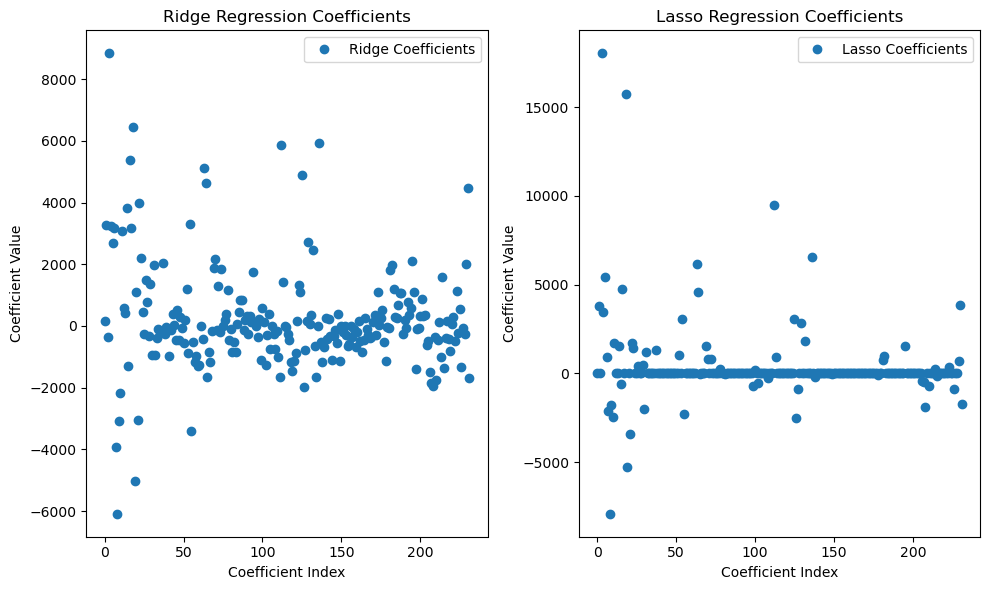

In [362]:
plt.figure(figsize=(10, 6))
# Plot Ridge coefficients
plt.subplot(1, 2, 1)
plt.plot(ridge.coef_, 'o', label='Ridge Coefficients')
plt.title('Ridge Regression Coefficients')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()

# Plot Lasso coefficients
plt.subplot(1, 2, 2)
plt.plot(lasso.coef_, 'o', label='Lasso Coefficients')
plt.title('Lasso Regression Coefficients')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.legend()

plt.tight_layout()
plt.show()